In [68]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [69]:
API_KEY = "6b4801789dca4e33fb0b7a051d93c910"
SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/{API_KEY}/subgraphs/id/5nwMCSHaTqG3Kd2gHznbTXEnZ9QNWsssQfbHhDqQSQFp" # Mainnet
# SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/{API_KEY}/subgraphs/id/Ff7ha9ELmpmg81D6nYxy4t8aGP26dPztqD1LDJNPqjLS" # Arbitrum
# SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/{API_KEY}/subgraphs/id/AaFtUWKfFdj2x8nnE3RxTSJkHwGHvawH3VWFBykCGzLs" # Polygon
# SUBGRAPH_API_URL = f"https://gateway-arbitrum.network.thegraph.com/api/{API_KEY}/subgraphs/id/2hcXhs36pTBDVUmk5K2Zkr6N4UYGwaHuco2a6jyTsijo" # Base


sg = Subgrounds()

comp_v3 = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())


/var/folders/q3/3f7l37mx6xxgf9mq9l_t26f00000gn/T/ipykernel_47185/2997802251.py:8: ResourceWarning: unclosed <ssl.SSLSocket fd=75, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=0, laddr=('2600:1700:7be1:630:5131:c637:7de9:2b33', 54568, 0, 0), raddr=('2606:4700:4400::ac40:93e1', 443, 0, 0)>
  sg = Subgrounds()


2023-12-22


In [71]:
# Protocol Current

protocols = comp_v3.Query.protocols()

overview_df = sg.query_df([protocols])
print("Overview")
display(overview_df.T)

markets_df = sg.query_df([protocols.markets])
print("Market Proxy Addresses")
display(markets_df)

accounting_df = sg.query_df([protocols.accounting])
print("Accounting")
display(accounting_df.T)

usage_df = sg.query_df([protocols.cumulativeUsage])
print("Usage")
display(usage_df.T)


Overview


0
protocols_id                          0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_configuratorProxy           0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_configuratorImplementation  0xcfc1fa6b7ca982176529899d99af6473ad80df4f
protocols_accounting_id               0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_cumulativeUsage_id            0x50524f544f434f4c5f43554d554c4154495645

Market Proxy Addresses


protocols_markets_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                 protocols_markets_cometProxy  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                protocols_markets_protocol_id  \
0  0x316f9708bb98af7da9c68c1c3b5e79039cd336e3   
1  0x316f9708bb98af7da9c68c1c3b5e79039cd336e3   

   protocols_markets_creationBlockNumber  \
0                               16477039   
1                               15331596   

           protocols_markets_configuration_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

              protocols_markets_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                                           protocols_markets_cumulativeUsage_id  
0  0x4d41524b45545f43554d554c4154495645a17581a9e3356d9a858b789d68b4d866e593ae94  
1  0x4d41524b45545f43554d554c4154495645c3d688b66703497daa19211eedff47f25384cdc3

Accounting


0
protocols_accounting_id                            0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_accounting_protocol_id                   0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_accounting_lastUpdatedBlock                                                18843838
protocols_accounting_totalSupplyUsd                                          498368025.423198
protocols_accounting_totalBorrowUsd                                          459326522.916191
protocols_accounting_reserveBalanceUsd                                         5189817.871025
protocols_accounting_collateralBalanceUsd                                   1011990633.770614
protocols_accounting_collateralReservesBalanceUsd                                  831.454073
protocols_accounting_totalReserveBalanceUsd                                    5190649.325099
protocols_accounting_utilization                                                     0.921661
protocols_accounting_collateralization                                               1.084997
protocols_accounting_avgSupplyApr                                                    0.053808
protocols_accounting_avgBorrowApr                                                    0.064511
protocols_accounting_avgRewardSupplyApr                                              0.012684
protocols_accounting_avgRewardBorrowApr                                              0.004207
protocols_accounting_avgNetSupplyApr                                                 0.066492
protocols_accounting_avgNetBorrowApr                                                 0.060304

Usage


0
protocols_cumulativeUsage_id                         0x50524f544f434f4c5f43554d554c4154495645
protocols_cumulativeUsage_protocol_id              0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_cumulativeUsage_uniqueUsersCount                                               8886
protocols_cumulativeUsage_interactionCount                                              52242
protocols_cumulativeUsage_supplyBaseCount                                               12119
protocols_cumulativeUsage_withdrawBaseCount                                             15616
protocols_cumulativeUsage_liquidationCount                                                190
protocols_cumulativeUsage_supplyCollateralCount                                         16937
protocols_cumulativeUsage_withdrawCollateralCount                                        7337
protocols_cumulativeUsage_transferCollateralCount                                          43

In [72]:
# Market Current

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]
    print(market_name)

    market = comp_v3.Query.market(id=market_id)

    overview_df = sg.query_df([market])
    print(f"{market_name} - Overview")
    display(overview_df.T)

    config_df = sg.query_df([market.configuration])
    print(f"{market_name} - Config")
    display(config_df.T)

    accounting_df = sg.query_df([market.accounting])
    print(f"{market_name} - Accounting")
    display(accounting_df.T)

    collateral_bal_df = sg.query_df([market.collateralBalances.collateralToken.token.address, 
                                     market.collateralBalances.collateralToken.token.symbol, 
                                     market.collateralBalances.collateralToken, 
                                     market.collateralBalances])

    print(f"{market_name} - Collateral Balances")
    display(collateral_bal_df.T)

    usage_df = sg.query_df([market.cumulativeUsage])
    print(f"{market_name} - Usage")
    display(usage_df.T)

    positions_df = sg.query_df([market.positions])
    print(f"{market_name} - Positions")
    display(positions_df)

    interaction_df = sg.query_df([market.supplyBaseInteractions, 
                                market.withdrawBaseInteractions, 
                                market.absorbDebtInteractions,
                                market.supplyCollateralInteractions,
                                market.withdrawCollateralInteractions,
                                market.transferCollateralInteractions,
                                market.absorbCollateralInteractions])
    print(f"{market_name} - Interactions")
    [display(df) for df in interaction_df]


Compound WETH
Compound WETH - Overview


0
market_id                                                     0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_cometProxy                                             0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_protocol_id                                            0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_creationBlockNumber                                                                      16477039
market_configuration_id                                       0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_id                                          0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_cumulativeUsage_id   0x4d41524b45545f43554d554c4154495645a17581a9e3356d9a858b789d68b4d866e593ae94

Compound WETH - Config


0
market_configuration_id                                                                            0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_configuration_market_id                                                                     0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_configuration_cometImplementation                                                           0x9c6ae0daf3d68ee963bf032824c295c286ce9547
market_configuration_lastConfigurationUpdateBlockNumber                                                                              18763266
market_configuration_name                                                                                                       Compound WETH
market_configuration_symbol                                                                                                           cWETHv3
market_configuration_factory                                                                       0xa7f7de6ccad4d83d81676717053883337ac2c1b4
market_configuration_governor                                                                      0x6d903f6003cca6255d85cca4d3b5e5146dc33925
market_configuration_pauseGuardian                                                                 0xbbf3f1421d886e9b2c5d716b5192ac998af2012c
market_configuration_extensionDelegate                                                             0xe2c1f54aff6b38fd9df7a69f22cb5fd3ba09f030
market_configuration_supplyKink                                                                                                           0.9
market_configuration_supplyPerSecondInterestRateSlopeLow                                                                            729325215
market_configuration_supplyPerSecondInterestRateSlopeHigh                                                                         31709791983
market_configuration_supplyPerSecondInterestRateBase                                                                                        0
market_configuration_borrowKink                                                                                                           0.9
market_configuration_borrowPerSecondInterestRateSlopeLow                                                                            951293759
market_configuration_borrowPerSecondInterestRateSlopeHigh                                                                         31709791983
market_configuration_borrowPerSecondInterestRateBase                                                                                158548959
market_configuration_storeFrontPriceFactor                                                                                1000000000000000000
market_configuration_trackingIndexScale                                                                                      1000000000000000
market_configuration_baseTrackingSupplySpeed                                                                                     810185185185
market_configuration_baseTrackingBorrowSpeed                                                                                                0
market_configuration_baseMinForRewards                                                                                 1000000000000000000000
market_configuration_baseBorrowMin                                                                                         100000000000000000
market_configuration_targetReserves                                                                                    5000000000000000000000
market_configuration_baseToken_id                          0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2

Compound WETH - Accounting


0
market_accounting_id                                0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_market_id                         0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_lastAccountingUpdatedBlockNumber                                    18842348
market_accounting_baseSupplyIndex                                             1014980607620004
market_accounting_baseBorrowIndex                                             1034100638558159
market_accounting_trackingSupplyIndex                                          436937249592429
market_accounting_trackingBorrowIndex                                                        0
market_accounting_lastAccrualTime                                                   1703259779
market_accounting_totalBasePrincipalSupply                             43596398637784224926284
market_accounting_totalBasePrincipalBorrow                             34622062068654871771788
market_accounting_baseReserveBalance                                     680822503159766937934
market_accounting_totalBaseSupply                                      44249499179422147291725
market_accounting_totalBaseBorrow                                      35802696493396218243192
market_accounting_totalBaseSupplyUsd                                          102725893.787316
market_accounting_totalBaseBorrowUsd                                           83116511.270945
market_accounting_baseReserveBalanceUsd                                         1580539.925752
market_accounting_collateralBalanceUsd                                         99708056.087325
market_accounting_collateralReservesBalanceUsd                                             0.0
market_accounting_totalReserveBalanceUsd                                        1580539.925752
market_accounting_utilization                                                          0.80911
market_accounting_collateralization                                                   1.235926
market_accounting_supplyApr                                                            0.01861
market_accounting_borrowApr                                                           0.029273
market_accounting_rewardSupplyApr                                                     0.013121
market_accounting_rewardBorrowApr                                                          0.0
market_accounting_netSupplyApr                                                         0.03173
market_accounting_netBorrowApr                                                        0.029273

Compound WETH - Collateral Balances


0  \
market_collateralBalances_collateralToken_token_address                                                                    0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
market_collateralBalances_collateralToken_token_symbol                                                                                                         wstETH   
market_collateralBalances_collateralToken_id                                 0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
market_collateralBalances_collateralToken_creationBlockNumber                                                                                                16477039   
market_collateralBalances_collateralToken_market_id                                                                        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
market_collateralBalances_collateralToken_token_id                                                                         0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
market_collateralBalances_collateralToken_lastConfigUpdateBlockNumber                                                                                        18763266   
market_collateralBalances_collateralToken_priceFeed                                                                        0x4f67e4d9bd67efa28236013288737d39aef48e79   
market_collateralBalances_collateralToken_borrowCollateralFactor                                                                                                  0.9   
market_collateralBalances_collateralToken_liquidateCollateralFactor                                                                                              0.93   
market_collateralBalances_collateralToken_liquidationFactor                                                                                                     0.975   
market_collateralBalances_collateralToken_supplyCap                                                                                           64500000000000000000000   
market_collateralBalances_collateralToken_lastPriceUsd                                                                                                    2670.137646   
market_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                               18842348   
market_collateralBalances_id                                           0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c42414c   
market_collateralBalances_creationBlockNumber                                                                                                                16477039   
market_collateralBalances_market_id                                                                                        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
market_collateralBalances_lastUpdateBlockNumber                                                                                                              18842348   
market_collateralBalances_balance                                                                                                             37731223626462609356230   
market_collateralBalances_reserves                                                                                                                                  0   
market_collateralBalances_balanceUsd                                                                                                                  99565154.493999   
market_collateralBalances_reservesUsd                                                                                                                             0.0   

                                                                                                                                                                    1  \
market_collateralBalances_collateralToken_token_address                                                    

Compound WETH - Usage


0
market_cumulativeUsage_id                       0x4d41524b45545f43554d554c4154495645a17581a9e3356d9a858b789d68b4d866e593ae94
market_cumulativeUsage_protocol_id                                                0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_cumulativeUsage_uniqueUsersCount                                                                                 1569
market_cumulativeUsage_interactionCount                                                                                 6584
market_cumulativeUsage_supplyBaseCount                                                                                  2342
market_cumulativeUsage_withdrawBaseCount                                                                                2030
market_cumulativeUsage_liquidationCount                                                                                    0
market_cumulativeUsage_supplyCollateralCount                                                                            1368
market_cumulativeUsage_withdrawCollateralCount                                                                           839
market_cumulativeUsage_transferCollateralCount                                                                             5

Compound WETH - Positions


market_positions_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94000007656f345a789bb422f0307d826660258333   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94001bcbba74d76875c3a34d6f7d9772bca38b7f8e   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae940041df1e2c32ced11bf89ed72ca090b51970b736   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94007ec2e6218702e8ed4e17ce8479c8f178efb867   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba3ca0b6df1486c912893d9f288311a60ed753   
..                                                                                 ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94121dd42384db6ad04851f7ac1e81bcd8bbb1876e   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94122d4b87ccf6a4ff45b65b510ba6747c882ad960   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94124559ebde4fb3e6a93cea59300f6611b8a00516   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9412ab5196345e421306d317f168b368435b338282   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9412b03ee4321f0ffe19a6448fce744ec008527045   

    market_positions_creationBlockNumber  \
0                               18067486   
1                               18833156   
2                               17865134   
3                               18194568   
4                               17837590   
..                                   ...   
95                              17110405   
96                              17538913   
97                              17122693   
98                              16974406   
99                              17418670   

                    market_positions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                   market_positions_account_id  \
0   0x000007656f345a789bb422f0307d826660258333   
1   0x001bcbba74d76875c3a34d6f7d9772bca38b7f8e   
2   0x0041df1e2c32ced11bf89ed72ca090b51970b736   
3   0x007ec2e6218702e8ed4e17ce8479c8f178efb867   
4   0x00ba3ca0b6df1486c912893d9f288311a60ed753   
..                                         ...   
95  0x121dd42384db6ad04851f7ac1e81bcd8bbb1876e   
96  0x122d4b87ccf6a4ff45b65b510ba6747c882ad960   
97  0x124559ebde4fb3e6a93cea59300f6611b8a00516   
98  0x12ab5196345e421306d317f168b368435b338282   
99  0x12b03ee4321f0ffe19a6448fce744ec008527045   

                                                        market_positions_accounting_id  
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94000007656f345a789bb422f0307d826660258333  
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94001bcbba74d76875c3a34d6f7d9772bca38b7f8e  
2   0xa17581a9e3356d9a858b789d68b4d866e593ae940041df1e2c32ced11bf89ed72ca090b51970b736  
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94007ec2e6218702e8ed4e17ce8479c8f178efb867  
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba3ca0b6df1486c912893d9f288311a60ed753  
..                                                                                 ...  
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94121dd42384db6ad04851f7ac1e81bcd8bbb1876e  
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94122d4b87ccf6a4ff45b65b510ba6747c882ad960  
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94124559ebde4fb3e6a93cea59300f6611b8a00516  
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9412ab5196345e421306d317f168b368435b338282  
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9412b03ee4321f0ffe19a6448fce744ec008527045  

[100 rows x 5 columns]

Compound WETH - Interactions


market_supplyBaseInteractions_id  \
0   0x001feedec2af4fdc9b8a9a3fba8dd80a7298e9ec782ebe6826eb113cb338b821ea00   
1   0x0022400f2df9e602c8e831c723a31c1e01b681fe98230dc8d4b4a8a7495f37421c01   
2   0x0034d64278cbe44c7df4b441ae389147ef40b3f5f4fb8b22a3511f144715a9228400   
3   0x00785e14be72f0f193292e6a98b213b5ede9d05afb52c962a89172a1ed8688efcc00   
4   0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f2101   
..                                                                     ...   
95  0x09ecc1187403c467b013d0d4ba1b1952a6f8b37336a8977ff1cbad1add5aba06c100   
96  0x09fb8dabf88c5560a2fb032792ae6ea6e548d05643e01884867fadd6982101bee100   
97  0x0a1295736fcca1065f416a786d909bc82ead599c35356a493bbc6648973c3d55bb00   
98  0x0a3c1e1e984fb9898439cbd2c025840bbb21f469ccd320eab06f93f3f627392bd400   
99  0x0a712b1533348bc9ad6dd97ee57761270affdc641ce0a9eeaf76ba94cd4ab877bb01   

                          market_supplyBaseInteractions_transaction_id  \
0   0x001feedec2af4fdc9b8a9a3fba8dd80a7298e9ec782ebe6826eb113cb338b821   
1   0x0022400f2df9e602c8e831c723a31c1e01b681fe98230dc8d4b4a8a7495f3742   
2   0x0034d64278cbe44c7df4b441ae389147ef40b3f5f4fb8b22a3511f144715a922   
3   0x00785e14be72f0f193292e6a98b213b5ede9d05afb52c962a89172a1ed8688ef   
4   0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f   
..                                                                 ...   
95  0x09ecc1187403c467b013d0d4ba1b1952a6f8b37336a8977ff1cbad1add5aba06   
96  0x09fb8dabf88c5560a2fb032792ae6ea6e548d05643e01884867fadd6982101be   
97  0x0a1295736fcca1065f416a786d909bc82ead599c35356a493bbc6648973c3d55   
98  0x0a3c1e1e984fb9898439cbd2c025840bbb21f469ccd320eab06f93f3f627392b   
99  0x0a712b1533348bc9ad6dd97ee57761270affdc641ce0a9eeaf76ba94cd4ab877   

       market_supplyBaseInteractions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                             market_supplyBaseInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a2b66d6531ff35a949eafd9813fed67a009b846b   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94863800f11dc57184de2106693bc5e11868ed666c   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae943baa2b3f8593234470201d1f41c09e950a7c40dd   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae948a120b3de6bf7b46e29ef3b5db0b0a9d384acbd7   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae943ff21f1930b39a53f79ddf79d2c809477d33bf78   
..                                                                                 ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94bee989b252c22b57112fb0fb759d289b45fa10c6   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94ce7d58beb5e5956ede8ad6013c2f30ea2fa8bca8   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94d6f1909bccf676bdfe221809a281e1445a22087e   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94870ce4cbe75814672c0f1e62d3d19474dbca2edc   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94b8e1f0f1e0aab629ec07ae9e4fa680b58732c643   

        market_supplyBaseInteractions_supplier  \
0   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4   0x25537c8aedce52928c87e610f1e731cf078ded36   
..                                         ...   
95  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
97  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
98  0xa397a8c2086c554b531c02e29f32

market_withdrawBaseInteractions_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e6550322d34117d23d106af00   
1   0x0013c5734ceb8b4678628474fb730e542fad9d970e6804aed68672012d63a37aeb00   
2   0x00172bac3ef63f40feb12e7340fec1f93b0143db82393da94205fc905333df493401   
3   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c186b8ae6c24a874e129c2e000   
4   0x0032c1659077f74c98884564cfe6bd3383fda235ef3c73d23224d9433d48ea214d01   
..                                                                     ...   
95  0x0c1c70ad36844d1c00e44c72b8e31a2d9f35f7258e0b13bb601d01e9b27ae3c73001   
96  0x0c52c300b42428461d8cb92e4e9332bf2f57e9ec33c8c93dfb34c6e6e5f631741a01   
97  0x0c570f4affba9e77087fa3f9ffb5c4bb5b9ffe25a8718e406918ca8defcd4df00201   
98    0x0c58eae3c48b2f9749028a97dd3efbbc41838c3ac4946c44dd3c8a186c95376939   
99  0x0c730a11e7f000425d27d9d29f22edaa62729081a700e3a6e6cd2a3cbf353d858801   

                        market_withdrawBaseInteractions_transaction_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e6550322d34117d23d106   
1   0x0013c5734ceb8b4678628474fb730e542fad9d970e6804aed68672012d63a37a   
2   0x00172bac3ef63f40feb12e7340fec1f93b0143db82393da94205fc905333df49   
3   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c186b8ae6c24a874e129c2   
4   0x0032c1659077f74c98884564cfe6bd3383fda235ef3c73d23224d9433d48ea21   
..                                                                 ...   
95  0x0c1c70ad36844d1c00e44c72b8e31a2d9f35f7258e0b13bb601d01e9b27ae3c7   
96  0x0c52c300b42428461d8cb92e4e9332bf2f57e9ec33c8c93dfb34c6e6e5f63174   
97  0x0c570f4affba9e77087fa3f9ffb5c4bb5b9ffe25a8718e406918ca8defcd4df0   
98  0x0c58eae3c48b2f9749028a97dd3efbbc41838c3ac4946c44dd3c8a186c953769   
99  0x0c730a11e7f000425d27d9d29f22edaa62729081a700e3a6e6cd2a3cbf353d85   

     market_withdrawBaseInteractions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                           market_withdrawBaseInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae949c483fa4d84a218940bfa02652fcaf01ee8f44f2   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae9463e52238a42ac4baa4d55e800c6869ad7eaa0a8f   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9456aa33f20e25baa99e916c91abb4f59ae72491e0   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94e7ce11f4b1cfd8e607b0ca64823ad645f260badc   
..                                                                                 ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae9462d3234a4160ccdf337ce6df3f27bad01643c5a2   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae942bf15737b67a55aec46087f9f42e10bdfd12117c   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94314c0695273ba259bb60074f2c92c67ac7ae6d40   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae949dff3ed2220892dab0630458863e27710ed55361   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94f8057dcaaf5282deef129423b1d6e1073c26082f   

   market_withdrawBaseInteractions_destination  \
0   0xa3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
..                                         ...   
95  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
97  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
98  0xa397a8c2086c554b531c02e29f

Empty DataFrame
Columns: []
Index: []

market_supplyCollateralInteractions_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e6550322d34117d23d106ad00   
1   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c186b8ae6c24a874e129c2de00   
2   0x004543c5cc21abbd1436322d1b29415d681145f1b5372b72c92bc28e6593a8e9fe00   
3   0x0050db11f1ce1a8cbb968bc12a0a419ced4696cd5b9e98e54957c04cf6b136b2f600   
4   0x006167bc7b4491ee12a188a40e2c11d6bee0cdac4313c8f6428d0fdbc09805b2d000   
..                                                                     ...   
95  0x0e0830b0637d22ca1368ce0e1f1d87309d8ee192dd45c7a22df617500ead0f8ce100   
96    0x0e68c270891f475568d31181066997ea41fd0fc771ba84f4e0a68e8cf3a8c21b1a   
97  0x0e756f72998098be2ba4896e04ca9b93cdc16c8fb11151371819c7c65e14de899f00   
98  0x0e9a1a3175ba5d3ebf758f57b5b77a2cf38344e621b0a622f0eed76105d2f9028000   
99  0x0ea6cf744a678994ebdc69117dc47853719b57724892519f59a87e649bcdb33a5001   

                    market_supplyCollateralInteractions_transaction_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e6550322d34117d23d106   
1   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c186b8ae6c24a874e129c2   
2   0x004543c5cc21abbd1436322d1b29415d681145f1b5372b72c92bc28e6593a8e9   
3   0x0050db11f1ce1a8cbb968bc12a0a419ced4696cd5b9e98e54957c04cf6b136b2   
4   0x006167bc7b4491ee12a188a40e2c11d6bee0cdac4313c8f6428d0fdbc09805b2   
..                                                                 ...   
95  0x0e0830b0637d22ca1368ce0e1f1d87309d8ee192dd45c7a22df617500ead0f8c   
96  0x0e68c270891f475568d31181066997ea41fd0fc771ba84f4e0a68e8cf3a8c21b   
97  0x0e756f72998098be2ba4896e04ca9b93cdc16c8fb11151371819c7c65e14de89   
98  0x0e9a1a3175ba5d3ebf758f57b5b77a2cf38344e621b0a622f0eed76105d2f902   
99  0x0ea6cf744a678994ebdc69117dc47853719b57724892519f59a87e649bcdb33a   

   market_supplyCollateralInteractions_market_id  \
0     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                           ...   
95    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99    0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                       market_supplyCollateralInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9456aa33f20e25baa99e916c91abb4f59ae72491e0   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94c72d57b880a988d120141f09328f7daef527a8b0   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94d4ca789f73d87aaf87d31b558ec7f1e159849ed6   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae946994e2026fd823933a795ca74779edb0739b7b66   
..                                                                                 ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae944c09dd7c598b12c781c4b5d74d245a1784a2e148   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae9474a0b3b58d4481c6b82b43cb4997f5a4b05ff152   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae946994e2026fd823933a795ca74779edb0739b7b66   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94754f8c5df6fb5bfc2b3001fcbe4ac5797f2fe534   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94ec9e4a0ed746b24b0c7ccf22f270be54f725fb4b   

   market_supplyCollateralInteractions_supplier  \
0    0xa3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1    0x56aa33f20e25baa99e916c91abb4f59ae72491e0   
2    0xc72d57b880a988d120141f09328f7daef527a8b0   
3    0xd4ca789f73d87aaf87d31b558ec7f1e159849ed6   
4    0x6994e2026fd823933a795ca74779edb0739b7b66   
..                                          ...   
95   0x4c09dd7c598b12c781c4b5d74d245a1784a2e148   
96   0x74a0b3b58d4481c6b82b43cb4997f5a4b05ff152   
97   0x6994e2026fd823933a795ca74779edb0739b7b

market_withdrawCollateralInteractions_id  \
0   0x006664298a091e9b152b480ebe2194b9cbdda6daebe644d2a317b8d4eee750dfe200   
1     0x0101de48fe83416313d9d7b6e819fb1df6cac21516029481ef3f36353e76885e2f   
2   0x013357567659bf53cc7cec52fb9cea068e0e9563df5d87f3ce0e3049eccc411a1401   
3   0x013407b190024075bc892b51312cd0fd8cddf528b99d53b0c144e7401878a2d4c400   
4   0x01ae75f790db2652425a4a7d97add94cc4ae3917fa206247224bfe9f916c1dc6ae00   
..                                                                     ...   
95  0x2021f9cd49266e6cb1d35a535fa52ef52aa28d1aae1d451b63d7aa323bec3ec9c700   
96  0x209692f93423dd4b12265835a8cb01727ca0ff9029465f8d0cd4c10c894fd9da4f01   
97    0x20a5a94bd7eb8c5c91e37e80922ca610177c06d8b557ce96ff15f8b30e1194115b   
98  0x20d1d436190d2c1f531753c2aac535825127642bfdfeff420e96031723a2e97f1a01   
99  0x20e8a3efcce834ef649913f0fc0c6458089a44f749c1313e76872556db57656cdb00   

                  market_withdrawCollateralInteractions_transaction_id  \
0   0x006664298a091e9b152b480ebe2194b9cbdda6daebe644d2a317b8d4eee750df   
1   0x0101de48fe83416313d9d7b6e819fb1df6cac21516029481ef3f36353e76885e   
2   0x013357567659bf53cc7cec52fb9cea068e0e9563df5d87f3ce0e3049eccc411a   
3   0x013407b190024075bc892b51312cd0fd8cddf528b99d53b0c144e7401878a2d4   
4   0x01ae75f790db2652425a4a7d97add94cc4ae3917fa206247224bfe9f916c1dc6   
..                                                                 ...   
95  0x2021f9cd49266e6cb1d35a535fa52ef52aa28d1aae1d451b63d7aa323bec3ec9   
96  0x209692f93423dd4b12265835a8cb01727ca0ff9029465f8d0cd4c10c894fd9da   
97  0x20a5a94bd7eb8c5c91e37e80922ca610177c06d8b557ce96ff15f8b30e119411   
98  0x20d1d436190d2c1f531753c2aac535825127642bfdfeff420e96031723a2e97f   
99  0x20e8a3efcce834ef649913f0fc0c6458089a44f749c1313e76872556db57656c   

   market_withdrawCollateralInteractions_market_id  \
0       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                             ...   
95      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                     market_withdrawCollateralInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94b1cc0f5e5afd1164dc2c3c61a3f84563e6c46a21   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94bdebfd375bcb1e0f6dfd4646cd1598f4d5888a48   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae9488b7a44cecd526cd2d424b0a4cc2bbb26341dd8f   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94870ce4cbe75814672c0f1e62d3d19474dbca2edc   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9453d3d85c64d032b421f32df80c7cc7467d6ed6cc   
..                                                                                 ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94a83407ffb9b74c7db5ce1ba5f03801729c84bba9   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae9456aa33f20e25baa99e916c91abb4f59ae72491e0   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae943964a2f0dc80cb617ea22826abfdac19e1bee09b   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9456aa33f20e25baa99e916c91abb4f59ae72491e0   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94ba144769fca8caaabcded55d8baec0e719a5f009   

   market_withdrawCollateralInteractions_destination  \
0         0xb1cc0f5e5afd1164dc2c3c61a3f84563e6c46a21   
1         0xbdebfd375bcb1e0f6dfd4646cd1598f4d5888a48   
2         0x88b7a44cecd526cd2d424b0a4cc2bbb26341dd8f   
3         0x870ce4cbe75814672c0f1e62d3d19474dbca2edc   
4         0x540a83e36e5e6aa916a6c591934d800e17115048   
..                                               ...   
95        0xa83407ffb9b74c7db5ce1ba5f03801729c84bba9   
96        0x56aa33f20e25baa99e

market_transferCollateralInteractions_id  \
0  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f2201   
1  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f2301   
2  0x2199e9988c5ba5c15d8296e297f4fe3183b67838082b9b6e1407bb729c1674e7c200   
3    0x31940a2ebe989ece631f7055b19c5381801e40a56f5139d546c4a0a45a2e1a8d79   
4  0xa09e8f2cb4204ff198b67f53be8c78c1ae07e84a32fad36443640bc9332d1a790701   

                 market_transferCollateralInteractions_transaction_id  \
0  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f   
1  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f   
2  0x2199e9988c5ba5c15d8296e297f4fe3183b67838082b9b6e1407bb729c1674e7   
3  0x31940a2ebe989ece631f7055b19c5381801e40a56f5139d546c4a0a45a2e1a8d   
4  0xa09e8f2cb4204ff198b67f53be8c78c1ae07e84a32fad36443640bc9332d1a79   

  market_transferCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                market_transferCollateralInteractions_fromPosition_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae943ff21f1930b39a53f79ddf79d2c809477d33bf78   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae943ff21f1930b39a53f79ddf79d2c809477d33bf78   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae949965df7129b6df20243a240e42ed95205bdfa9c2   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94910e413dbf3f6276fe8213ff656726bdc142e08e   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae944c09dd7c598b12c781c4b5d74d245a1784a2e148   

                                  market_transferCollateralInteractions_toPosition_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9425537c8aedce52928c87e610f1e731cf078ded36   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9425537c8aedce52928c87e610f1e731cf078ded36   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae942e20c1ccc6e59da0e630cc3c9c29e12e7e5a883b   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9425537c8aedce52928c87e610f1e731cf078ded36   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae944f285bbcfed9140ea4c15feb3348b227f6f35bea   

                                             market_transferCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94be9895146f7af43049ca1c1ae358b0541ea49704434f4c   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   

  market_transferCollateralInteractions_amount  \
0                             9954775470249616   
1                           107231347482693256   
2                         37845129691193158310   
3                              899380998268022   
4                       2038308823175766313997   

   market_transferCollateralInteractions_amountUsd  
0                                     2.146623e+01  
1                                     2.520470e+02  
2                                     7.841906e+04  
3                                     1.839516e+00  
4                                     3.792434e+06

Empty DataFrame
Columns: []
Index: []

Compound USDC
Compound USDC - Overview


0
market_id                                                     0xc3d688b66703497daa19211eedff47f25384cdc3
market_cometProxy                                             0xc3d688b66703497daa19211eedff47f25384cdc3
market_protocol_id                                            0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_creationBlockNumber                                                                      15331596
market_configuration_id                                       0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_id                                          0xc3d688b66703497daa19211eedff47f25384cdc3
market_cumulativeUsage_id   0x4d41524b45545f43554d554c4154495645c3d688b66703497daa19211eedff47f25384cdc3

Compound USDC - Config


0
market_configuration_id                                                                            0xc3d688b66703497daa19211eedff47f25384cdc3
market_configuration_market_id                                                                     0xc3d688b66703497daa19211eedff47f25384cdc3
market_configuration_cometImplementation                                                           0x8940a7e30682fbdbd0fa3c3d8971b3dd0b59543a
market_configuration_lastConfigurationUpdateBlockNumber                                                                              18812600
market_configuration_name                                                                                                       Compound USDC
market_configuration_symbol                                                                                                           cUSDCv3
market_configuration_factory                                                                       0xa7f7de6ccad4d83d81676717053883337ac2c1b4
market_configuration_governor                                                                      0x6d903f6003cca6255d85cca4d3b5e5146dc33925
market_configuration_pauseGuardian                                                                 0xbbf3f1421d886e9b2c5d716b5192ac998af2012c
market_configuration_extensionDelegate                                                             0x285617313887d43256f852cae0ee4de4b68d45b0
market_configuration_supplyKink                                                                                                          0.93
market_configuration_supplyPerSecondInterestRateSlopeLow                                                                           1078132927
market_configuration_supplyPerSecondInterestRateSlopeHigh                                                                         47564687975
market_configuration_supplyPerSecondInterestRateBase                                                                                        0
market_configuration_borrowKink                                                                                                          0.93
market_configuration_borrowPerSecondInterestRateSlopeLow                                                                           1055936073
market_configuration_borrowPerSecondInterestRateSlopeHigh                                                                         47564687975
market_configuration_borrowPerSecondInterestRateBase                                                                                317097919
market_configuration_storeFrontPriceFactor                                                                                 600000000000000000
market_configuration_trackingIndexScale                                                                                      1000000000000000
market_configuration_baseTrackingSupplySpeed                                                                                    2979166666666
market_configuration_baseTrackingBorrowSpeed                                                                                    1157407407407
market_configuration_baseMinForRewards                                                                                          1000000000000
market_configuration_baseBorrowMin                                                                                                  100000000
market_configuration_targetReserves                                                                                             5000000000000
market_configuration_baseToken_id                          0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48

Compound USDC - Accounting


0
market_accounting_id                                0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_market_id                         0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_lastAccountingUpdatedBlockNumber                                    18843838
market_accounting_baseSupplyIndex                                             1041211913080432
market_accounting_baseBorrowIndex                                             1058703508488673
market_accounting_trackingSupplyIndex                                              89099164830
market_accounting_trackingBorrowIndex                                            1076904900606
market_accounting_lastAccrualTime                                                   1703277803
market_accounting_totalBasePrincipalSupply                                     379979136691168
market_accounting_totalBasePrincipalBorrow                                     355346778150889
market_accounting_baseReserveBalance                                             3609268121313
market_accounting_totalBaseSupply                                              395638813321379
market_accounting_totalBaseBorrow                                              376206891107907
market_accounting_totalBaseSupplyUsd                                          395642378.027087
market_accounting_totalBaseBorrowUsd                                          376210280.731996
market_accounting_baseReserveBalanceUsd                                         3609300.640819
market_accounting_collateralBalanceUsd                                        912287119.082697
market_accounting_collateralReservesBalanceUsd                                      831.454073
market_accounting_totalReserveBalanceUsd                                        3610132.094892
market_accounting_utilization                                                         0.950885
market_accounting_collateralization                                                   1.051652
market_accounting_supplyApr                                                           0.062947
market_accounting_borrowApr                                                           0.072296
market_accounting_rewardSupplyApr                                                     0.012571
market_accounting_rewardBorrowApr                                                     0.005136
market_accounting_netSupplyApr                                                        0.075518
market_accounting_netBorrowApr                                                         0.06716

Compound USDC - Collateral Balances


0  \
market_collateralBalances_collateralToken_token_address                                                                    0x1f9840a85d5af5bf1d1762f925bdaddc4201f984   
market_collateralBalances_collateralToken_token_symbol                                                                                                            UNI   
market_collateralBalances_collateralToken_id                                 0xc3d688b66703497daa19211eedff47f25384cdc31f9840a85d5af5bf1d1762f925bdaddc4201f984434f4c   
market_collateralBalances_collateralToken_creationBlockNumber                                                                                                15331596   
market_collateralBalances_collateralToken_market_id                                                                        0xc3d688b66703497daa19211eedff47f25384cdc3   
market_collateralBalances_collateralToken_token_id                                                                         0x1f9840a85d5af5bf1d1762f925bdaddc4201f984   
market_collateralBalances_collateralToken_lastConfigUpdateBlockNumber                                                                                        18812600   
market_collateralBalances_collateralToken_priceFeed                                                                        0x553303d460ee0afb37edff9be42922d8ff63220e   
market_collateralBalances_collateralToken_borrowCollateralFactor                                                                                                 0.75   
market_collateralBalances_collateralToken_liquidateCollateralFactor                                                                                              0.81   
market_collateralBalances_collateralToken_liquidationFactor                                                                                                      0.93   
market_collateralBalances_collateralToken_supplyCap                                                                                         6000000000000000000000000   
market_collateralBalances_collateralToken_lastPriceUsd                                                                                                       6.424843   
market_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                               18843838   
market_collateralBalances_id                                           0xc3d688b66703497daa19211eedff47f25384cdc31f9840a85d5af5bf1d1762f925bdaddc4201f984434f4c42414c   
market_collateralBalances_creationBlockNumber                                                                                                                15331596   
market_collateralBalances_market_id                                                                                        0xc3d688b66703497daa19211eedff47f25384cdc3   
market_collateralBalances_lastUpdateBlockNumber                                                                                                              18843838   
market_collateralBalances_balance                                                                                                           5771004174274210304783581   
market_collateralBalances_reserves                                                                                                               38318000252764192509   
market_collateralBalances_balanceUsd                                                                                                                  37077794.040755   
market_collateralBalances_reservesUsd                                                                                                                      246.187124   

                                                                                                                                                                    1  \
market_collateralBalances_collateralToken_token_address                                                    

Compound USDC - Usage


0
market_cumulativeUsage_id                       0x4d41524b45545f43554d554c4154495645c3d688b66703497daa19211eedff47f25384cdc3
market_cumulativeUsage_protocol_id                                                0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_cumulativeUsage_uniqueUsersCount                                                                                 7712
market_cumulativeUsage_interactionCount                                                                                45658
market_cumulativeUsage_supplyBaseCount                                                                                  9777
market_cumulativeUsage_withdrawBaseCount                                                                               13586
market_cumulativeUsage_liquidationCount                                                                                  190
market_cumulativeUsage_supplyCollateralCount                                                                           15569
market_cumulativeUsage_withdrawCollateralCount                                                                          6498
market_cumulativeUsage_transferCollateralCount                                                                            38

Compound USDC - Positions


market_positions_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3000000000029ebdbac531e86895078017c4ace26   
1   0xc3d688b66703497daa19211eedff47f25384cdc3000007656f345a789bb422f0307d826660258333   
2   0xc3d688b66703497daa19211eedff47f25384cdc3000566b53e028d21e104e4320de61c2314ef4064   
3   0xc3d688b66703497daa19211eedff47f25384cdc3000872be5ec7dc8197ef6618ef507d9a449cac1a   
4   0xc3d688b66703497daa19211eedff47f25384cdc3000dbf2733da51135c1b21c8ef71a3d474383f0d   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3037164c19acd3ea9bd8742d16da7264f496f12ed   
96  0xc3d688b66703497daa19211eedff47f25384cdc303869df967259b1f3eccd808d5f076e0945d66b7   
97  0xc3d688b66703497daa19211eedff47f25384cdc30393fe624f461fad6afc0c9c9a4b257b19dc0bf2   
98  0xc3d688b66703497daa19211eedff47f25384cdc3039e4a6d9633fa330918b1e6dc8183085c9e9b1e   
99  0xc3d688b66703497daa19211eedff47f25384cdc303c218e5dc84deaba28b1f01592deb486eef57f0   

    market_positions_creationBlockNumber  \
0                               17681758   
1                               18078390   
2                               16102509   
3                               17329329   
4                               16782962   
..                                   ...   
95                              16481785   
96                              17663380   
97                              16108534   
98                              17611062   
99                              18421290   

                    market_positions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

                   market_positions_account_id  \
0   0x000000000029ebdbac531e86895078017c4ace26   
1   0x000007656f345a789bb422f0307d826660258333   
2   0x000566b53e028d21e104e4320de61c2314ef4064   
3   0x000872be5ec7dc8197ef6618ef507d9a449cac1a   
4   0x000dbf2733da51135c1b21c8ef71a3d474383f0d   
..                                         ...   
95  0x037164c19acd3ea9bd8742d16da7264f496f12ed   
96  0x03869df967259b1f3eccd808d5f076e0945d66b7   
97  0x0393fe624f461fad6afc0c9c9a4b257b19dc0bf2   
98  0x039e4a6d9633fa330918b1e6dc8183085c9e9b1e   
99  0x03c218e5dc84deaba28b1f01592deb486eef57f0   

                                                        market_positions_accounting_id  
0   0xc3d688b66703497daa19211eedff47f25384cdc3000000000029ebdbac531e86895078017c4ace26  
1   0xc3d688b66703497daa19211eedff47f25384cdc3000007656f345a789bb422f0307d826660258333  
2   0xc3d688b66703497daa19211eedff47f25384cdc3000566b53e028d21e104e4320de61c2314ef4064  
3   0xc3d688b66703497daa19211eedff47f25384cdc3000872be5ec7dc8197ef6618ef507d9a449cac1a  
4   0xc3d688b66703497daa19211eedff47f25384cdc3000dbf2733da51135c1b21c8ef71a3d474383f0d  
..                                                                                 ...  
95  0xc3d688b66703497daa19211eedff47f25384cdc3037164c19acd3ea9bd8742d16da7264f496f12ed  
96  0xc3d688b66703497daa19211eedff47f25384cdc303869df967259b1f3eccd808d5f076e0945d66b7  
97  0xc3d688b66703497daa19211eedff47f25384cdc30393fe624f461fad6afc0c9c9a4b257b19dc0bf2  
98  0xc3d688b66703497daa19211eedff47f25384cdc3039e4a6d9633fa330918b1e6dc8183085c9e9b1e  
99  0xc3d688b66703497daa19211eedff47f25384cdc303c218e5dc84deaba28b1f01592deb486eef57f0  

[100 rows x 5 columns]

Compound USDC - Interactions


market_supplyBaseInteractions_id  \
0   0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d9100   
1     0x00073f13e1fb72e9d527a468e975dfed57b7e2a862ccba5e4461e67bb2be4a7a3f   
2   0x0008664db43bc9dcdaccc0770191f5f6a7f483765740e1c392e064a82fa65465b900   
3   0x002b93aff61b91b83479fdff5e5f51fc80dce3716305b6f7d2e3a5507ebabc48e200   
4   0x003cc6a1b1b932dc890157a1d197fb737deba2b9a884e2f7fbb4e942f18d1a247101   
..                                                                     ...   
95  0x02c0ab276516af00973707a59bcd3a270852c86ed7cda735350730d403daaecbc200   
96  0x02c3077d0307010223592875086f8f271067554917d89caaa6e819bc3fa54259b700   
97    0x02c340023339bcff821822144f4b55e4db49c12931e2f48e5c375b3d9b9d36be3e   
98    0x02da4d539092ad0dc7f406ad8067b23f9d90b3cb09173151a38650c3c98f834f20   
99    0x02e331d8b8551445a6cd916b5871bd47827a05605d6be8e6e509b71913831ac128   

                          market_supplyBaseInteractions_transaction_id  \
0   0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d   
1   0x00073f13e1fb72e9d527a468e975dfed57b7e2a862ccba5e4461e67bb2be4a7a   
2   0x0008664db43bc9dcdaccc0770191f5f6a7f483765740e1c392e064a82fa65465   
3   0x002b93aff61b91b83479fdff5e5f51fc80dce3716305b6f7d2e3a5507ebabc48   
4   0x003cc6a1b1b932dc890157a1d197fb737deba2b9a884e2f7fbb4e942f18d1a24   
..                                                                 ...   
95  0x02c0ab276516af00973707a59bcd3a270852c86ed7cda735350730d403daaecb   
96  0x02c3077d0307010223592875086f8f271067554917d89caaa6e819bc3fa54259   
97  0x02c340023339bcff821822144f4b55e4db49c12931e2f48e5c375b3d9b9d36be   
98  0x02da4d539092ad0dc7f406ad8067b23f9d90b3cb09173151a38650c3c98f834f   
99  0x02e331d8b8551445a6cd916b5871bd47827a05605d6be8e6e509b71913831ac1   

       market_supplyBaseInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

                                             market_supplyBaseInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc384e2c0837d761ef6078b9dbf3839e108155d84f2   
1   0xc3d688b66703497daa19211eedff47f25384cdc34303c46c71f6e48eaa96ab3f194b79fac082e46a   
2   0xc3d688b66703497daa19211eedff47f25384cdc333a3433830f11ce43eb5a1c2a3281d6af9a3e772   
3   0xc3d688b66703497daa19211eedff47f25384cdc3a8120f2ca4b3495d460df02122e90833e928da86   
4   0xc3d688b66703497daa19211eedff47f25384cdc3cd097d446ad68520c93cc347249fb3d0e481f644   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3a14d440b539f2e6e5555fc6e95f6972165fbff99   
96  0xc3d688b66703497daa19211eedff47f25384cdc3fd880d23fa7755fcac906329d6f2a80f6243a3b0   
97  0xc3d688b66703497daa19211eedff47f25384cdc396bedb1060745178d07d1072294471b53afa21c8   
98  0xc3d688b66703497daa19211eedff47f25384cdc377693ff03fd85f9181e5e577b8cabfddac00880a   
99  0xc3d688b66703497daa19211eedff47f25384cdc3455d80a02411f8ff918d10b4e6fb23fa5c225267   

        market_supplyBaseInteractions_supplier  \
0   0xd6c1da57c7483cb87f69b72530646b178cf14a98   
1   0x4303c46c71f6e48eaa96ab3f194b79fac082e46a   
2   0x33a3433830f11ce43eb5a1c2a3281d6af9a3e772   
3   0xa8120f2ca4b3495d460df02122e90833e928da86   
4   0xcd097d446ad68520c93cc347249fb3d0e481f644   
..                                         ...   
95  0x959f1c0445be54e518d10266b606080ff977ab5c   
96  0xfd880d23fa7755fcac906329d6f2a80f6243a3b0   
97  0x96bedb1060745178d07d1072294471b53afa21c8   
98  0x77693ff03fd85f9181e5e577b8ca

market_withdrawBaseInteractions_id  \
0   0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264efc00   
1   0x0003df12f196458512010e000cff2f5529c93169ae2f2fafa4b1ef0e34fa657edd00   
2   0x0003f88ac4dd40519ce1330a8d47e790f3045e729937b69c00313b49837a69b4ff00   
3   0x00084b52dab11e2417b4c368c5f8fa94ec26f6c14ef7846b9bb9b81209406c929701   
4   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3dc3bd4b28e9492b83ca4c100   
..                                                                     ...   
95  0x020f1898fe1c496ac6ee52f1f226949e0fc872aac7103019addf2468153c644cbc01   
96  0x0210236adc87aa2f9be31007d1536c4975b155c17ac4c0e19d7e2c5bee3c80c23e01   
97  0x021d25b73bbb27238d43100ea7f28a5f8d487711542ba86a89c8cd133db88e0e3f01   
98  0x022033e6e521a36687fb33187153775172053cc2e0917115492e59f97feaba12fc00   
99  0x022301ac89d1852b00052672c67b886fe2a6b59803b96fb42a5410bd642dd6cfba01   

                        market_withdrawBaseInteractions_transaction_id  \
0   0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264e   
1   0x0003df12f196458512010e000cff2f5529c93169ae2f2fafa4b1ef0e34fa657e   
2   0x0003f88ac4dd40519ce1330a8d47e790f3045e729937b69c00313b49837a69b4   
3   0x00084b52dab11e2417b4c368c5f8fa94ec26f6c14ef7846b9bb9b81209406c92   
4   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3dc3bd4b28e9492b83ca4   
..                                                                 ...   
95  0x020f1898fe1c496ac6ee52f1f226949e0fc872aac7103019addf2468153c644c   
96  0x0210236adc87aa2f9be31007d1536c4975b155c17ac4c0e19d7e2c5bee3c80c2   
97  0x021d25b73bbb27238d43100ea7f28a5f8d487711542ba86a89c8cd133db88e0e   
98  0x022033e6e521a36687fb33187153775172053cc2e0917115492e59f97feaba12   
99  0x022301ac89d1852b00052672c67b886fe2a6b59803b96fb42a5410bd642dd6cf   

     market_withdrawBaseInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

                                           market_withdrawBaseInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc37ad38e3d81122b049d550bea1a5af54685ea04ad   
1   0xc3d688b66703497daa19211eedff47f25384cdc3299b3082b260d445ee32c3511102d0e3fb41cef0   
2   0xc3d688b66703497daa19211eedff47f25384cdc39bd99067562ad8249b2e606e2e31808cc5c4d04a   
3   0xc3d688b66703497daa19211eedff47f25384cdc3d649a31a8caa9db7a1c5d22adae84fedd8a0acb7   
4   0xc3d688b66703497daa19211eedff47f25384cdc38563762fb9299526b7913cbaa96bd049862eb948   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc399e5d4a7fb7ba7281d1f4fc5dce311f1d832796c   
96  0xc3d688b66703497daa19211eedff47f25384cdc3912e8664959f69e698c296810e50298a4faaa6c4   
97  0xc3d688b66703497daa19211eedff47f25384cdc349707808908f0c2450b3f2672e012edbf49ed808   
98  0xc3d688b66703497daa19211eedff47f25384cdc3a3f1005a922b8f4a8a2a8c3fb881c3c5bbabcdc0   
99  0xc3d688b66703497daa19211eedff47f25384cdc30ba5a65432fa550ecb55aa5252101dfec19f8a16   

   market_withdrawBaseInteractions_destination  \
0   0x7ad38e3d81122b049d550bea1a5af54685ea04ad   
1   0x299b3082b260d445ee32c3511102d0e3fb41cef0   
2   0x9bd99067562ad8249b2e606e2e31808cc5c4d04a   
3   0xd649a31a8caa9db7a1c5d22adae84fedd8a0acb7   
4   0x8563762fb9299526b7913cbaa96bd049862eb948   
..                                         ...   
95  0x99e5d4a7fb7ba7281d1f4fc5dce311f1d832796c   
96  0x912e8664959f69e698c296810e50298a4faaa6c4   
97  0x49707808908f0c2450b3f2672e012edbf49ed808   
98  0xa3f1005a922b8f4a8a2a8c3fb8

market_absorbDebtInteractions_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9800   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac935139c89d20882820a63001   
2     0x023b281a9d93f85b11707c17e9e0c63dec3631af73864dda0e58429a33c893b91a   
3     0x036d090099da091d00cc56fe0ddafadbcfd7598c1c355542dc20415a222d118f05   
4     0x03926e83b70e54472f095c717e3ce1556faef934e1e9fdda169666e5f06237a209   
..                                                                     ...   
95    0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d641   
96    0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d643   
97    0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d646   
98    0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d648   
99    0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d64b   

                          market_absorbDebtInteractions_transaction_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac935139c89d20882820a6   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af73864dda0e58429a33c893b9   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c355542dc20415a222d118f   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9fdda169666e5f06237a2   
..                                                                 ...   
95  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d6   
96  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d6   
97  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d6   
98  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d6   
99  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144e49d56ed7de8136039d6   

       market_absorbDebtInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

                                             market_absorbDebtInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc369e3e3a4b84a942b7454f846259ebe0d59a9bb8d   
1   0xc3d688b66703497daa19211eedff47f25384cdc305bd092e09aba556ce23a0f9d8034d00c3ecb8cd   
2   0xc3d688b66703497daa19211eedff47f25384cdc3230c40ff3dd28910a959fe135342ce9e8250ed12   
3   0xc3d688b66703497daa19211eedff47f25384cdc3de0c5cfd891b3578e50366812b52016e246138cb   
4   0xc3d688b66703497daa19211eedff47f25384cdc32f378a37bb21e966e3b0517dab0e3701c7d4e2aa   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc35a3d751d27f6d75b7bd94fda80b8224e42d9ce58   
96  0xc3d688b66703497daa19211eedff47f25384cdc36d968fcf6b05ff49b152c84314958ca7a76118f8   
97  0xc3d688b66703497daa19211eedff47f25384cdc33e856bd3d11b6d04eeb2ff9c308d01a55de866b3   
98  0xc3d688b66703497daa19211eedff47f25384cdc31905c1e4278d34920fbd4a479b8f5d51ea065b3d   
99  0xc3d688b66703497daa19211eedff47f25384cdc3e6def7061b2538080821ec0dbf0cf59c251d2a11   

        market_absorbDebtInteractions_absorber  \
0   0x42480c37b249e33aabaf4c22b20235656bd38068   
1   0x80d4230c0a68fc59cb264329d3a717fcaa472a13   
2   0x88e281a4cac6d6edbd900488695da602582b6cff   
3   0xa51b24e54bfc91f2fa4ac125e97cf0da526e1716   
4   0x777777751f9115c5491375c28080e8c8aab99554   
..                                         ...   
95  0x0035146a0000af00ef048f0000e80061a10014cb   
96  0x0035146a0000af00ef048f0000e80061a10014cb   
97  0x0035146a0000af00ef048f0000e80061a10014cb   
98  0x0035146a0000af00ef048f0000e8

market_supplyCollateralInteractions_id  \
0   0x00015692b6b390ff2018ba6e0424b6ec93ee9024be1eb7a18447ec8b30d37bf5a700   
1   0x000672f170d67e7c043fb301f5f6fd18252a4df486f270fc689eeab4cc9ad846f900   
2   0x0009baf7fc373b774a55977d33e4e9a0d184f67d4fb83f646c062b183cb4bbc94b01   
3   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3dc3bd4b28e9492b83ca4bf00   
4   0x0011ba2eb5707a7befbfe91ad7661fd5641c1e0b2b6030496aec6fc869ac3658b300   
..                                                                     ...   
95  0x0195f667f174a5599b101917b8a09e8e8cfcd48827bdb5f96e00b321c283088f4701   
96  0x01a0ec52a7fd87a1c5e3f66d638b87af5fac881a77380988188e02c15b80291dcb00   
97  0x01acc1668aff022d22add5f35339a09e65a2cfa8571e7bb90cb99ccfc27c1b1aa401   
98    0x01ae133477ca7d2f8bdeeaa6e9adbe32bb25c2a686828aa9f7d040ff85450bf753   
99  0x01afa2fb777ba4b56817b474411efd7eba8cf7dc02d691d5cb589c2bfe3001b31b01   

                    market_supplyCollateralInteractions_transaction_id  \
0   0x00015692b6b390ff2018ba6e0424b6ec93ee9024be1eb7a18447ec8b30d37bf5   
1   0x000672f170d67e7c043fb301f5f6fd18252a4df486f270fc689eeab4cc9ad846   
2   0x0009baf7fc373b774a55977d33e4e9a0d184f67d4fb83f646c062b183cb4bbc9   
3   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3dc3bd4b28e9492b83ca4   
4   0x0011ba2eb5707a7befbfe91ad7661fd5641c1e0b2b6030496aec6fc869ac3658   
..                                                                 ...   
95  0x0195f667f174a5599b101917b8a09e8e8cfcd48827bdb5f96e00b321c283088f   
96  0x01a0ec52a7fd87a1c5e3f66d638b87af5fac881a77380988188e02c15b80291d   
97  0x01acc1668aff022d22add5f35339a09e65a2cfa8571e7bb90cb99ccfc27c1b1a   
98  0x01ae133477ca7d2f8bdeeaa6e9adbe32bb25c2a686828aa9f7d040ff85450bf7   
99  0x01afa2fb777ba4b56817b474411efd7eba8cf7dc02d691d5cb589c2bfe3001b3   

   market_supplyCollateralInteractions_market_id  \
0     0xc3d688b66703497daa19211eedff47f25384cdc3   
1     0xc3d688b66703497daa19211eedff47f25384cdc3   
2     0xc3d688b66703497daa19211eedff47f25384cdc3   
3     0xc3d688b66703497daa19211eedff47f25384cdc3   
4     0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                           ...   
95    0xc3d688b66703497daa19211eedff47f25384cdc3   
96    0xc3d688b66703497daa19211eedff47f25384cdc3   
97    0xc3d688b66703497daa19211eedff47f25384cdc3   
98    0xc3d688b66703497daa19211eedff47f25384cdc3   
99    0xc3d688b66703497daa19211eedff47f25384cdc3   

                                       market_supplyCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc37f7bbb19026b5eca0b6cdb96caa84923716532a5   
1   0xc3d688b66703497daa19211eedff47f25384cdc37f3bd73c598b5956440089fda4e99c950feb6a83   
2   0xc3d688b66703497daa19211eedff47f25384cdc3bc8744370bcb6d5abf5de8b4086ecfbb4c5629c3   
3   0xc3d688b66703497daa19211eedff47f25384cdc38563762fb9299526b7913cbaa96bd049862eb948   
4   0xc3d688b66703497daa19211eedff47f25384cdc311fc1e54649e91efdeebc6a0bc88c37fa8ebbfec   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc30942e68b2e0388f841a6510e3b78a79b60128d90   
96  0xc3d688b66703497daa19211eedff47f25384cdc3e95d2e70ed00eb385385a06aee080d7799111166   
97  0xc3d688b66703497daa19211eedff47f25384cdc341980e3ae9f3cec843ab191adbb6357e4183cd17   
98  0xc3d688b66703497daa19211eedff47f25384cdc3156cf6677b105027a7a6db4c391652984de297e6   
99  0xc3d688b66703497daa19211eedff47f25384cdc394c88cfa60f738f7c50a21614d22ef89bfc6e2cb   

   market_supplyCollateralInteractions_supplier  \
0    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1    0x7f3bd73c598b5956440089fda4e99c950feb6a83   
2    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4    0x74a81f84268744a40febc48f8b812a1f188d80c3   
..                                          ...   
95   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96   0xe95d2e70ed00eb385385a06aee080d7799111166   
97   0x74a81f84268744a40febc48f8b812a1f188d80

market_withdrawCollateralInteractions_id  \
0   0x0006dae4e047bc8c7bffdbe51d51eb0a13ac3a8b57c52dcbf5e9d76f9a1fb757dd00   
1   0x0015839fb9d446bba4e581e1285444539efe00f06abfc29978d75ca7bf414f04c100   
2   0x0032fad286c5491cb66a893f877201f45378a69a3a1ce7da0e33eeaf009e12f6cb00   
3   0x003b1695512fbb3535b16e02be9d3a998351375270abdbae5baf586aa4ec10eeb900   
4   0x0045b2b722a85f46e0cd19bc8e6cfeac583bf56935a398730ac7c4c08ebee096a700   
..                                                                     ...   
95  0x03aafe23d169c523d9e113329a21a5ceeff1366c68b6c021dac7567f75e1078bc500   
96    0x03b5024d6f72afafe24d340c0c49db57f84953c185a9d5823359930129243ebe20   
97    0x03b8cd166a38abb6a2034e8ee0f55cf994411a925b0685eb6e54157223a5970851   
98  0x03c42093555ca2bd3eee3b9071631dc122cd1d58f459a01abab53875e5f87aadc801   
99  0x03ca0ada44f8debef4db46201d16cf48dd645afd797e25ded928d27e8b0cb32bcb00   

                  market_withdrawCollateralInteractions_transaction_id  \
0   0x0006dae4e047bc8c7bffdbe51d51eb0a13ac3a8b57c52dcbf5e9d76f9a1fb757   
1   0x0015839fb9d446bba4e581e1285444539efe00f06abfc29978d75ca7bf414f04   
2   0x0032fad286c5491cb66a893f877201f45378a69a3a1ce7da0e33eeaf009e12f6   
3   0x003b1695512fbb3535b16e02be9d3a998351375270abdbae5baf586aa4ec10ee   
4   0x0045b2b722a85f46e0cd19bc8e6cfeac583bf56935a398730ac7c4c08ebee096   
..                                                                 ...   
95  0x03aafe23d169c523d9e113329a21a5ceeff1366c68b6c021dac7567f75e1078b   
96  0x03b5024d6f72afafe24d340c0c49db57f84953c185a9d5823359930129243ebe   
97  0x03b8cd166a38abb6a2034e8ee0f55cf994411a925b0685eb6e54157223a59708   
98  0x03c42093555ca2bd3eee3b9071631dc122cd1d58f459a01abab53875e5f87aad   
99  0x03ca0ada44f8debef4db46201d16cf48dd645afd797e25ded928d27e8b0cb32b   

   market_withdrawCollateralInteractions_market_id  \
0       0xc3d688b66703497daa19211eedff47f25384cdc3   
1       0xc3d688b66703497daa19211eedff47f25384cdc3   
2       0xc3d688b66703497daa19211eedff47f25384cdc3   
3       0xc3d688b66703497daa19211eedff47f25384cdc3   
4       0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                             ...   
95      0xc3d688b66703497daa19211eedff47f25384cdc3   
96      0xc3d688b66703497daa19211eedff47f25384cdc3   
97      0xc3d688b66703497daa19211eedff47f25384cdc3   
98      0xc3d688b66703497daa19211eedff47f25384cdc3   
99      0xc3d688b66703497daa19211eedff47f25384cdc3   

                                     market_withdrawCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3749a436518c13dff5b94ac454fba2fd2ec613713   
1   0xc3d688b66703497daa19211eedff47f25384cdc3d28d417701f11ff9f7e32c4ecf589271cb44e230   
2   0xc3d688b66703497daa19211eedff47f25384cdc34e618a87fd859eeb0a720aca97d3bdebbf0ce212   
3   0xc3d688b66703497daa19211eedff47f25384cdc353d3d85c64d032b421f32df80c7cc7467d6ed6cc   
4   0xc3d688b66703497daa19211eedff47f25384cdc3e8269590a3c8cabe1cfc14e5fa39f37fa6aa9ec6   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3ecded8b1c603cf21299835f1dfbe37f10f2a29af   
96  0xc3d688b66703497daa19211eedff47f25384cdc33f3429d28438cc14133966820b8a9ea61cf1d4f0   
97  0xc3d688b66703497daa19211eedff47f25384cdc3dcc5e00b4919eede93a54e47f1b000cf9b15f306   
98  0xc3d688b66703497daa19211eedff47f25384cdc34c9f7207be28278b9dca129f2e211acfff48fb01   
99  0xc3d688b66703497daa19211eedff47f25384cdc318e19d45a0337687e1a0dbbb5080f3beb06b4da2   

   market_withdrawCollateralInteractions_destination  \
0         0x749a436518c13dff5b94ac454fba2fd2ec613713   
1         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2         0x74a81f84268744a40febc48f8b812a1f188d80c3   
3         0xcf0dcc80f6e15604e258138cca455a040ecb4605   
4         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
..                                               ...   
95        0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96        0x3f3429d28438cc1413

market_transferCollateralInteractions_id  \
0   0x0f63f321aae44679dd0b5518bd22c6a609215c4eabf3ec762058a6860df93db39900   
1   0x136042693659e55c76798982f24b80c720b5337efaa55d24f1fe3d15f5b3b0a6ea00   
2   0x1b23bff42ecf4c051106c6f9e2dda2fde95844a4abcf1783e61dcbe7177184cf7c01   
3   0x1e99793799470d90094f49a35db302bfa3f86571860f44854f132ef08daf16664101   
4     0x28f4b9dbcf1e41e99e0f4068feb9f013896dc34a57935fc5c1272dca3e6a45e540   
5     0x313a01c4f39ff8a0234daa18fc2500ed28fa67002fa80864f62382cf5ba8ea6b28   
6   0x3f84185cd2845433222c71bba79df1988715f4f2095022950ca7b01297ab8e812701   
7     0x44b2e94debce02c703d73485e747c4592e4748720e3c2e9eaa530cf8efd0c3316c   
8     0x44e4fbd3d53ddc2823f5a21b2260692a63f98823985611a206c71d6e3098510655   
9   0x4a7cfcda2bb36d8832c385c237860ad25320b0ffcbbaeec01dd85b40e3f6c9ab8200   
10  0x530ddfa5702a2d8a7244987fd9bf3aa1c73cdf11d01bbe4c978e69692357ea5e8000   
11  0x539a561afc6bed57f0dd65b7c8b58b350b988f6141433366e4e631b5d56f4c8ec000   
12  0x56f21dc1b5f653a1eff1df21a550d989d835fc3e328fb5f84a509458816c636fae00   
13    0x6e2fbdf6a6d4982add0b75ef522c47d6d1b2fa61581d1afa71c3700f7fefe27038   
14    0x7503219bcf5d06017f6d905f878add6497af1246d7918687b7649c5749ecc4aa32   
15  0x7f3078c32462849c64dd6d85a8f26ad06b4c2d8869cf5d08a28c3d0e7abbf3642301   
16    0x84ee4a7eaa6e4fbe5b2c2d0f8e39791eb373b489eaa6ebcc557cbb71f38cb6cd70   
17    0x85a3042940087610eecc1609a366832940fd5346b351bbb0a9d43269b74fcd4323   
18    0x85a3042940087610eecc1609a366832940fd5346b351bbb0a9d43269b74fcd4324   
19  0x8e1e28d09f465ee62d9441f241f45b959d68626a58448a79da85f8e50d1465e29000   
20    0x98fb7a99fc2ca581209700457677ed3b7c7a51054d2922d5551565035aec6de750   
21  0xac447b28502f7cba26196c0d6cac2fa625f19939104ea5eecb9ed4ce311453c2a100   
22  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d9ca820642c5b1ff96cfaa500   
23  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d9ca820642c5b1ff96cfaa800   
24    0xae7a9cffbec1f170420c7d1aed2eb864111de5b1926ddb682aae741f6dadf6f156   
25  0xb205e3dcec623e6c172b085f736c3e4e49ccc1daa60740dc79cae1008a9296e84101   
26  0xb66854e1e071bf5edb6686b7e34e1d2faac64ad3f699ea82795694a896cc05fb9c00   
27    0xc70182082ff1746928e39a47982238a4f32d11bdae6bd68d11214c235c745cd160   
28  0xc7061912b846280cb1a0230289af423cd0e05591940756e875f6790fc9e08e25a600   
29  0xd2bd18504f929453b4aba5512abdc466c9f82055de75fca3e6dcc573fcefae765b02   
30  0xd6a0d01071ffa3ffb31708f23b244c4549087993f4b63875c706ba2a96e576e85801   
31  0xd95ea5a40a7adc95c51fb3c6fd3a06c58605aecd6b319fb636c37639be869f4e9201   
32  0xe1c17710e9ee107113fb32383c66227e22e107ea1eba6b4d324c5acad555d191af00   
33  0xe355d66563d166295bc75a269fd5ed8e2d13640921dda609b44bcfe396c4b00bd100   
34  0xea9a36ebde914aaadf43b6b18cffe0dca2522cd9e827c658e15896fc0e4bd75d3401   
35    0xef59d695c5fa9faa750f334eb4f66cac498e73eff57c7d5c50f47ee63963a33334   
36    0xef59d695c5fa9faa750f334eb4f66cac498e73eff57c7d5c50f47ee63963a33335   
37    0xf09efab6835e359454dfbfde28a6791a8ba79ff9c163104fc46e796251d2fdcf10   

                  market_transferCollateralInteractions_transaction_id  \
0   0x0f63f321aae44679dd0b5518bd22c6a609215c4eabf3ec762058a6860df93db3   
1   0x136042693659e55c76798982f24b80c720b5337efaa55d24f1fe3d15f5b3b0a6   
2   0x1b23bff42ecf4c051106c6f9e2dda2fde95844a4abcf1783e61dcbe7177184cf   
3   0x1e99793799470d90094f49a35db302bfa3f86571860f44854f132ef08daf1666   
4   0x28f4b9dbcf1e41e99e0f4068feb9f013896dc34a57935fc5c1272dca3e6a45e5   
5   0x313a01c4f39ff8a0234daa18fc2500ed28fa67002fa80864f62382cf5ba8ea6b   
6   0x3f84185cd2845433222c71bba79df1988715f4f2095022950ca7b01297ab8e81   
7   0x44b2e94debce02c703d73485e747c4592e4748720e3c2e9eaa530cf8efd0c331   
8   0x44e4fbd3d53ddc2823f5a21b2260692a63f98823985611a206c71d6e30985106   
9   0x4a7cfcda2bb36d8832c385c237860ad25320b0ffcbbaeec01dd85b40e3f6c9ab   
10  0x530ddfa5702a2d8a7244987fd9bf3aa1c73cdf11d01bbe4c978e69692357ea5e   
11  0x539a561afc6bed57f0dd65b7c8b58b350b988f6141433366e4e631b5d56f4c8e   
12  0x56f21dc1b5f653a1eff1df2

market_absorbCollateralInteractions_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9700   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac935139c89d20882820a62f01   
2     0x023b281a9d93f85b11707c17e9e0c63dec3631af73864dda0e58429a33c893b919   
3     0x036d090099da091d00cc56fe0ddafadbcfd7598c1c355542dc20415a222d118f04   
4     0x03926e83b70e54472f095c717e3ce1556faef934e1e9fdda169666e5f06237a208   
..                                                                     ...   
95  0x56b86e7eba097bbc4736395b271e4dba9b350cb4387b832a1f77738b012d1f7f1201   
96    0x56ffefd67d43a12d1a7d067efb04df4951df5bec5f0822bad9fe3e731de062d74a   
97    0x56ffefd67d43a12d1a7d067efb04df4951df5bec5f0822bad9fe3e731de062d74b   
98    0x56ffefd67d43a12d1a7d067efb04df4951df5bec5f0822bad9fe3e731de062d74c   
99    0x5811589a4bf17dbf7c7cf11b5c8f24808920b54dc616d5c81ae89760f8695c9029   

                    market_absorbCollateralInteractions_transaction_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac935139c89d20882820a6   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af73864dda0e58429a33c893b9   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c355542dc20415a222d118f   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9fdda169666e5f06237a2   
..                                                                 ...   
95  0x56b86e7eba097bbc4736395b271e4dba9b350cb4387b832a1f77738b012d1f7f   
96  0x56ffefd67d43a12d1a7d067efb04df4951df5bec5f0822bad9fe3e731de062d7   
97  0x56ffefd67d43a12d1a7d067efb04df4951df5bec5f0822bad9fe3e731de062d7   
98  0x56ffefd67d43a12d1a7d067efb04df4951df5bec5f0822bad9fe3e731de062d7   
99  0x5811589a4bf17dbf7c7cf11b5c8f24808920b54dc616d5c81ae89760f8695c90   

   market_absorbCollateralInteractions_market_id  \
0     0xc3d688b66703497daa19211eedff47f25384cdc3   
1     0xc3d688b66703497daa19211eedff47f25384cdc3   
2     0xc3d688b66703497daa19211eedff47f25384cdc3   
3     0xc3d688b66703497daa19211eedff47f25384cdc3   
4     0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                           ...   
95    0xc3d688b66703497daa19211eedff47f25384cdc3   
96    0xc3d688b66703497daa19211eedff47f25384cdc3   
97    0xc3d688b66703497daa19211eedff47f25384cdc3   
98    0xc3d688b66703497daa19211eedff47f25384cdc3   
99    0xc3d688b66703497daa19211eedff47f25384cdc3   

                                       market_absorbCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc369e3e3a4b84a942b7454f846259ebe0d59a9bb8d   
1   0xc3d688b66703497daa19211eedff47f25384cdc305bd092e09aba556ce23a0f9d8034d00c3ecb8cd   
2   0xc3d688b66703497daa19211eedff47f25384cdc3230c40ff3dd28910a959fe135342ce9e8250ed12   
3   0xc3d688b66703497daa19211eedff47f25384cdc3de0c5cfd891b3578e50366812b52016e246138cb   
4   0xc3d688b66703497daa19211eedff47f25384cdc32f378a37bb21e966e3b0517dab0e3701c7d4e2aa   
..                                                                                 ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc37bb4a929d48b33f6b252dbc3f109f06bbd0ef99f   
96  0xc3d688b66703497daa19211eedff47f25384cdc394ee11855595a6a355c93eb938b87b08b13b57b7   
97  0xc3d688b66703497daa19211eedff47f25384cdc394ee11855595a6a355c93eb938b87b08b13b57b7   
98  0xc3d688b66703497daa19211eedff47f25384cdc394ee11855595a6a355c93eb938b87b08b13b57b7   
99  0xc3d688b66703497daa19211eedff47f25384cdc334113c84f95717b34d9818dd47821c42e095bf59   

   market_absorbCollateralInteractions_absorber  \
0    0x42480c37b249e33aabaf4c22b20235656bd38068   
1    0x80d4230c0a68fc59cb264329d3a717fcaa472a13   
2    0x88e281a4cac6d6edbd900488695da602582b6cff   
3    0xa51b24e54bfc91f2fa4ac125e97cf0da526e1716   
4    0x777777751f9115c5491375c28080e8c8aab99554   
..                                          ...   
95   0x80d4230c0a68fc59cb264329d3a717fcaa472a13   
96   0x80d4230c0a68fc59cb264329d3a717fcaa472a13   
97   0x80d4230c0a68fc59cb264329d3a717fcaa472a

In [73]:
# Position Current

supply_positions = comp_v3.Query.positions(first=1, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="asc")
supply_positions_info = sg.query_df([supply_positions.id, supply_positions.account.address], columns=["id", "address"])

borrow_positions = comp_v3.Query.positions(first=1, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
borrow_positions_info = sg.query_df([borrow_positions.id, borrow_positions.account.address], columns=["id", "address"])

for info in [supply_positions_info, borrow_positions_info]:
    for index, row in info.iterrows():
        address = row["address"]
        position_id = row["id"]
        print(f"POSITION - {address}")

        position = comp_v3.Query.position(id=position_id)

        overview_df = sg.query_df([position])
        print("Overview")
        display(overview_df.T)

        accounting_df = sg.query_df([position.accounting])
        print("Accounting")
        display(accounting_df.T)

        collateral_bal_df = sg.query_df([position.collateralBalances.collateralToken.token.symbol, 
                                         position.collateralBalances.collateralToken.token.address, 
                                         position.collateralBalances.collateralToken.lastPriceBlockNumber,
                                         position.collateralBalances.collateralToken.lastPriceUsd,
                                         position.collateralBalances])
        print("Collateral Balances")
        display(collateral_bal_df.T)

        interaction_df = sg.query_df([position.supplyBaseInteractions, 
                                    position.withdrawBaseInteractions, 
                                    position.absorbDebtInteractions,
                                    position.supplyCollateralInteractions,
                                    position.withdrawCollateralInteractions,
                                    position.transferFromCollateralInteractions,
                                    position.transferToCollateralInteractions,
                                    position.absorbCollateralInteractions])
        print("Interactions")
        [display(df) for df in interaction_df]


POSITION - 0x9600a48ed0f931d0c422d574e3275a90d8b22745
Overview


0
position_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745
position_creationBlockNumber                                                                            18633065
position_market_id                                                    0xa17581a9e3356d9a858b789d68b4d866e593ae94
position_account_id                                                   0x9600a48ed0f931d0c422d574e3275a90d8b22745
position_accounting_id        0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745

Accounting


0
position_accounting_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745
position_accounting_lastUpdatedBlockNumber                                                                            18829806
position_accounting_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745
position_accounting_basePrincipal                                                                      -7361350240168640130173
position_accounting_baseBalance                                                                        -7611282311514120135281
position_accounting_baseTrackingIndex                                                                                        0
position_accounting_baseTrackingAccrued                                                                                      0
position_accounting_baseBalanceUsd                                                                            -16624791.163278
position_accounting_collateralBalanceUsd                                                                       27271183.295438

Collateral Balances


0  \
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                            wstETH   
position_collateralBalances_collateralToken_token_address                                                                                                                                       0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                  18842348   
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                       2670.137646   
position_collateralBalances_id                                    0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745a17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
position_collateralBalances_creationBlockNumber                                                                                                                                                                                   18633065   
position_collateralBalances_collateralToken_id                                                                                                    0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
position_collateralBalances_position_id                                                                                                                 0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
position_collateralBalances_lastUpdateBlockNumber                                                                                                                                                                                 18829806   
position_collateralBalances_balance                                                                                                                                                                                 8064300479014736612074   
position_collateralBalances_balanceUsd                                                                                                                                                                                     27271183.295438   

                                                                                                                                                                                                                                         1  \
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                              rETH   
position_collateralBalances_collateralToken_token_address                                                                                                                                       0xae78736cd615f374d3085123a210448e74fc6393   
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                  18842348   
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                       2550.622389   
position_collateralBalances_id                                    0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745a17581a9e3356d9a858b789d68b4d866e593ae

Interactions


position_supplyBaseInteractions_id  \
0  0x506c77119c293fd0eb567258b987ca429c6b2966eac57861bca5edd67c24c177b000   
1    0x6619eea58fcf3c09f1c10d8b591743c32f5f7ceadb2102b2177c67c3f1275b0d54   
2    0xd3df7d7945506b60881ab64a5f042e3c88e7b6a131ae58f4d2050030f1f7e3b828   
3    0xe3b4bbdf33f26e39208edd5ed8e81da8544e95de96e0b49efe06494aabf9346733   

                       position_supplyBaseInteractions_transaction_id  \
0  0x506c77119c293fd0eb567258b987ca429c6b2966eac57861bca5edd67c24c177   
1  0x6619eea58fcf3c09f1c10d8b591743c32f5f7ceadb2102b2177c67c3f1275b0d   
2  0xd3df7d7945506b60881ab64a5f042e3c88e7b6a131ae58f4d2050030f1f7e3b8   
3  0xe3b4bbdf33f26e39208edd5ed8e81da8544e95de96e0b49efe06494aabf93467   

    position_supplyBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                          position_supplyBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   

     position_supplyBaseInteractions_supplier  \
0  0x9600a48ed0f931d0c422d574e3275a90d8b22745   
1  0x9600a48ed0f931d0c422d574e3275a90d8b22745   
2  0x9600a48ed0f931d0c422d574e3275a90d8b22745   
3  0x9600a48ed0f931d0c422d574e3275a90d8b22745   

                                             position_supplyBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

  position_supplyBaseInteractions_amount  \
0                 2828692794421185766016   
1                 4119715638767177541802   
2                 3263844236916041188850   
3                 2830945978324946774320   

   position_supplyBaseInteractions_amountUsd  
0                               6.178516e+06  
1                               9.173586e+06  
2                               7.269495e+06  
3                               6.164831e+06

position_withdrawBaseInteractions_id  \
0    0x2e7a721557b732c36ecb8a6e348b8e194a85880afa4d5a290deab2c6598348af1e   
1    0x353fbb7e1176e58f0ce8a4bc2444fd0ead7a6c75adab0f0287a674eb6308f4a82d   
2    0x665c16d44ae1a43c7050d202545d1ec3ce1e462241b4b879c75540d2aee959b464   
3  0x9d2e07063d8e099650fb79dd978c7150bc4054c949da924aefefcc04e5b95eaa3901   
4    0xb1d161bfd27e8438aee813ba93c3b2b52a3302aeea268ec380ead2fb2cd39ca478   

                     position_withdrawBaseInteractions_transaction_id  \
0  0x2e7a721557b732c36ecb8a6e348b8e194a85880afa4d5a290deab2c6598348af   
1  0x353fbb7e1176e58f0ce8a4bc2444fd0ead7a6c75adab0f0287a674eb6308f4a8   
2  0x665c16d44ae1a43c7050d202545d1ec3ce1e462241b4b879c75540d2aee959b4   
3  0x9d2e07063d8e099650fb79dd978c7150bc4054c949da924aefefcc04e5b95eaa   
4  0xb1d161bfd27e8438aee813ba93c3b2b52a3302aeea268ec380ead2fb2cd39ca4   

  position_withdrawBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                        position_withdrawBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   

  position_withdrawBaseInteractions_destination  \
0    0x9600a48ed0f931d0c422d574e3275a90d8b22745   
1    0x9600a48ed0f931d0c422d574e3275a90d8b22745   
2    0x9600a48ed0f931d0c422d574e3275a90d8b22745   
3    0x9600a48ed0f931d0c422d574e3275a90d8b22745   
4    0x9600a48ed0f931d0c422d574e3275a90d8b22745   

                                           position_withdrawBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

  position_withdrawBaseInteractions_amount  \
0                   4660000000000000000000   
1                   5000000000000000000000   
2                   5800000000000000000000   
3                   3000000000000000000000   
4                   2175437563956191082088   

   position_withdrawBaseInteractions_amountUsd  
0                                 1.020260e+07  
1                                 1.030827e+07  
2                                 1.289676e+07  
3                                 6.866744e+06  
4                                 4.973089e+06

Empty DataFrame
Columns: []
Index: []

position_supplyCollateralInteractions_id  \
0    0x2e7a721557b732c36ecb8a6e348b8e194a85880afa4d5a290deab2c6598348af1c   
1    0x2e7a721557b732c36ecb8a6e348b8e194a85880afa4d5a290deab2c6598348af45   
2    0x353fbb7e1176e58f0ce8a4bc2444fd0ead7a6c75adab0f0287a674eb6308f4a82b   
3    0x353fbb7e1176e58f0ce8a4bc2444fd0ead7a6c75adab0f0287a674eb6308f4a84c   
4    0x665c16d44ae1a43c7050d202545d1ec3ce1e462241b4b879c75540d2aee959b462   
5    0x665c16d44ae1a43c7050d202545d1ec3ce1e462241b4b879c75540d2aee959b473   
6  0x9d2e07063d8e099650fb79dd978c7150bc4054c949da924aefefcc04e5b95eaa3701   
7  0x9d2e07063d8e099650fb79dd978c7150bc4054c949da924aefefcc04e5b95eaa4801   
8    0xb1d161bfd27e8438aee813ba93c3b2b52a3302aeea268ec380ead2fb2cd39ca476   
9  0xb1d161bfd27e8438aee813ba93c3b2b52a3302aeea268ec380ead2fb2cd39ca48700   

                 position_supplyCollateralInteractions_transaction_id  \
0  0x2e7a721557b732c36ecb8a6e348b8e194a85880afa4d5a290deab2c6598348af   
1  0x2e7a721557b732c36ecb8a6e348b8e194a85880afa4d5a290deab2c6598348af   
2  0x353fbb7e1176e58f0ce8a4bc2444fd0ead7a6c75adab0f0287a674eb6308f4a8   
3  0x353fbb7e1176e58f0ce8a4bc2444fd0ead7a6c75adab0f0287a674eb6308f4a8   
4  0x665c16d44ae1a43c7050d202545d1ec3ce1e462241b4b879c75540d2aee959b4   
5  0x665c16d44ae1a43c7050d202545d1ec3ce1e462241b4b879c75540d2aee959b4   
6  0x9d2e07063d8e099650fb79dd978c7150bc4054c949da924aefefcc04e5b95eaa   
7  0x9d2e07063d8e099650fb79dd978c7150bc4054c949da924aefefcc04e5b95eaa   
8  0xb1d161bfd27e8438aee813ba93c3b2b52a3302aeea268ec380ead2fb2cd39ca4   
9  0xb1d161bfd27e8438aee813ba93c3b2b52a3302aeea268ec380ead2fb2cd39ca4   

  position_supplyCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
5      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
6      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
7      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
8      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
9      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                    position_supplyCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
7  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
8  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
9  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   

  position_supplyCollateralInteractions_supplier  \
0     0x9600a48ed0f931d0c422d574e3275a90d8b22745   
1     0x9600a48ed0f931d0c422d574e3275a90d8b22745   
2     0x9600a48ed0f931d0c422d574e3275a90d8b22745   
3     0x9600a48ed0f931d0c422d574e3275a90d8b22745   
4     0x9600a48ed0f931d0c422d574e3275a90d8b22745   
5     0x9600a48ed0f931d0c422d574e3275a90d8b22745   
6     0x9600a48ed0f931d0c422d574e3275a90d8b22745   
7     0x9600a48ed0f931d0c422d574e3275a90d8b22745   
8     0x9600a48ed0f931d0c422d574e3275a90d8b22745   
9     0x9600a48ed0f931d0c422d574e3275a90d8b22745   

                                             position_supplyCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f

position_withdrawCollateralInteractions_id  \
0    0x2e7a721557b732c36ecb8a6e348b8e194a85880afa4d5a290deab2c6598348af47   
1    0x353fbb7e1176e58f0ce8a4bc2444fd0ead7a6c75adab0f0287a674eb6308f4a84e   
2  0x506c77119c293fd0eb567258b987ca429c6b2966eac57861bca5edd67c24c177b200   
3    0x6619eea58fcf3c09f1c10d8b591743c32f5f7ceadb2102b2177c67c3f1275b0d56   
4    0x665c16d44ae1a43c7050d202545d1ec3ce1e462241b4b879c75540d2aee959b475   
5  0x9d2e07063d8e099650fb79dd978c7150bc4054c949da924aefefcc04e5b95eaa4a01   
6  0xb1d161bfd27e8438aee813ba93c3b2b52a3302aeea268ec380ead2fb2cd39ca48900   
7    0xd3df7d7945506b60881ab64a5f042e3c88e7b6a131ae58f4d2050030f1f7e3b82a   
8    0xe3b4bbdf33f26e39208edd5ed8e81da8544e95de96e0b49efe06494aabf9346735   

               position_withdrawCollateralInteractions_transaction_id  \
0  0x2e7a721557b732c36ecb8a6e348b8e194a85880afa4d5a290deab2c6598348af   
1  0x353fbb7e1176e58f0ce8a4bc2444fd0ead7a6c75adab0f0287a674eb6308f4a8   
2  0x506c77119c293fd0eb567258b987ca429c6b2966eac57861bca5edd67c24c177   
3  0x6619eea58fcf3c09f1c10d8b591743c32f5f7ceadb2102b2177c67c3f1275b0d   
4  0x665c16d44ae1a43c7050d202545d1ec3ce1e462241b4b879c75540d2aee959b4   
5  0x9d2e07063d8e099650fb79dd978c7150bc4054c949da924aefefcc04e5b95eaa   
6  0xb1d161bfd27e8438aee813ba93c3b2b52a3302aeea268ec380ead2fb2cd39ca4   
7  0xd3df7d7945506b60881ab64a5f042e3c88e7b6a131ae58f4d2050030f1f7e3b8   
8  0xe3b4bbdf33f26e39208edd5ed8e81da8544e95de96e0b49efe06494aabf93467   

  position_withdrawCollateralInteractions_market_id  \
0        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
5        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
6        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
7        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
8        0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                  position_withdrawCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
7  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   
8  0xa17581a9e3356d9a858b789d68b4d866e593ae949600a48ed0f931d0c422d574e3275a90d8b22745   

  position_withdrawCollateralInteractions_destination  \
0          0x9600a48ed0f931d0c422d574e3275a90d8b22745   
1          0x9600a48ed0f931d0c422d574e3275a90d8b22745   
2          0x9600a48ed0f931d0c422d574e3275a90d8b22745   
3          0x9600a48ed0f931d0c422d574e3275a90d8b22745   
4          0x9600a48ed0f931d0c422d574e3275a90d8b22745   
5          0x9600a48ed0f931d0c422d574e3275a90d8b22745   
6          0x9600a48ed0f931d0c422d574e3275a90d8b22745   
7          0x9600a48ed0f931d0c422d574e3275a90d8b22745   
8          0x9600a48ed0f931d0c422d574e3275a90d8b22745   

                                           position_withdrawCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
4  0xa17581a9e3356d9a858b789d68b4d866e593

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

POSITION - 0x10d88638be3c26f3a47d861b8b5641508501035d
Overview


0
position_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d
position_creationBlockNumber                                                                            16479956
position_market_id                                                    0xa17581a9e3356d9a858b789d68b4d866e593ae94
position_account_id                                                   0x10d88638be3c26f3a47d861b8b5641508501035d
position_accounting_id        0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d

Accounting


0
position_accounting_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d
position_accounting_lastUpdatedBlockNumber                                                                            17607287
position_accounting_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d
position_accounting_basePrincipal                                                                      29767562379533695489604
position_accounting_baseBalance                                                                        29999928024283075857734
position_accounting_baseTrackingIndex                                                                          192401479542966
position_accounting_baseTrackingAccrued                                                                                      0
position_accounting_baseBalanceUsd                                                                             57534761.962811
position_accounting_collateralBalanceUsd                                                                                   0.0

Collateral Balances


0  \
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                            wstETH   
position_collateralBalances_collateralToken_token_address                                                                                                                                       0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                  18842348   
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                       2670.137646   
position_collateralBalances_id                                    0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035da17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
position_collateralBalances_creationBlockNumber                                                                                                                                                                                   16479956   
position_collateralBalances_collateralToken_id                                                                                                    0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   
position_collateralBalances_position_id                                                                                                                 0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
position_collateralBalances_lastUpdateBlockNumber                                                                                                                                                                                 17607287   
position_collateralBalances_balance                                                                                                                                                                                                      0   
position_collateralBalances_balanceUsd                                                                                                                                                                                                 0.0   

                                                                                                                                                                                                                                         1  
position_collateralBalances_collateralToken_token_symbol                                                                                                                                                                             cbETH  
position_collateralBalances_collateralToken_token_address                                                                                                                                       0xbe9895146f7af43049ca1c1ae358b0541ea49704  
position_collateralBalances_collateralToken_lastPriceBlockNumber                                                                                                                                                                  18842348  
position_collateralBalances_collateralToken_lastPriceUsd                                                                                                                                                                       2451.984565  
position_collateralBalances_id                                    0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035da17581a9e3356d9a858b789d68b4d866e593ae94be9

Interactions


position_supplyBaseInteractions_id  \
0  0x83846f456c14429ab9c6452cbc25a6fba7ff80f0c9395007e5caf04b55bf63a7f900   
1  0xf490d69abc880a2f3257ae3693ce6a4d41d915b4b009df7bbd380e2c73df0a683801   

                       position_supplyBaseInteractions_transaction_id  \
0  0x83846f456c14429ab9c6452cbc25a6fba7ff80f0c9395007e5caf04b55bf63a7   
1  0xf490d69abc880a2f3257ae3693ce6a4d41d915b4b009df7bbd380e2c73df0a68   

    position_supplyBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                          position_supplyBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   

     position_supplyBaseInteractions_supplier  \
0  0x10d88638be3c26f3a47d861b8b5641508501035d   
1  0x10d88638be3c26f3a47d861b8b5641508501035d   

                                             position_supplyBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

  position_supplyBaseInteractions_amount  \
0                30000000000000000000000   
1                 2704983664829763336430   

   position_supplyBaseInteractions_amountUsd  
0                               5.753490e+07  
1                               4.151227e+06

position_withdrawBaseInteractions_id  \
0  0x17c5eb00fc66112643dfa9f52392baa3031127f3a0b8fa6f1899fc35d466a55a0f01   

                     position_withdrawBaseInteractions_transaction_id  \
0  0x17c5eb00fc66112643dfa9f52392baa3031127f3a0b8fa6f1899fc35d466a55a   

  position_withdrawBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                        position_withdrawBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   

  position_withdrawBaseInteractions_destination  \
0    0x10d88638be3c26f3a47d861b8b5641508501035d   

                                           position_withdrawBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

  position_withdrawBaseInteractions_amount  \
0                   2700000000000000000000   

   position_withdrawBaseInteractions_amountUsd  
0                                  4198085.388

Empty DataFrame
Columns: []
Index: []

position_supplyCollateralInteractions_id  \
0  0xfc062ba883dc9c0e4a47e5986a1f32499c754f75f06e6060c97d03c82f1351095e01   

                 position_supplyCollateralInteractions_transaction_id  \
0  0xfc062ba883dc9c0e4a47e5986a1f32499c754f75f06e6060c97d03c82f135109   

  position_supplyCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                    position_supplyCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   

  position_supplyCollateralInteractions_supplier  \
0     0x10d88638be3c26f3a47d861b8b5641508501035d   

                                             position_supplyCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   

  position_supplyCollateralInteractions_amount  \
0                       5000000000000000000000   

   position_supplyCollateralInteractions_amountUsd  
0                                     8.543577e+06

position_withdrawCollateralInteractions_id  \
0  0x60ae35b76c81c16761b6a0b3edeb25b0fc3e5330657cfaa0ad98262c46f3c7165102   

               position_withdrawCollateralInteractions_transaction_id  \
0  0x60ae35b76c81c16761b6a0b3edeb25b0fc3e5330657cfaa0ad98262c46f3c716   

  position_withdrawCollateralInteractions_market_id  \
0        0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                                  position_withdrawCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   

  position_withdrawCollateralInteractions_destination  \
0          0x10d88638be3c26f3a47d861b8b5641508501035d   

                                           position_withdrawCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39c581f595b53c5cb19bd0b3f8da6c935e2ca0434f4c   

  position_withdrawCollateralInteractions_amount  \
0                         5000000000000000000000   

   position_withdrawCollateralInteractions_amountUsd  
0                                       9.175448e+06

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

In [74]:
# Interactions
pd.set_option('display.max_colwidth', None)

print("Supply Base")
supply_base_interaction_query = comp_v3.Query.supplyBaseInteractions(first=1)
supply_base_interactions_df = sg.query_df([supply_base_interaction_query, 
                                           supply_base_interaction_query.asset.token.address, 
                                           supply_base_interaction_query.position.account.address,
                                           supply_base_interaction_query.transaction])
display(supply_base_interactions_df.T)

print("Withdraw Base")
withdraw_base_interaction_query = comp_v3.Query.withdrawBaseInteractions(first=1)
withdraw_base_interactions_df = sg.query_df([withdraw_base_interaction_query, 
                                             withdraw_base_interaction_query.asset.token.address, 
                                             withdraw_base_interaction_query.position.account.address,
                                             withdraw_base_interaction_query.transaction])
display(withdraw_base_interactions_df.T)

print("Absorb Debt")
absorb_debt_interaction_query = comp_v3.Query.absorbDebtInteractions(first=1)
absorb_debt_interaction_df = sg.query_df([absorb_debt_interaction_query, 
                                          absorb_debt_interaction_query.asset.token.address, 
                                          absorb_debt_interaction_query.position.account.address, 
                                          absorb_debt_interaction_query.transaction])
display(absorb_debt_interaction_df.T)

print("Supply Collateral")
supply_collateral_interaction_query = comp_v3.Query.supplyCollateralInteractions(first=1)
supply_collateral_interaction_df = sg.query_df([supply_collateral_interaction_query, 
                                                supply_collateral_interaction_query.asset.token.address, 
                                                supply_collateral_interaction_query.position.account.address,
                                                supply_collateral_interaction_query.transaction])
display(supply_collateral_interaction_df.T)

print("Withdraw Collateral")
withdraw_collateral_interaction_query = comp_v3.Query.withdrawCollateralInteractions(first=1)
withdraw_collateral_interaction_df = sg.query_df([withdraw_collateral_interaction_query, 
                                                  withdraw_collateral_interaction_query.asset.token.address, 
                                                  withdraw_collateral_interaction_query.position.account.address,
                                                  withdraw_collateral_interaction_query.transaction])
display(withdraw_collateral_interaction_df.T)

print("Transfer Collateral")
transfer_collateral_interaction_query = comp_v3.Query.transferCollateralInteractions(first=1)
transfer_collateral_interaction_df = sg.query_df([transfer_collateral_interaction_query, 
                                                  transfer_collateral_interaction_query.asset.token.address, 
                                                  transfer_collateral_interaction_query.fromPosition.account.address, 
                                                  transfer_collateral_interaction_query.toPosition.account.address, 
                                                  transfer_collateral_interaction_query.transaction])
display(transfer_collateral_interaction_df.T)

print("Absorb Collateral")
absorb_collateral_interaction_query = comp_v3.Query.absorbCollateralInteractions(first=1)
absorb_collateral_interaction_df = sg.query_df([absorb_collateral_interaction_query, 
                                                absorb_collateral_interaction_query.asset.token.address, 
                                                absorb_collateral_interaction_query.position.account.address,
                                                absorb_collateral_interaction_query.transaction])
display(absorb_collateral_interaction_df.T)

print("Buy Collateral")
buy_collateral_interaction_query = comp_v3.Query.buyCollateralInteractions(first=1)
buy_collateral_interaction_df = sg.query_df([buy_collateral_interaction_query, 
                                             buy_collateral_interaction_query.asset.token.address, 
                                             buy_collateral_interaction_query.transaction])
display(buy_collateral_interaction_df.T)

print("Withdraw Reserves")
withdraw_reserves_interaction_query = comp_v3.Query.withdrawReservesInteractions(first=1)
withdraw_reserves_interaction_df = sg.query_df([withdraw_reserves_interaction_query, 
                                                withdraw_reserves_interaction_query.transaction])
display(withdraw_reserves_interaction_df.T)

print("Claim Rewards")
claim_rewards_interaction_query = comp_v3.Query.claimRewardsInteractions(first=1)
claim_rewards_interaction_df = sg.query_df([claim_rewards_interaction_query, 
                                            claim_rewards_interaction_query.account.address,
                                            claim_rewards_interaction_query.transaction])
display(claim_rewards_interaction_df.T)



Supply Base


0
supplyBaseInteractions_id                                                          0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d9100
supplyBaseInteractions_transaction_id                                                  0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d
supplyBaseInteractions_market_id                                                                               0xc3d688b66703497daa19211eedff47f25384cdc3
supplyBaseInteractions_position_id                                     0xc3d688b66703497daa19211eedff47f25384cdc384e2c0837d761ef6078b9dbf3839e108155d84f2
supplyBaseInteractions_supplier                                                                                0xd6c1da57c7483cb87f69b72530646b178cf14a98
supplyBaseInteractions_asset_id                                        0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
supplyBaseInteractions_amount                                                                                                                    22419769
supplyBaseInteractions_amountUsd                                                                                                                22.419769
supplyBaseInteractions_asset_token_address                                                                     0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
supplyBaseInteractions_position_account_address                                                                0x84e2c0837d761ef6078b9dbf3839e108155d84f2
supplyBaseInteractions_transaction_hash                                                0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d
supplyBaseInteractions_transaction_blockNumber                                                                                                   17698402
supplyBaseInteractions_transaction_timestamp                                                                                                   1689419375
supplyBaseInteractions_transaction_from                                                                        0x84e2c0837d761ef6078b9dbf3839e108155d84f2
supplyBaseInteractions_transaction_to                                                                          0x7251febeabb01ec9de53ece7a96f1c951f886dd2
supplyBaseInteractions_transaction_gasLimit                                                                                                        335704
supplyBaseInteractions_transaction_gasPrice                                                                                                   13684314937
supplyBaseInteractions_transaction_gasUsed                                                                                                           None
supplyBaseInteractions_transaction_gasUsedUsd                                                                                                        None
supplyBaseInteractions_transaction_supplyBaseInteractionCount                                                                                           1
supplyBaseInteractions_transaction_withdrawBaseInteractionCount                                                                                         0
supplyBaseInteractions_transaction_absorbDebtInteractionCount                                                                                           0
supplyBaseInteractions_transaction_supplyCollateralInteractionCount                                                                                     0
supplyBaseInteractions_transaction_withdrawCollateralInteractionCount                                                                                   0
supplyBaseInteractions_transaction_transferCollateralInteractionCount                                                                                   0
supplyBaseInteractions_transaction_absorbCollateralInteractionCount                                                                                 

Withdraw Base


0
withdrawBaseInteractions_id                                                          0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264efc00
withdrawBaseInteractions_transaction_id                                                  0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264e
withdrawBaseInteractions_market_id                                                                               0xc3d688b66703497daa19211eedff47f25384cdc3
withdrawBaseInteractions_position_id                                     0xc3d688b66703497daa19211eedff47f25384cdc37ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_destination                                                                             0x7ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_asset_id                                        0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
withdrawBaseInteractions_amount                                                                                                                   300000000
withdrawBaseInteractions_amountUsd                                                                                                               299.989146
withdrawBaseInteractions_asset_token_address                                                                     0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
withdrawBaseInteractions_position_account_address                                                                0x7ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_transaction_hash                                                0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264e
withdrawBaseInteractions_transaction_blockNumber                                                                                                   18185427
withdrawBaseInteractions_transaction_timestamp                                                                                                   1695313523
withdrawBaseInteractions_transaction_from                                                                        0x7ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_transaction_to                                                                          0xc3d688b66703497daa19211eedff47f25384cdc3
withdrawBaseInteractions_transaction_gasLimit                                                                                                        211874
withdrawBaseInteractions_transaction_gasPrice                                                                                                   29413662079
withdrawBaseInteractions_transaction_gasUsed                                                                                                           None
withdrawBaseInteractions_transaction_gasUsedUsd                                                                                                        None
withdrawBaseInteractions_transaction_supplyBaseInteractionCount                                                                                           0
withdrawBaseInteractions_transaction_withdrawBaseInteractionCount                                                                                         1
withdrawBaseInteractions_transaction_absorbDebtInteractionCount                                                                                           0
withdrawBaseInteractions_transaction_supplyCollateralInteractionCount                                                                                     0
withdrawBaseInteractions_transaction_withdrawCollateralInteractionCount                                                                                   0
withdrawBaseInteractions_transaction_transferCollateralInteractionCount                                                                                   0
withdrawBaseInteractions_transaction_absorbCollateralInteractionCount                             

Absorb Debt


0
absorbDebtInteractions_id                                                          0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9800
absorbDebtInteractions_transaction_id                                                  0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbDebtInteractions_market_id                                                                               0xc3d688b66703497daa19211eedff47f25384cdc3
absorbDebtInteractions_position_id                                     0xc3d688b66703497daa19211eedff47f25384cdc369e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbDebtInteractions_absorber                                                                                0x42480c37b249e33aabaf4c22b20235656bd38068
absorbDebtInteractions_asset_id                                        0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
absorbDebtInteractions_amount                                                                                                                   106995304
absorbDebtInteractions_amountUsd                                                                                                               107.377549
absorbDebtInteractions_asset_token_address                                                                     0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
absorbDebtInteractions_position_account_address                                                                0x69e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbDebtInteractions_transaction_hash                                                0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbDebtInteractions_transaction_blockNumber                                                                                                   15935125
absorbDebtInteractions_transaction_timestamp                                                                                                   1668029075
absorbDebtInteractions_transaction_from                                                                        0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
absorbDebtInteractions_transaction_to                                                                          0x42480c37b249e33aabaf4c22b20235656bd38068
absorbDebtInteractions_transaction_gasLimit                                                                                                        786821
absorbDebtInteractions_transaction_gasPrice                                                                                                  164787622741
absorbDebtInteractions_transaction_gasUsed                                                                                                           None
absorbDebtInteractions_transaction_gasUsedUsd                                                                                                        None
absorbDebtInteractions_transaction_supplyBaseInteractionCount                                                                                           0
absorbDebtInteractions_transaction_withdrawBaseInteractionCount                                                                                         0
absorbDebtInteractions_transaction_absorbDebtInteractionCount                                                                                           1
absorbDebtInteractions_transaction_supplyCollateralInteractionCount                                                                                     0
absorbDebtInteractions_transaction_withdrawCollateralInteractionCount                                                                                   0
absorbDebtInteractions_transaction_transferCollateralInteractionCount                                                                                   0
absorbDebtInteractions_transaction_absorbCollateralInteractionCount                                                                                 

Supply Collateral


0
supplyCollateralInteractions_id                                                                0x00015692b6b390ff2018ba6e0424b6ec93ee9024be1eb7a18447ec8b30d37bf5a700
supplyCollateralInteractions_transaction_id                                                        0x00015692b6b390ff2018ba6e0424b6ec93ee9024be1eb7a18447ec8b30d37bf5
supplyCollateralInteractions_market_id                                                                                     0xc3d688b66703497daa19211eedff47f25384cdc3
supplyCollateralInteractions_position_id                                           0xc3d688b66703497daa19211eedff47f25384cdc37f7bbb19026b5eca0b6cdb96caa84923716532a5
supplyCollateralInteractions_supplier                                                                                      0xa397a8c2086c554b531c02e29f3291c9704b00c7
supplyCollateralInteractions_asset_id                                        0xc3d688b66703497daa19211eedff47f25384cdc3c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2434f4c
supplyCollateralInteractions_amount                                                                                                                850000000000000000
supplyCollateralInteractions_amountUsd                                                                                                                      1747.5575
supplyCollateralInteractions_asset_token_address                                                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
supplyCollateralInteractions_position_account_address                                                                      0x7f7bbb19026b5eca0b6cdb96caa84923716532a5
supplyCollateralInteractions_transaction_hash                                                      0x00015692b6b390ff2018ba6e0424b6ec93ee9024be1eb7a18447ec8b30d37bf5
supplyCollateralInteractions_transaction_blockNumber                                                                                                         18677267
supplyCollateralInteractions_transaction_timestamp                                                                                                         1701260855
supplyCollateralInteractions_transaction_from                                                                              0x7f7bbb19026b5eca0b6cdb96caa84923716532a5
supplyCollateralInteractions_transaction_to                                                                                0xa397a8c2086c554b531c02e29f3291c9704b00c7
supplyCollateralInteractions_transaction_gasLimit                                                                                                              157441
supplyCollateralInteractions_transaction_gasPrice                                                                                                         28273173376
supplyCollateralInteractions_transaction_gasUsed                                                                                                               104376
supplyCollateralInteractions_transaction_gasUsedUsd                                                                                                          6.067192
supplyCollateralInteractions_transaction_supplyBaseInteractionCount                                                                                                 0
supplyCollateralInteractions_transaction_withdrawBaseInteractionCount                                                                                               0
supplyCollateralInteractions_transaction_absorbDebtInteractionCount                                                                                                 0
supplyCollateralInteractions_transaction_supplyCollateralInteractionCount                                                                                           1
supplyCollateralInteractions_transaction_withdrawCollateralInteractionCount                                                                                         0
supplyCollater

Withdraw Collateral


0
withdrawCollateralInteractions_id                                                                0x0006dae4e047bc8c7bffdbe51d51eb0a13ac3a8b57c52dcbf5e9d76f9a1fb757dd00
withdrawCollateralInteractions_transaction_id                                                        0x0006dae4e047bc8c7bffdbe51d51eb0a13ac3a8b57c52dcbf5e9d76f9a1fb757
withdrawCollateralInteractions_market_id                                                                                     0xc3d688b66703497daa19211eedff47f25384cdc3
withdrawCollateralInteractions_position_id                                           0xc3d688b66703497daa19211eedff47f25384cdc3749a436518c13dff5b94ac454fba2fd2ec613713
withdrawCollateralInteractions_destination                                                                                   0x749a436518c13dff5b94ac454fba2fd2ec613713
withdrawCollateralInteractions_asset_id                                        0xc3d688b66703497daa19211eedff47f25384cdc32260fac5e5542a773aa44fbcfedf7c193bc2c599434f4c
withdrawCollateralInteractions_amount                                                                                                                         110916167
withdrawCollateralInteractions_amountUsd                                                                                                                   41940.464029
withdrawCollateralInteractions_asset_token_address                                                                           0x2260fac5e5542a773aa44fbcfedf7c193bc2c599
withdrawCollateralInteractions_position_account_address                                                                      0x749a436518c13dff5b94ac454fba2fd2ec613713
withdrawCollateralInteractions_transaction_hash                                                      0x0006dae4e047bc8c7bffdbe51d51eb0a13ac3a8b57c52dcbf5e9d76f9a1fb757
withdrawCollateralInteractions_transaction_blockNumber                                                                                                         18646339
withdrawCollateralInteractions_transaction_timestamp                                                                                                         1700886635
withdrawCollateralInteractions_transaction_from                                                                              0x749a436518c13dff5b94ac454fba2fd2ec613713
withdrawCollateralInteractions_transaction_to                                                                                0xc3d688b66703497daa19211eedff47f25384cdc3
withdrawCollateralInteractions_transaction_gasLimit                                                                                                              107914
withdrawCollateralInteractions_transaction_gasPrice                                                                                                         20212452234
withdrawCollateralInteractions_transaction_gasUsed                                                                                                                89005
withdrawCollateralInteractions_transaction_gasUsedUsd                                                                                                           3.75767
withdrawCollateralInteractions_transaction_supplyBaseInteractionCount                                                                                                 0
withdrawCollateralInteractions_transaction_withdrawBaseInteractionCount                                                                                               0
withdrawCollateralInteractions_transaction_absorbDebtInteractionCount                                                                                                 0
withdrawCollateralInteractions_transaction_supplyCollateralInteractionCount                                                                                           0
withdrawCollateralInteractions_transaction_withdrawCollateralInteractionCount                                                         

Transfer Collateral


0
transferCollateralInteractions_id                                                                0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f2201
transferCollateralInteractions_transaction_id                                                        0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f
transferCollateralInteractions_market_id                                                                                     0xa17581a9e3356d9a858b789d68b4d866e593ae94
transferCollateralInteractions_fromPosition_id                                       0xa17581a9e3356d9a858b789d68b4d866e593ae943ff21f1930b39a53f79ddf79d2c809477d33bf78
transferCollateralInteractions_toPosition_id                                         0xa17581a9e3356d9a858b789d68b4d866e593ae9425537c8aedce52928c87e610f1e731cf078ded36
transferCollateralInteractions_asset_id                                        0xa17581a9e3356d9a858b789d68b4d866e593ae94be9895146f7af43049ca1c1ae358b0541ea49704434f4c
transferCollateralInteractions_amount                                                                                                                  9954775470249616
transferCollateralInteractions_amountUsd                                                                                                                      21.466226
transferCollateralInteractions_asset_token_address                                                                           0xbe9895146f7af43049ca1c1ae358b0541ea49704
transferCollateralInteractions_fromPosition_account_address                                                                  0x3ff21f1930b39a53f79ddf79d2c809477d33bf78
transferCollateralInteractions_toPosition_account_address                                                                    0x25537c8aedce52928c87e610f1e731cf078ded36
transferCollateralInteractions_transaction_hash                                                      0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f
transferCollateralInteractions_transaction_blockNumber                                                                                                         17074161
transferCollateralInteractions_transaction_timestamp                                                                                                         1681828223
transferCollateralInteractions_transaction_from                                                                              0x9348e6807a587b18c3ba6e9ba11dc4085dbae7ae
transferCollateralInteractions_transaction_to                                                                                0x8cdaac0371a443985c6faf07938ddaa7a5818674
transferCollateralInteractions_transaction_gasLimit                                                                                                              994550
transferCollateralInteractions_transaction_gasPrice                                                                                                         55292178883
transferCollateralInteractions_transaction_gasUsed                                                                                                                 None
transferCollateralInteractions_transaction_gasUsedUsd                                                                                                              None
transferCollateralInteractions_transaction_supplyBaseInteractionCount                                                                                                 1
transferCollateralInteractions_transaction_withdrawBaseInteractionCount                                                                                               1
transferCollateralInteractions_transaction_absorbDebtInteractionCount                                                                                                 0
transferCollateralInteractions_transaction_supplyCollateralInteractionCount                                                           

Absorb Collateral


0
absorbCollateralInteractions_id                                                                0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9700
absorbCollateralInteractions_transaction_id                                                        0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbCollateralInteractions_market_id                                                                                     0xc3d688b66703497daa19211eedff47f25384cdc3
absorbCollateralInteractions_position_id                                           0xc3d688b66703497daa19211eedff47f25384cdc369e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbCollateralInteractions_absorber                                                                                      0x42480c37b249e33aabaf4c22b20235656bd38068
absorbCollateralInteractions_asset_id                                        0xc3d688b66703497daa19211eedff47f25384cdc3c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2434f4c
absorbCollateralInteractions_amount                                                                                                                100000000000000000
absorbCollateralInteractions_amountUsd                                                                                                                        113.709
absorbCollateralInteractions_asset_token_address                                                                           0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
absorbCollateralInteractions_position_account_address                                                                      0x69e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbCollateralInteractions_transaction_hash                                                      0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbCollateralInteractions_transaction_blockNumber                                                                                                         15935125
absorbCollateralInteractions_transaction_timestamp                                                                                                         1668029075
absorbCollateralInteractions_transaction_from                                                                              0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
absorbCollateralInteractions_transaction_to                                                                                0x42480c37b249e33aabaf4c22b20235656bd38068
absorbCollateralInteractions_transaction_gasLimit                                                                                                              786821
absorbCollateralInteractions_transaction_gasPrice                                                                                                        164787622741
absorbCollateralInteractions_transaction_gasUsed                                                                                                                 None
absorbCollateralInteractions_transaction_gasUsedUsd                                                                                                              None
absorbCollateralInteractions_transaction_supplyBaseInteractionCount                                                                                                 0
absorbCollateralInteractions_transaction_withdrawBaseInteractionCount                                                                                               0
absorbCollateralInteractions_transaction_absorbDebtInteractionCount                                                                                                 1
absorbCollateralInteractions_transaction_supplyCollateralInteractionCount                                                                                           0
absorbCollateralInteractions_transaction_withdrawCollateralInteractionCount                                                                                         0
absorbCollater

Buy Collateral


0
buyCollateralInteractions_id                                                                0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9f00
buyCollateralInteractions_transaction_id                                                        0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
buyCollateralInteractions_market_id                                                                                     0xc3d688b66703497daa19211eedff47f25384cdc3
buyCollateralInteractions_buyer                                                                                         0x42480c37b249e33aabaf4c22b20235656bd38068
buyCollateralInteractions_asset_id                                        0xc3d688b66703497daa19211eedff47f25384cdc32260fac5e5542a773aa44fbcfedf7c193bc2c599434f4c
buyCollateralInteractions_collateralAmount                                                                                                                       0
buyCollateralInteractions_baseAmount                                                                                                                           156
buyCollateralInteractions_collateralAmountUsd                                                                                                                  0.0
buyCollateralInteractions_baseAmountUsd                                                                                                                   0.000157
buyCollateralInteractions_asset_token_address                                                                           0x2260fac5e5542a773aa44fbcfedf7c193bc2c599
buyCollateralInteractions_transaction_hash                                                      0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
buyCollateralInteractions_transaction_blockNumber                                                                                                         15935125
buyCollateralInteractions_transaction_timestamp                                                                                                         1668029075
buyCollateralInteractions_transaction_from                                                                              0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
buyCollateralInteractions_transaction_to                                                                                0x42480c37b249e33aabaf4c22b20235656bd38068
buyCollateralInteractions_transaction_gasLimit                                                                                                              786821
buyCollateralInteractions_transaction_gasPrice                                                                                                        164787622741
buyCollateralInteractions_transaction_gasUsed                                                                                                                 None
buyCollateralInteractions_transaction_gasUsedUsd                                                                                                              None
buyCollateralInteractions_transaction_supplyBaseInteractionCount                                                                                                 0
buyCollateralInteractions_transaction_withdrawBaseInteractionCount                                                                                               0
buyCollateralInteractions_transaction_absorbDebtInteractionCount                                                                                                 1
buyCollateralInteractions_transaction_supplyCollateralInteractionCount                                                                                           0
buyCollateralInteractions_transaction_withdrawCollateralInteractionCount                                                                                         0
buyCollateralInteractions_transaction_transferCollateralInteractionCount              

Withdraw Reserves


Empty DataFrame
Columns: []
Index: []

Claim Rewards


0
claimRewardsInteractions_id                                              0x00185440cbc5b32250ed3ff7337f969ae09903860a1a75675c4fb9f8debc61f960
claimRewardsInteractions_transaction_id                                    0x00185440cbc5b32250ed3ff7337f969ae09903860a1a75675c4fb9f8debc61f9
claimRewardsInteractions_account_id                                                                0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_destination                                                               0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_token_id                                                                  0xc00e94cb662c3520282e6f5717214004a7f26888
claimRewardsInteractions_amount                                                                                          54643267000000000000
claimRewardsInteractions_amountUsd                                                                                                 2844.82617
claimRewardsInteractions_account_address                                                           0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_transaction_hash                                  0x00185440cbc5b32250ed3ff7337f969ae09903860a1a75675c4fb9f8debc61f9
claimRewardsInteractions_transaction_blockNumber                                                                                     15899353
claimRewardsInteractions_transaction_timestamp                                                                                     1667597447
claimRewardsInteractions_transaction_from                                                          0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_transaction_to                                                            0x1b0e765f6224c21223aea2af16c1c46e38885a40
claimRewardsInteractions_transaction_gasLimit                                                                                          400000
claimRewardsInteractions_transaction_gasPrice                                                                                     22250324608
claimRewardsInteractions_transaction_gasUsed                                                                                             None
claimRewardsInteractions_transaction_gasUsedUsd                                                                                          None
claimRewardsInteractions_transaction_supplyBaseInteractionCount                                                                             0
claimRewardsInteractions_transaction_withdrawBaseInteractionCount                                                                           0
claimRewardsInteractions_transaction_absorbDebtInteractionCount                                                                             0
claimRewardsInteractions_transaction_supplyCollateralInteractionCount                                                                       0
claimRewardsInteractions_transaction_withdrawCollateralInteractionCount                                                                     0
claimRewardsInteractions_transaction_transferCollateralInteractionCount                                                                     0
claimRewardsInteractions_transaction_absorbCollateralInteractionCount                                                                       0
claimRewardsInteractions_transaction_buyCollateralInteractionCount                                                                          0
claimRewardsInteractions_transaction_withdrawReservesInteractionCount                                                                       0
claimRewardsInteractions_transaction_claimRewardsInteractionCount                                                                           1

In [75]:
# Interaction Counts

sb_interactions_df = sg.query_df([comp_v3.Query.supplyBaseInteractions(first=1000000)])
wb_interactions_df = sg.query_df([comp_v3.Query.withdrawBaseInteractions(first=1000000)])
ad_interactions_df = sg.query_df([comp_v3.Query.absorbDebtInteractions(first=1000000)])
sc_interactions_df = sg.query_df([comp_v3.Query.supplyCollateralInteractions(first=1000000)])
wc_interactions_df = sg.query_df([comp_v3.Query.withdrawCollateralInteractions(first=1000000)])
tc_interactions_df = sg.query_df([comp_v3.Query.transferCollateralInteractions(first=1000000)])
ac_interactions_df = sg.query_df([comp_v3.Query.absorbCollateralInteractions(first=1000000)])
bc_interactions_df = sg.query_df([comp_v3.Query.buyCollateralInteractions(first=1000000)])
wr_interactions_df = sg.query_df([comp_v3.Query.withdrawReservesInteractions(first=1000000)])
cr_interactions_df = sg.query_df([comp_v3.Query.claimRewardsInteractions(first=1000000)])
transaction_df = sg.query_df([comp_v3.Query.transactions(first=1000000)])

print("Supply Base Count: ", sb_interactions_df.shape[0])
print("Withdraw Base Count: ", wb_interactions_df.shape[0])
print("Absorb Debt Count: ", ad_interactions_df.shape[0])
print("Supply Collateral Count: ", sc_interactions_df.shape[0])
print("Withdraw Collateral Count: ", wc_interactions_df.shape[0])
print("Transfer Collateral Count: ", tc_interactions_df.shape[0])
print("Absorb Collateral Count: ", ac_interactions_df.shape[0])
print("Buy Collateral Count: ", bc_interactions_df.shape[0])
print("Withdraw Reserves Count: ", wr_interactions_df.shape[0])
print("Claim Rewards Count: ", cr_interactions_df.shape[0])
print("Transaction Count: ", transaction_df.shape[0])


Supply Base Count:  12119
Withdraw Base Count:  15616
Absorb Debt Count:  190
Supply Collateral Count:  16937
Withdraw Collateral Count:  7337
Transfer Collateral Count:  43
Absorb Collateral Count:  268
Buy Collateral Count:  264
Withdraw Reserves Count:  0
Claim Rewards Count:  2955
Transaction Count:  48183


In [76]:
def plot_all(data_frames, time_axis, desc, verbose=False):
    print(desc)
    for i in range(0, len(data_frames[0].columns.values)):
        fig, axes = plt.subplots(1, len(data_frames), figsize=(15, 3))
        if(len(data_frames) == 1): 
            axes = [axes]
        for j in range(0, len(data_frames)):
            try:
                y = data_frames[j].columns.values[i]
                # print(time_axis[j], y)
                data_frames[j].plot(x=time_axis[j], y=y, ax=axes[j], legend=False, title=y.split("_")[-1])
            except Exception as e:
                if verbose:
                    print(e, time_axis[j], y)
                # Ignore things that are non numeric
                plt.close(fig)
                break
        plt.show()


Protocol Accounting (hourly, daily, weekly)


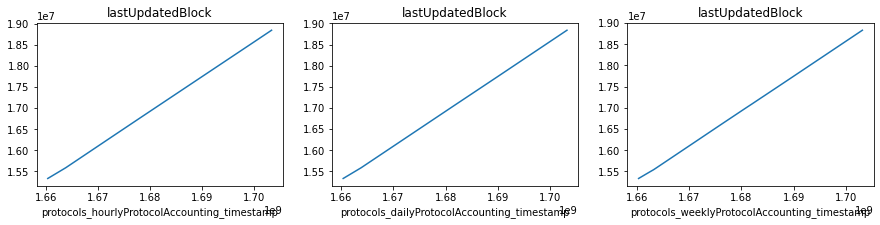

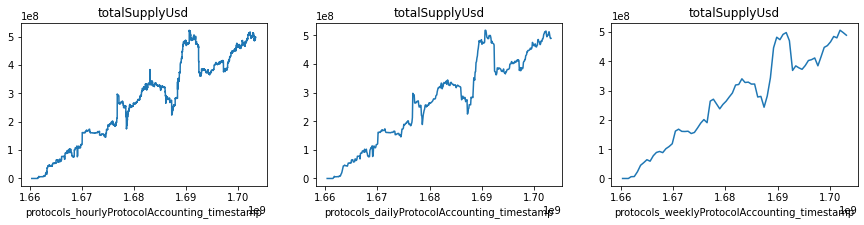

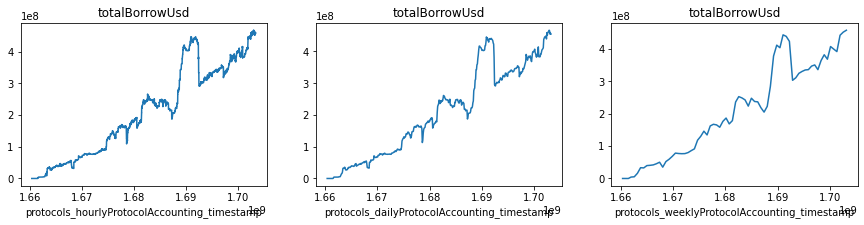

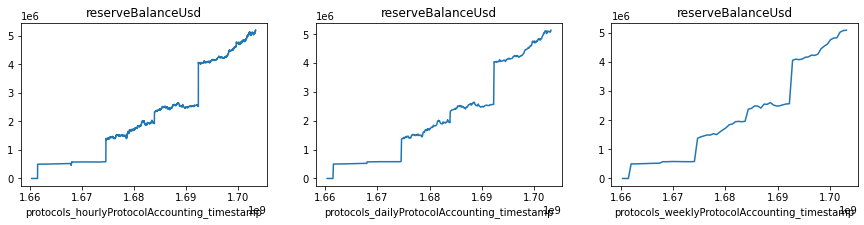

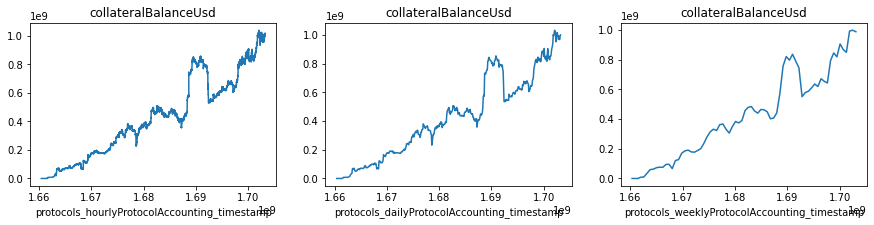

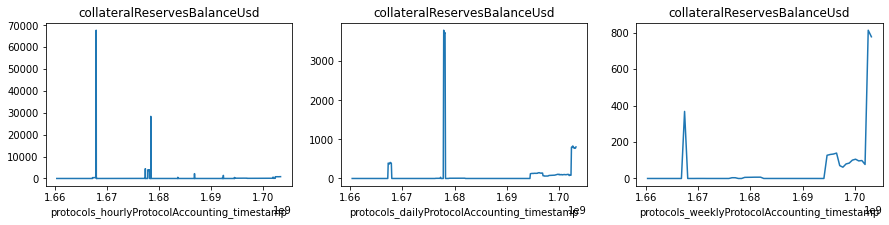

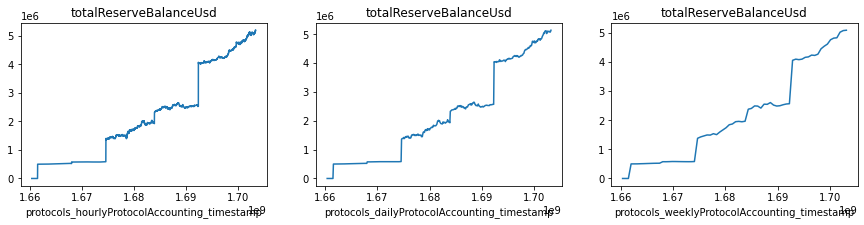

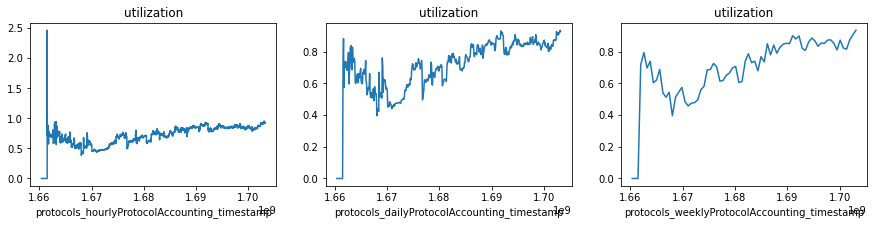

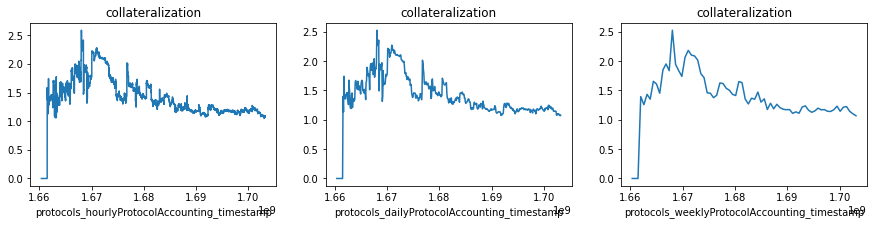

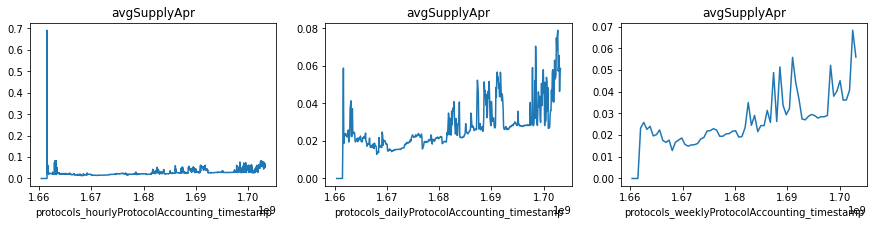

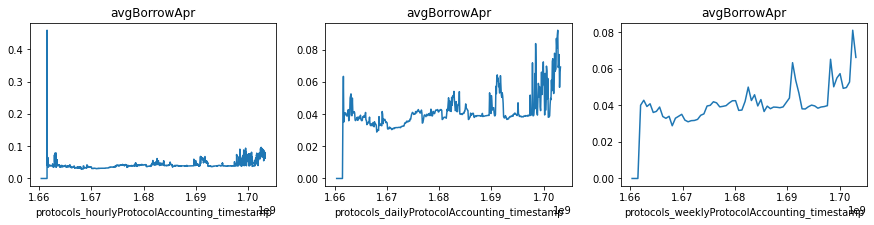

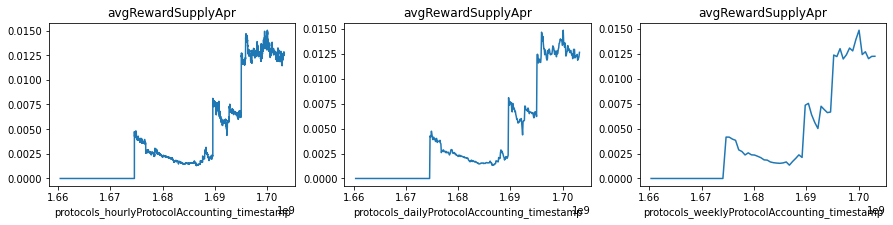

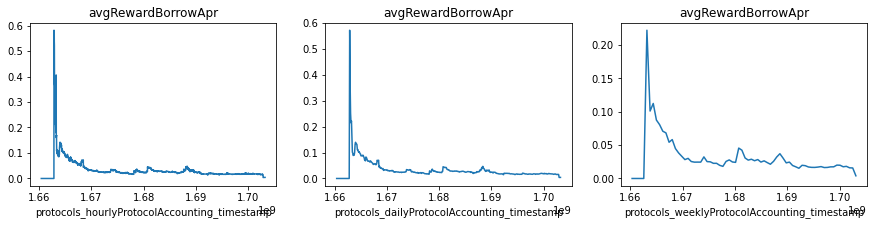

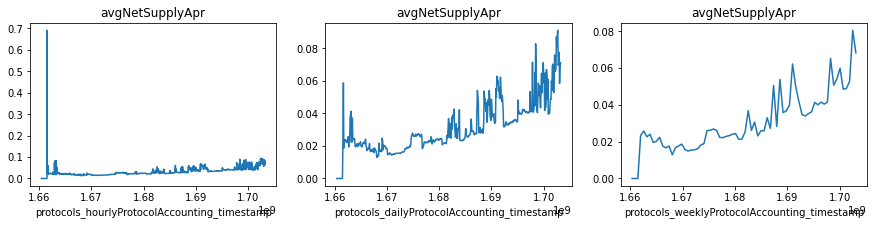

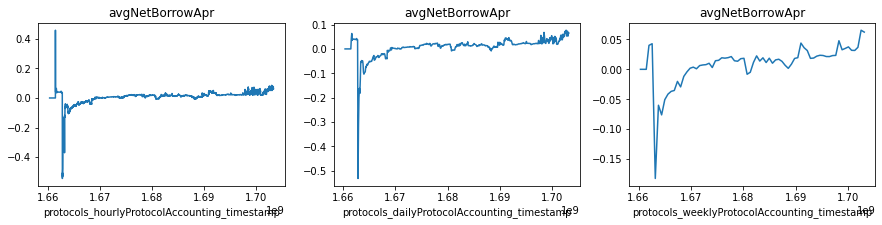

In [77]:
# Protocol Historical Accounting

hourly = comp_v3.Query.protocols.hourlyProtocolAccounting(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyProtocolAccounting(orderBy="timestamp", first=100000000)
weekly = comp_v3.Query.protocols.weeklyProtocolAccounting(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

plot_all([hourly_df, daily_df, weekly_df], ["protocols_hourlyProtocolAccounting_timestamp", "protocols_dailyProtocolAccounting_timestamp", "protocols_weeklyProtocolAccounting_timestamp"], "Protocol Accounting (hourly, daily, weekly)")


Protocol Usage (hourly, daily)


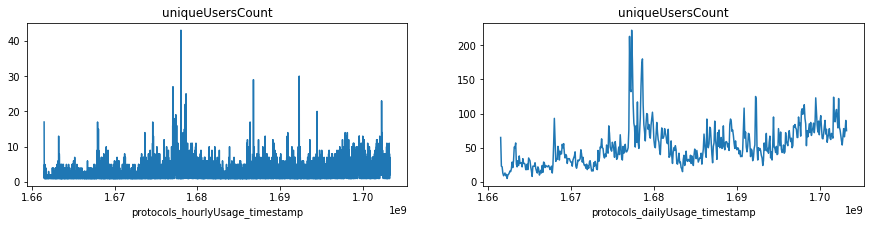

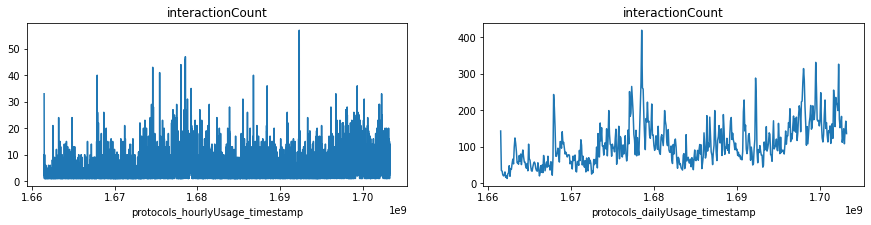

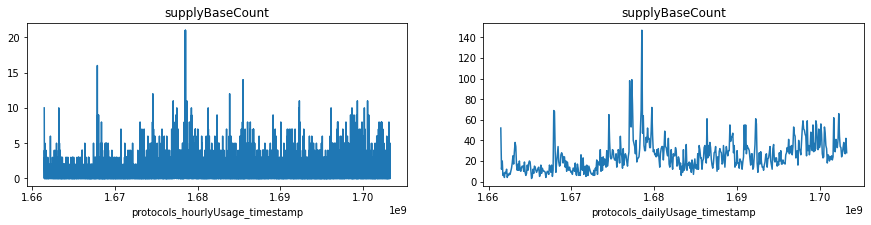

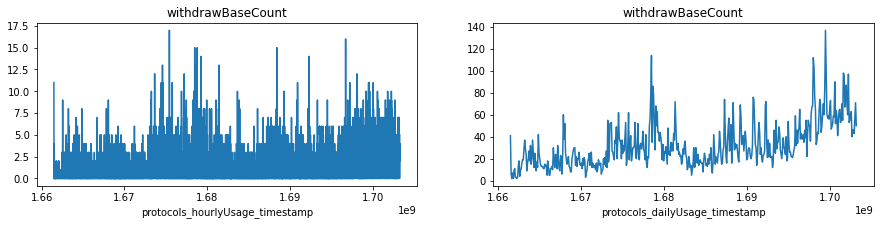

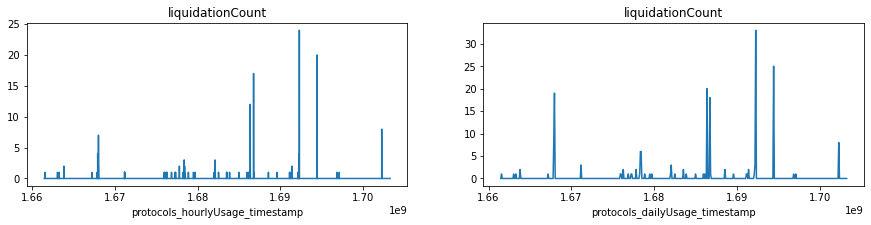

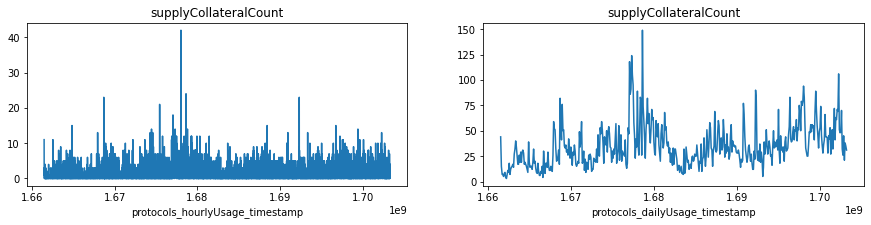

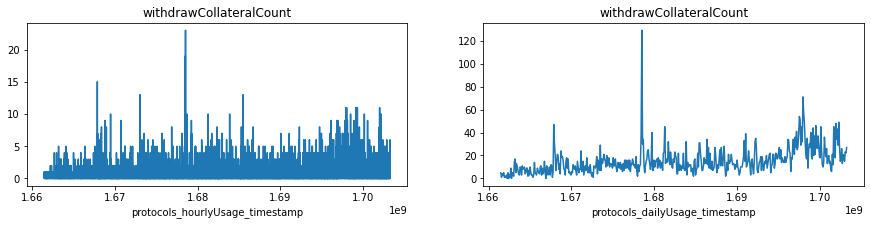

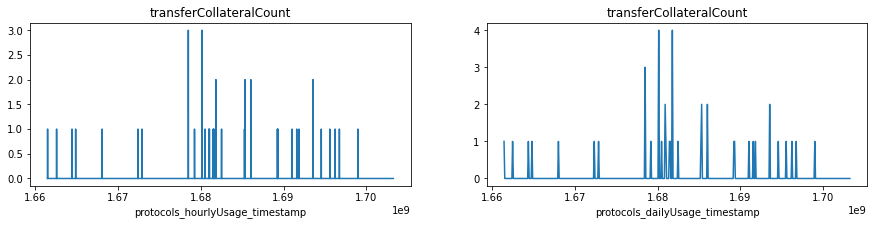

In [78]:
# Protocol historical usage

hourly = comp_v3.Query.protocols.hourlyUsage(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyUsage(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

# display(hourly_df)

plot_all([hourly_df, daily_df], ["protocols_hourlyUsage_timestamp", "protocols_dailyUsage_timestamp"], "Protocol Usage (hourly, daily)")


Compound WETH - Market Accounting (hourly, daily, weekly)


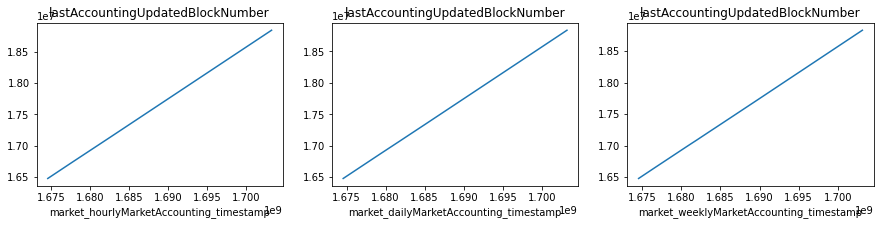

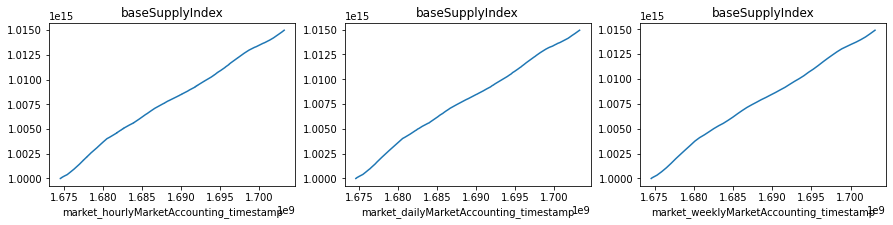

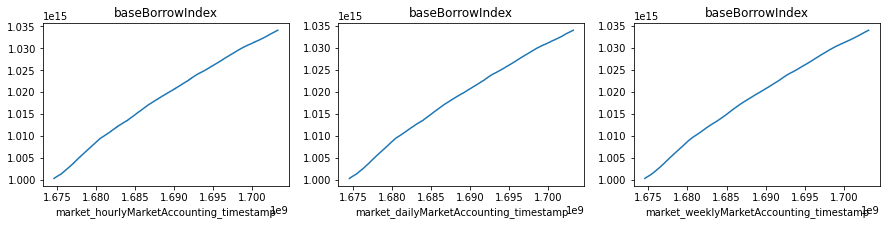

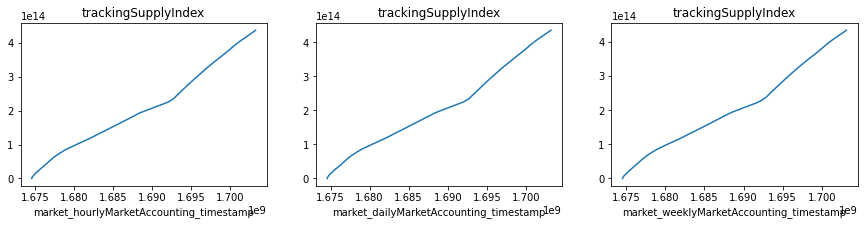

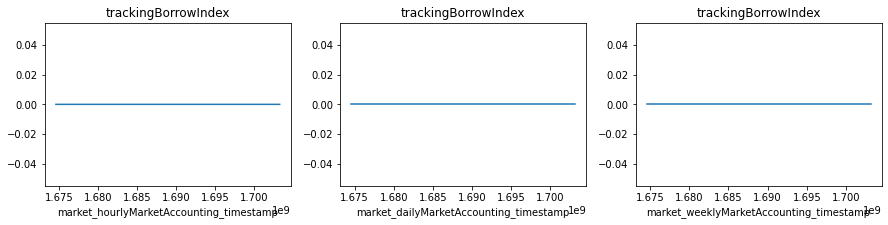

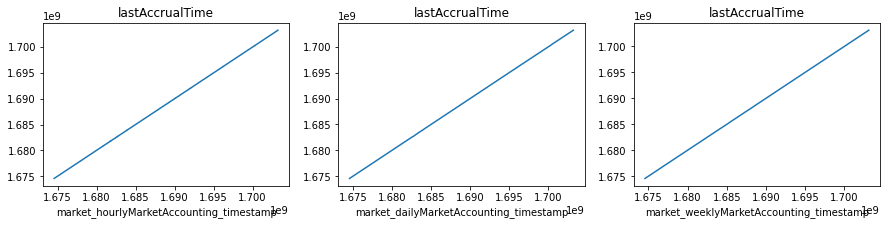

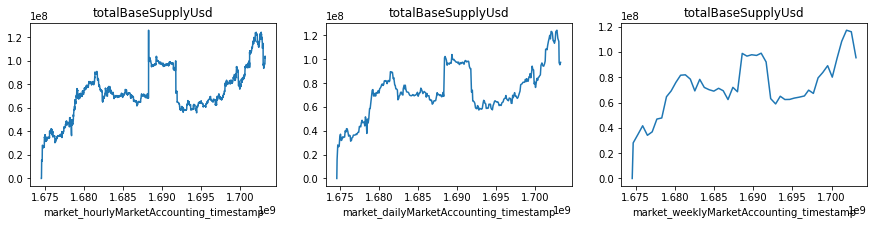

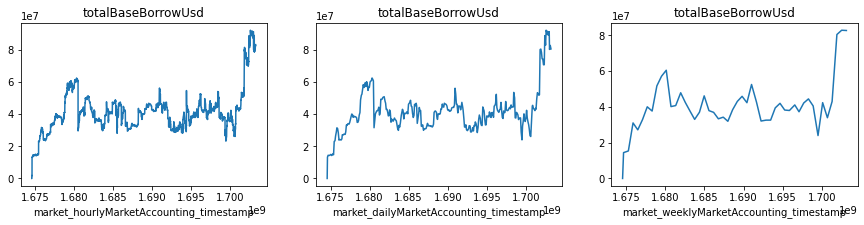

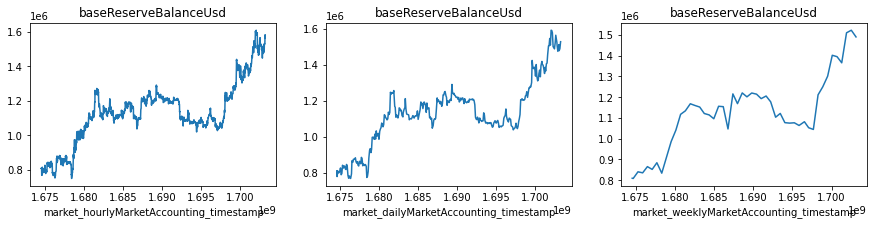

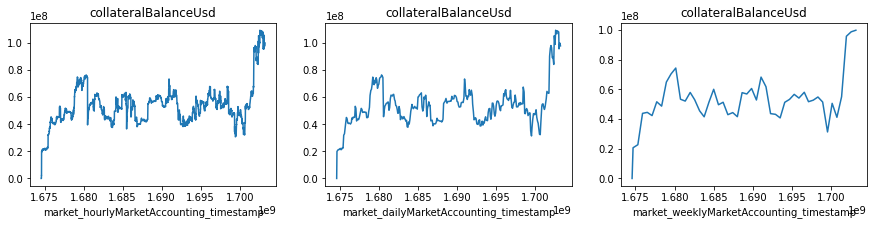

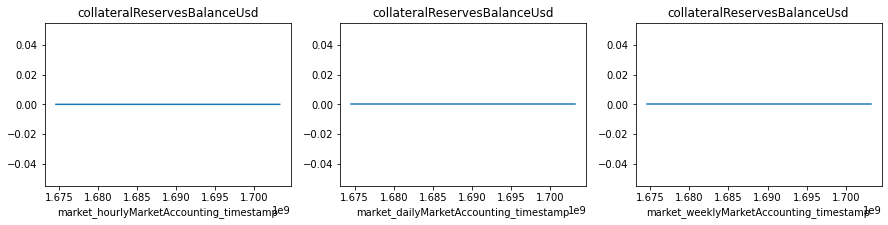

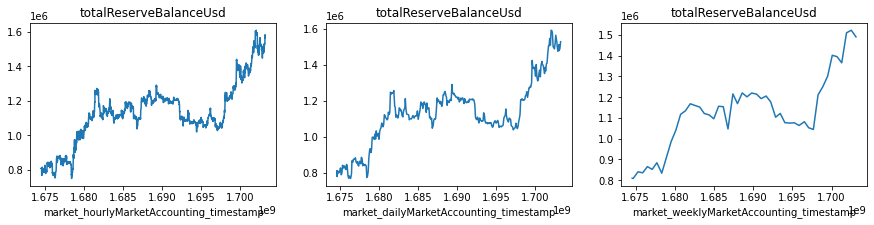

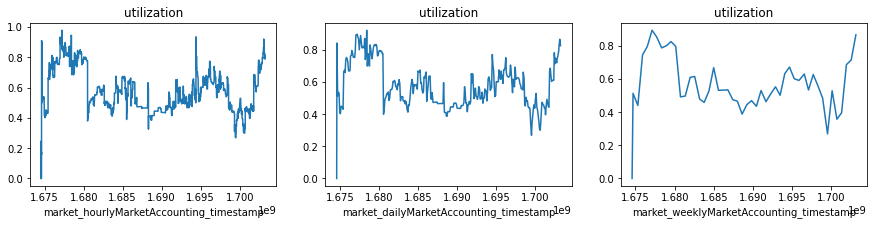

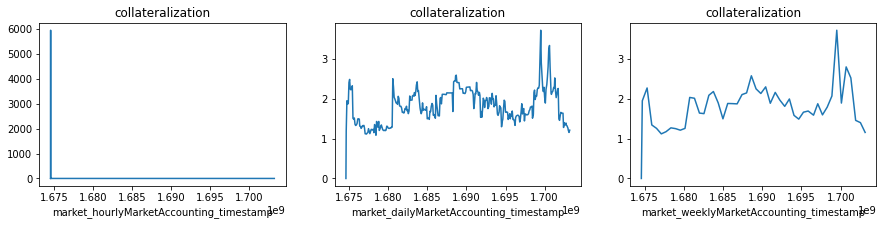

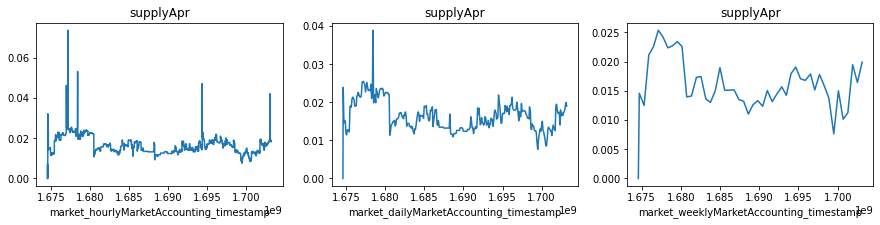

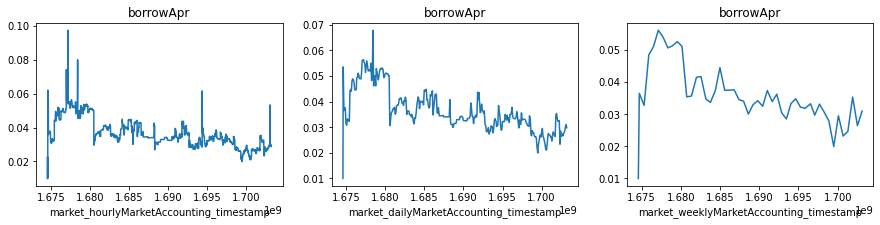

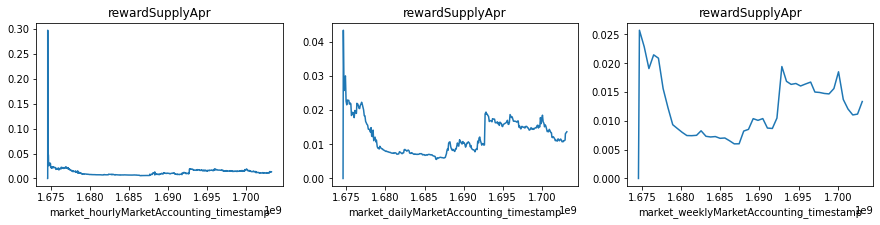

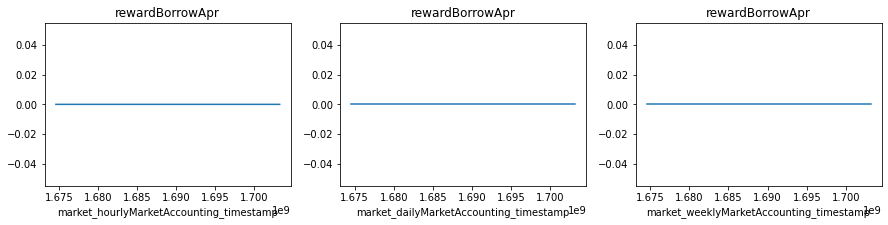

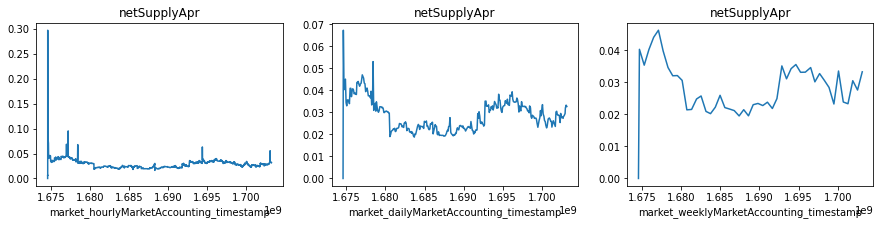

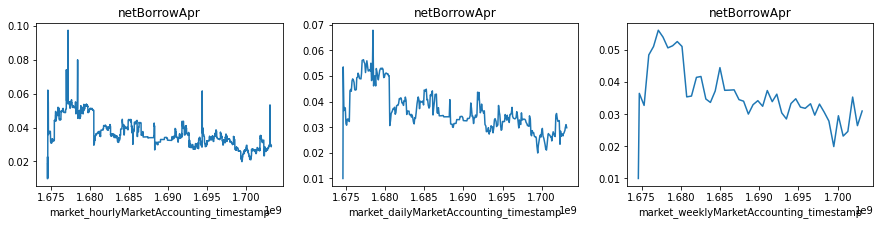

Compound USDC - Market Accounting (hourly, daily, weekly)


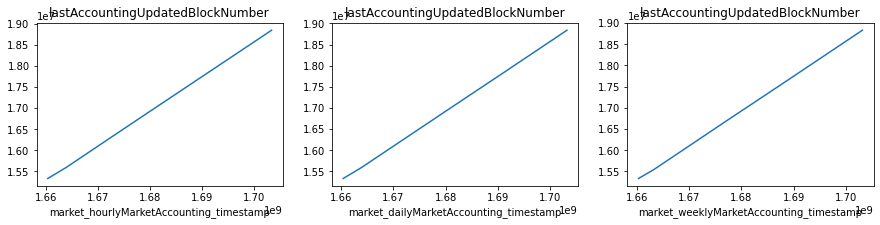

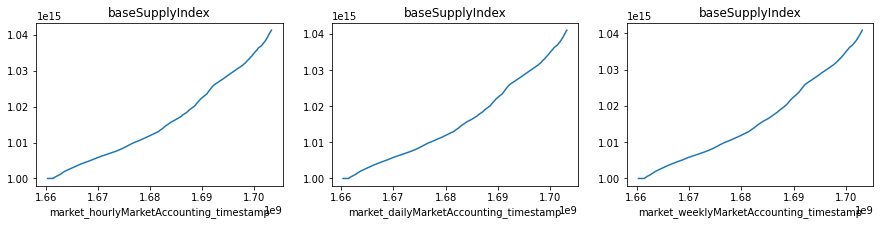

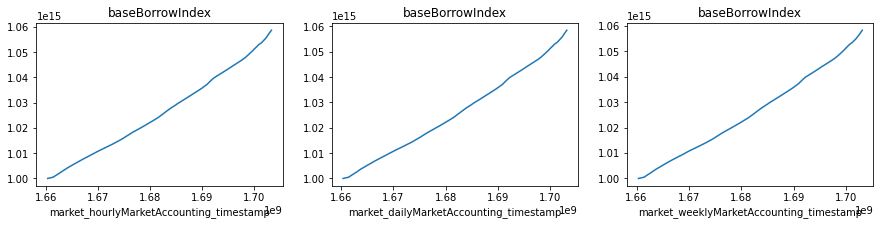

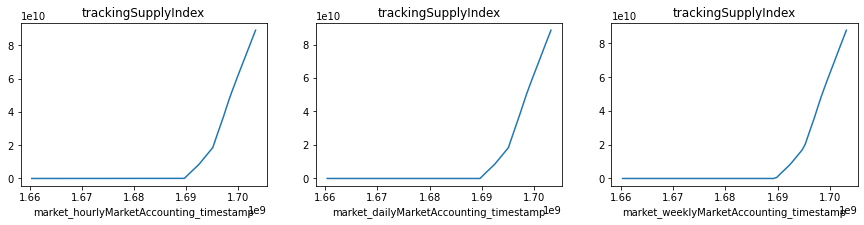

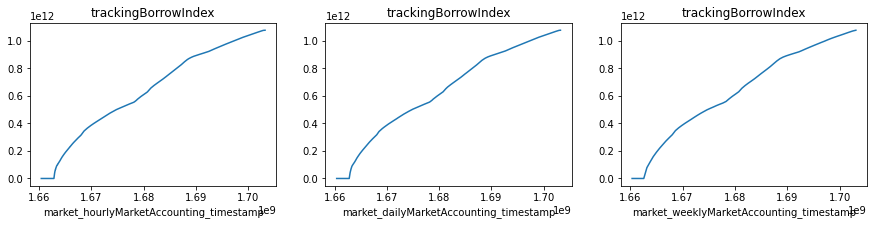

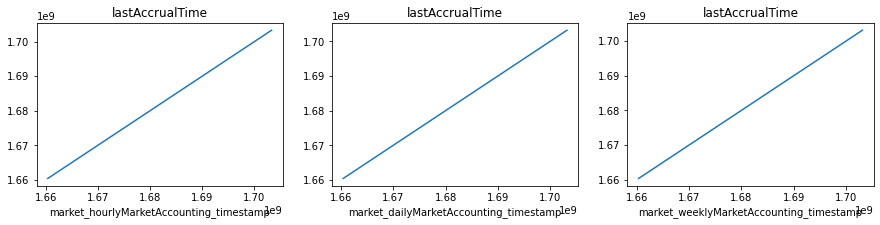

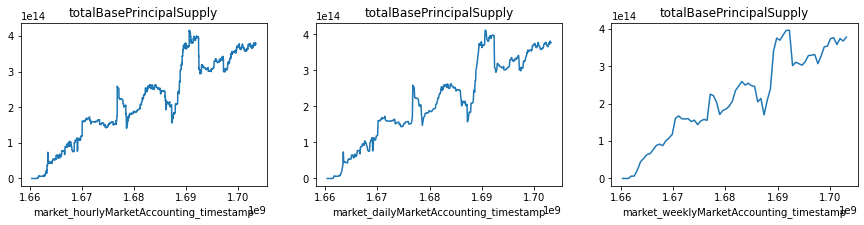

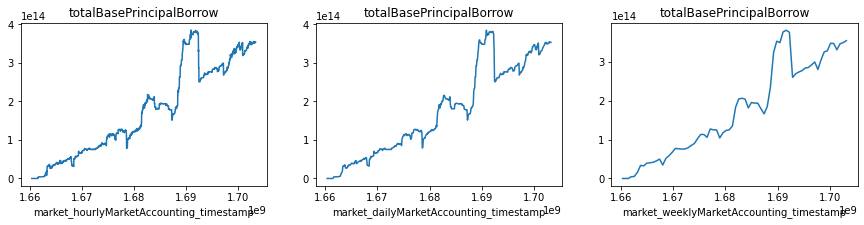

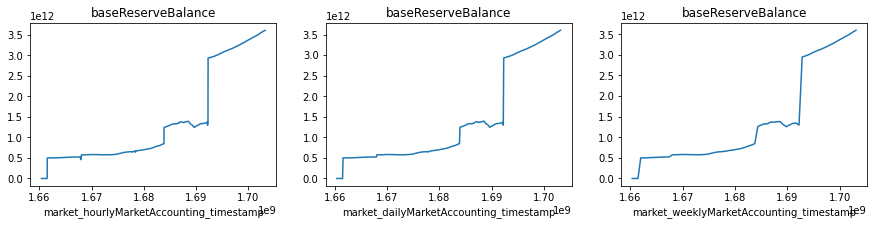

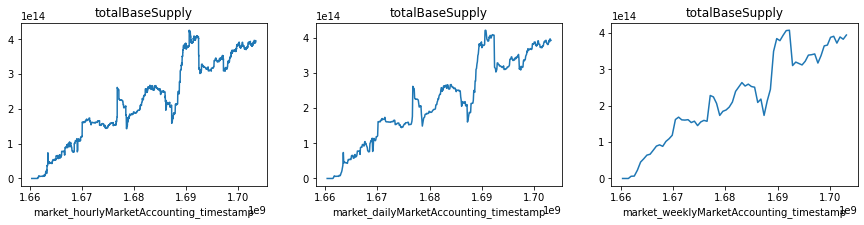

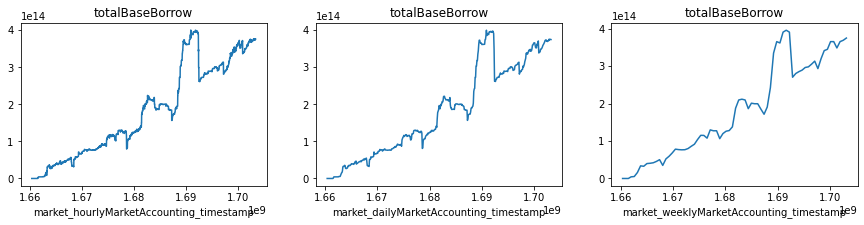

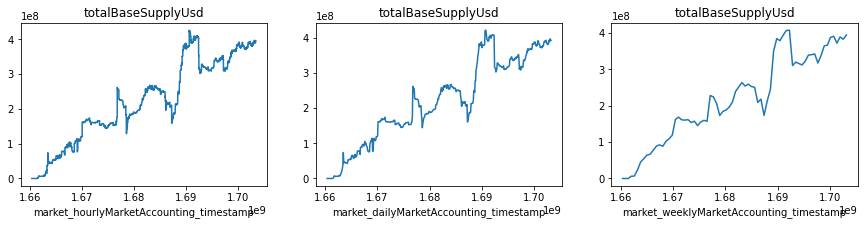

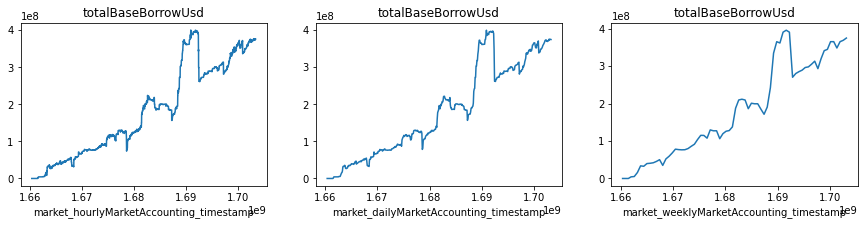

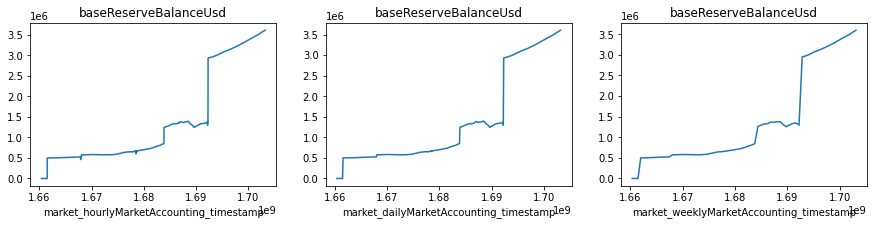

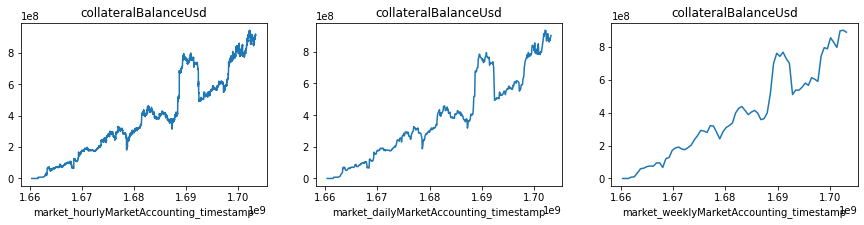

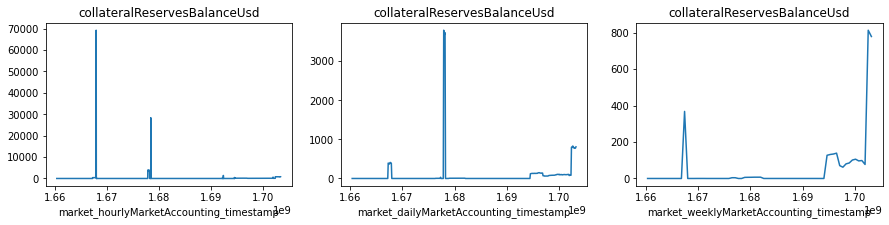

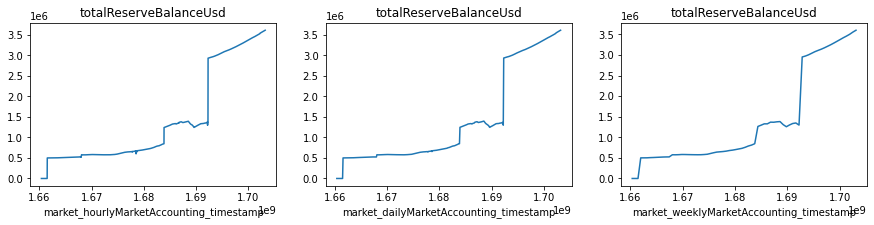

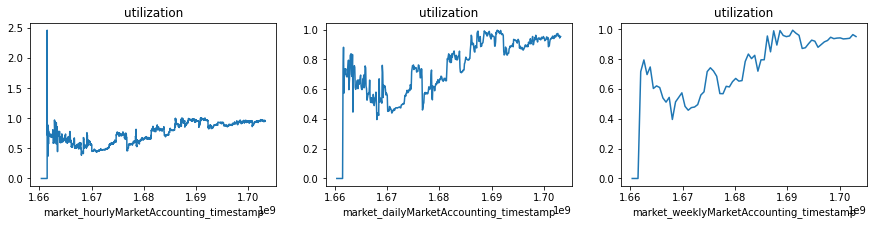

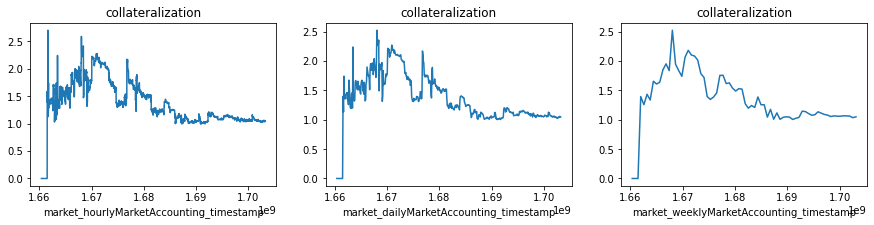

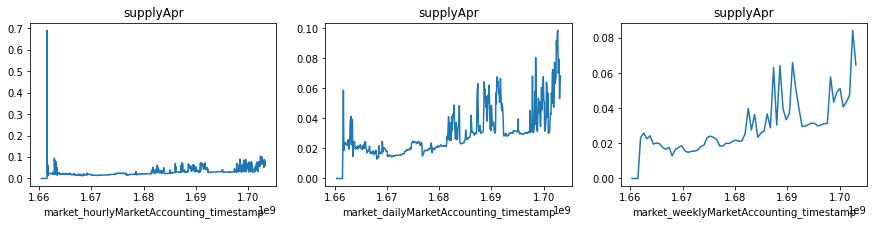

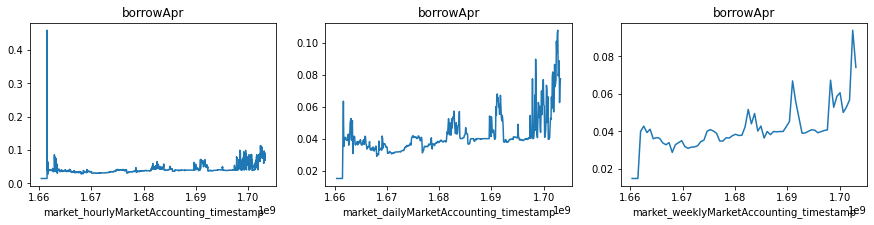

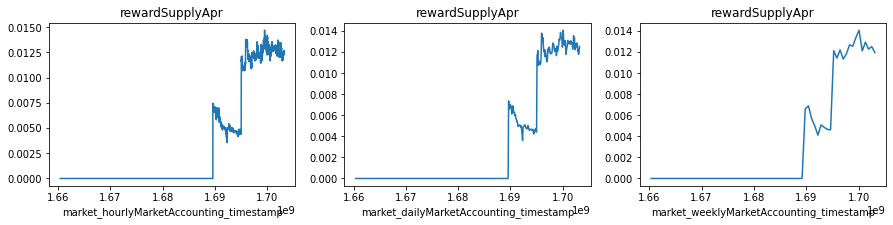

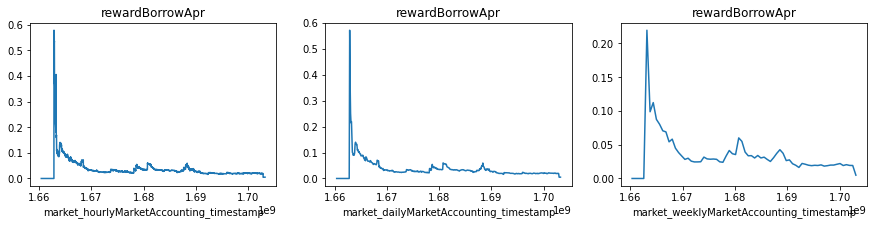

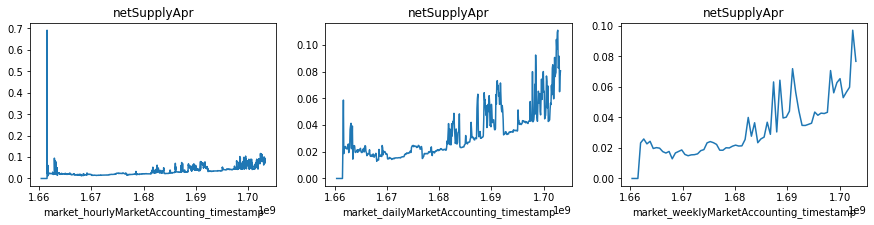

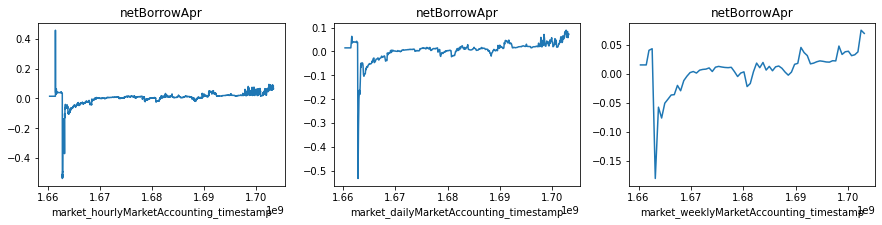

In [79]:
# Market Historical Accounting

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyMarketAccounting(orderBy="timestamp", first=100000000)
    daily = market.dailyMarketAccounting(orderBy="timestamp", first=100000000)
    weekly = market.weeklyMarketAccounting(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
    weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

    plot_all([hourly_df, daily_df, weekly_df], ["market_hourlyMarketAccounting_timestamp", "market_dailyMarketAccounting_timestamp", "market_weeklyMarketAccounting_timestamp"], f"{market_name} - Market Accounting (hourly, daily, weekly)")


Compound WETH - Market Configuration


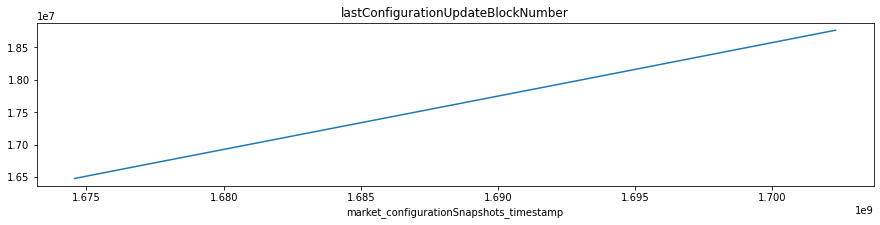

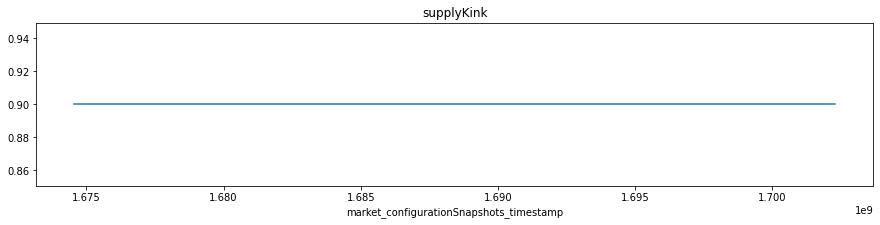

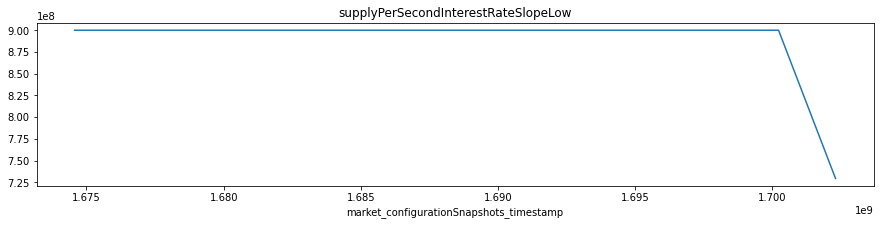

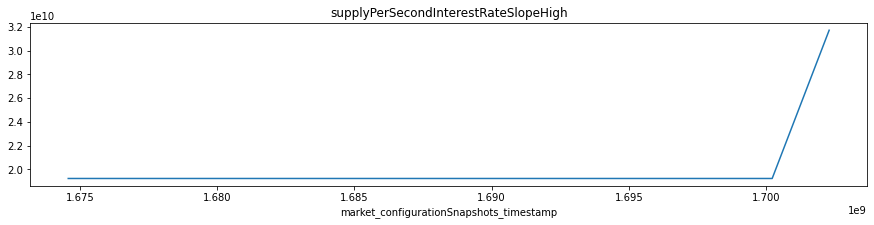

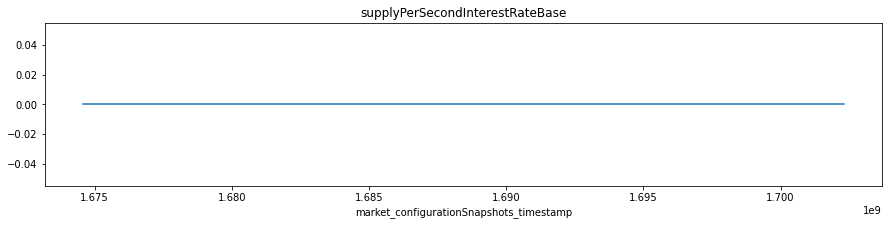

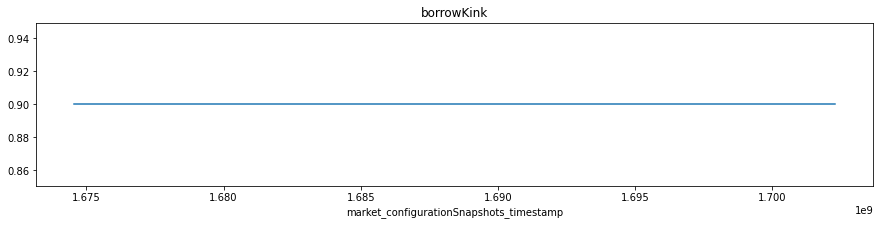

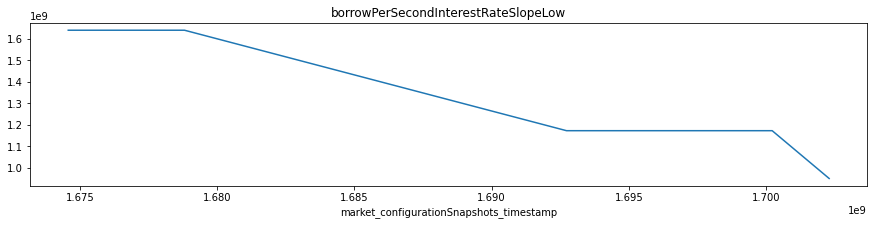

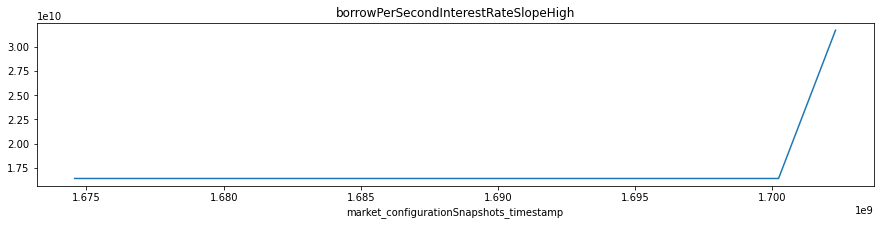

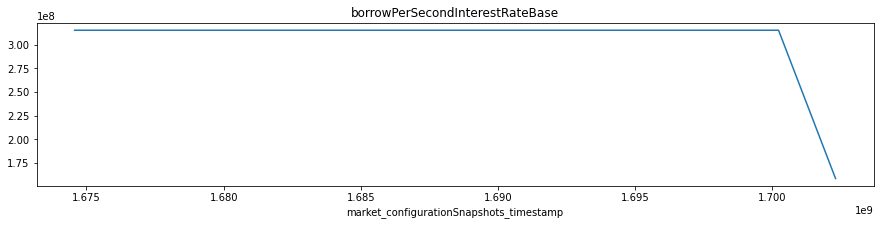

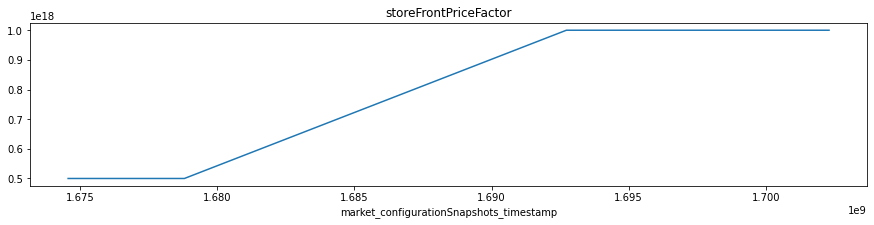

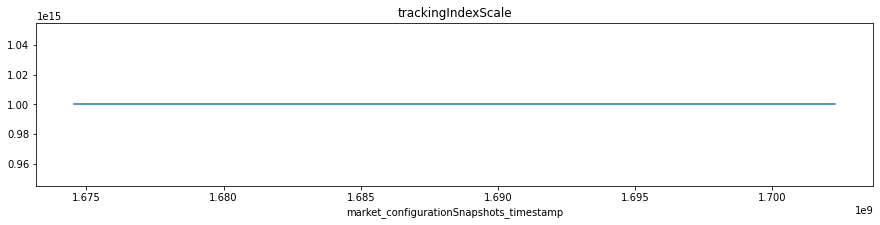

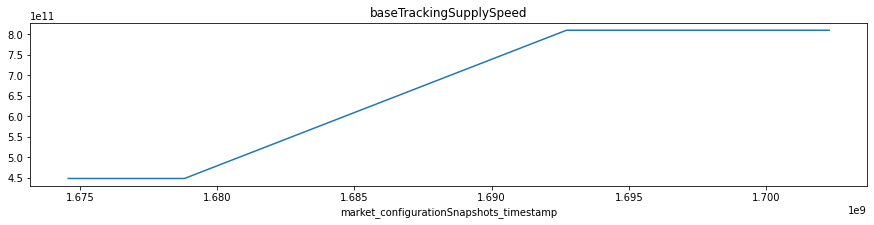

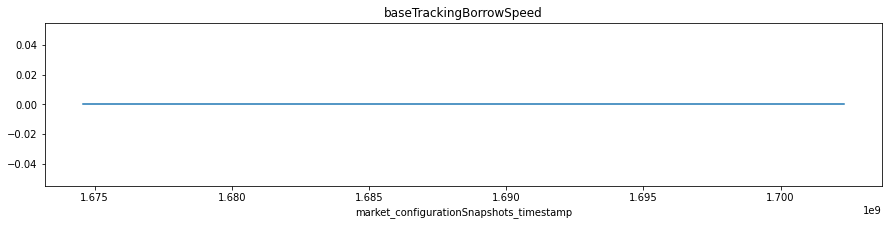

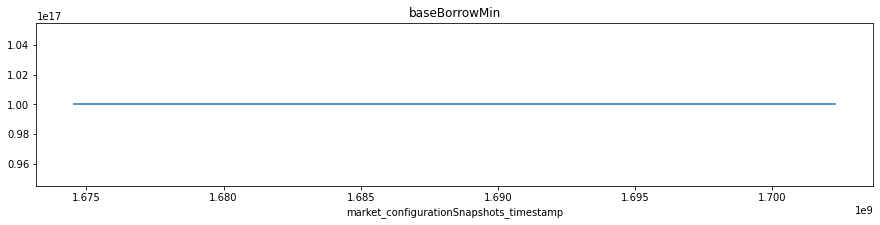

Compound USDC - Market Configuration


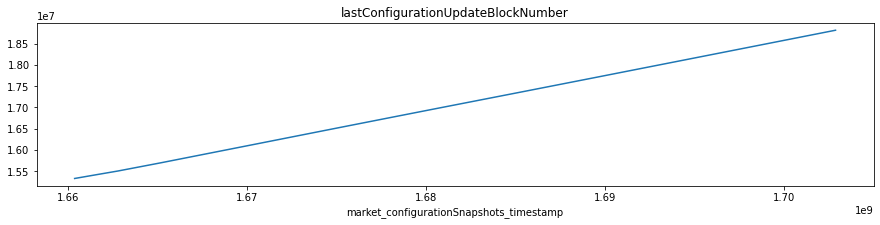

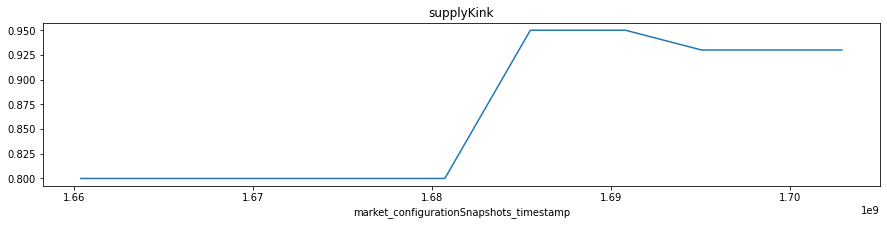

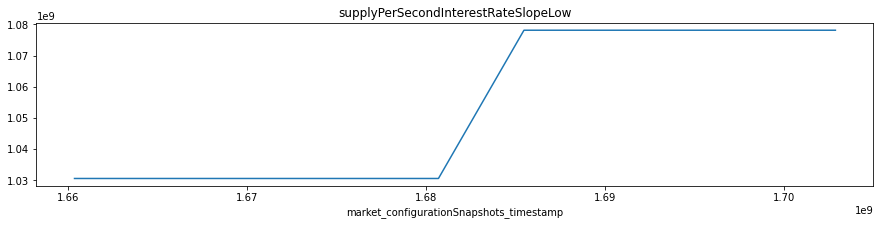

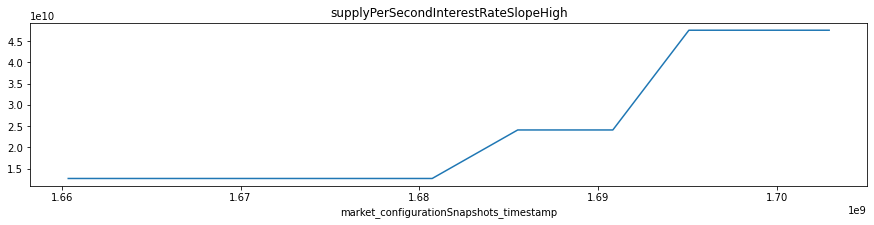

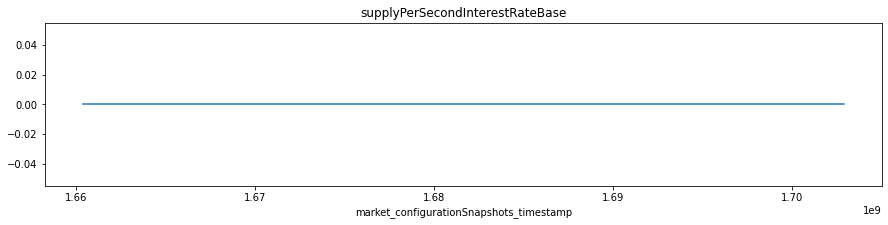

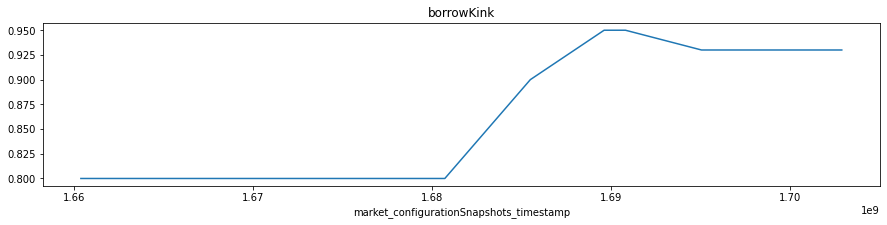

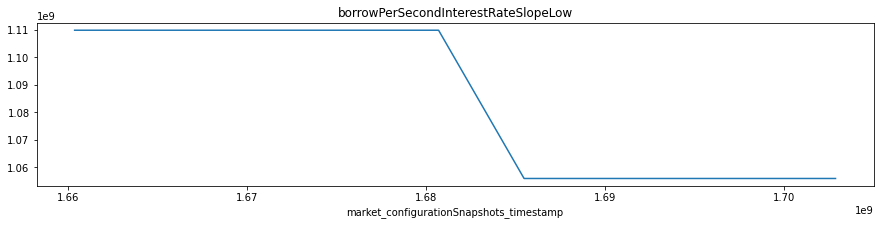

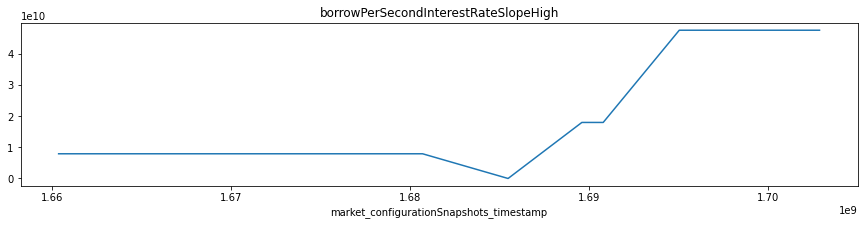

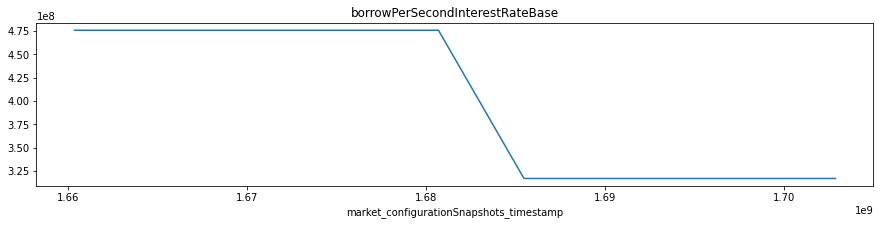

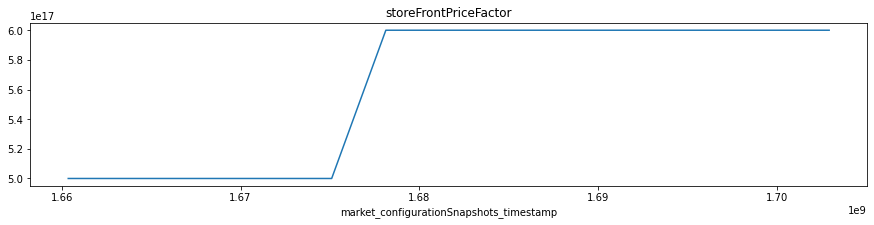

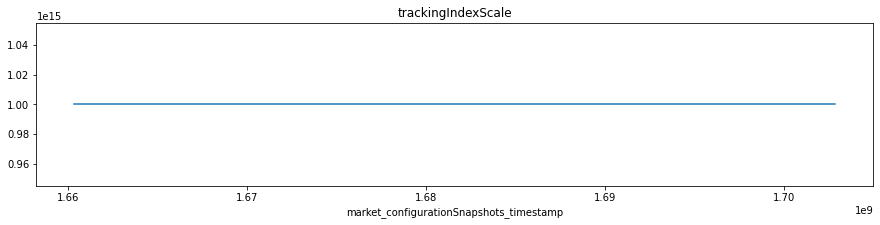

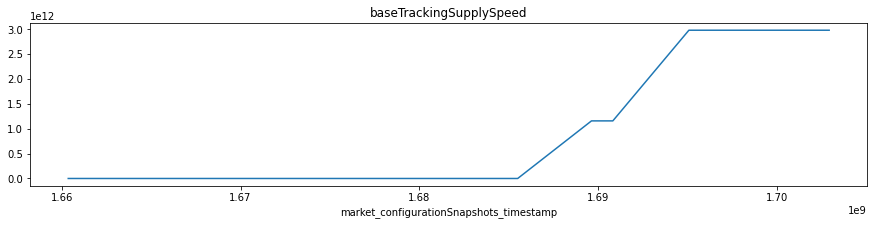

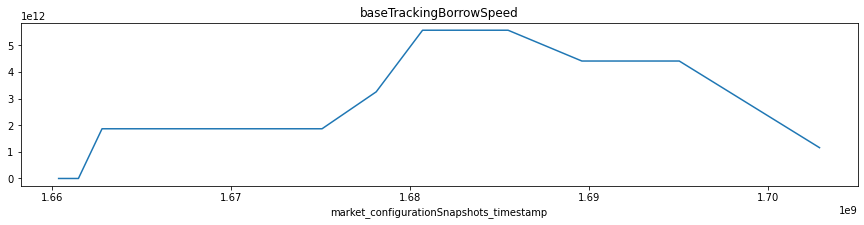

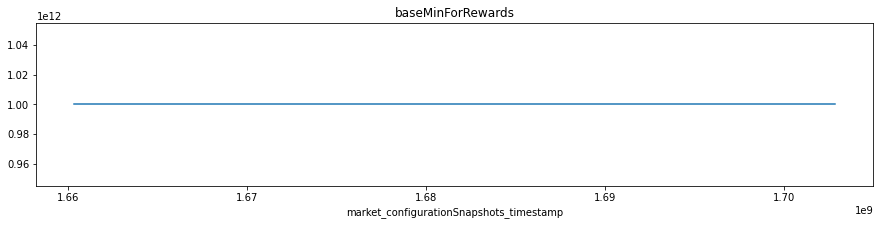

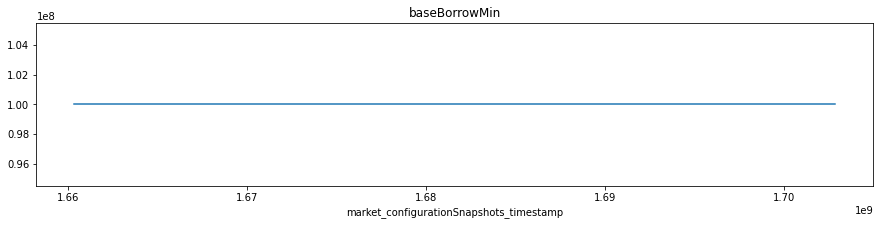

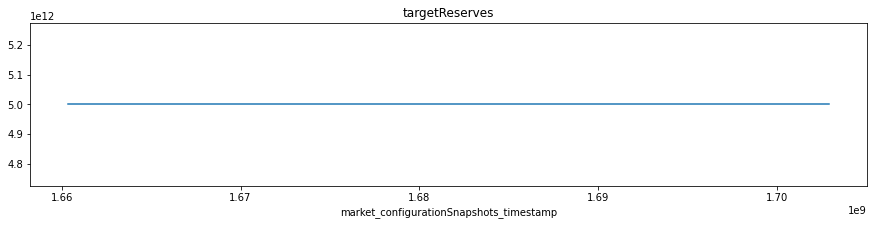

In [80]:
# Market Historical Configuration

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    snapshots = market.configurationSnapshots(orderBy="timestamp", first=100000000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.configuration], concat=True)

    # display(snapshots_df)

    plot_all([snapshots_df], ["market_configurationSnapshots_timestamp"], f"{market_name} - Market Configuration") 


Compound WETH - Market Usage (hourly, daily)


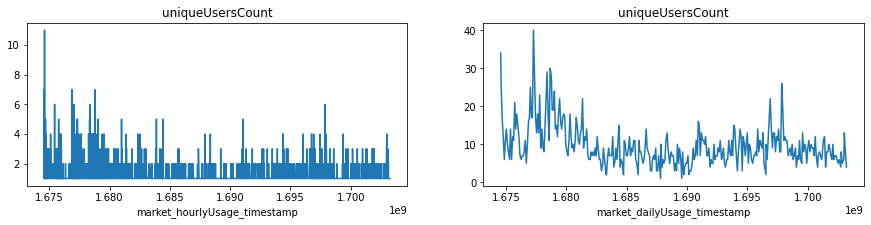

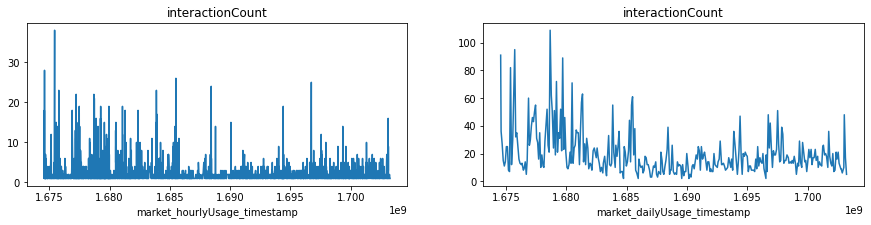

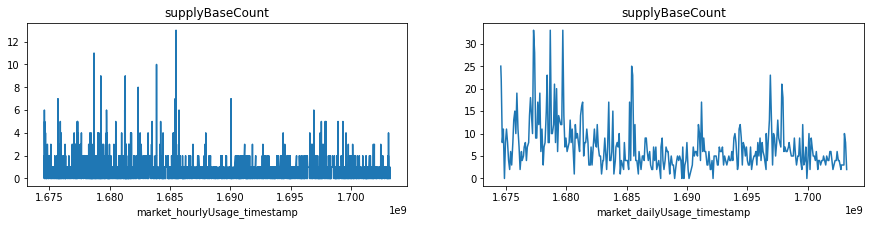

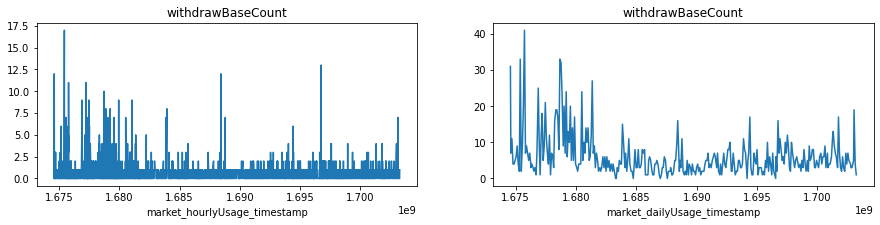

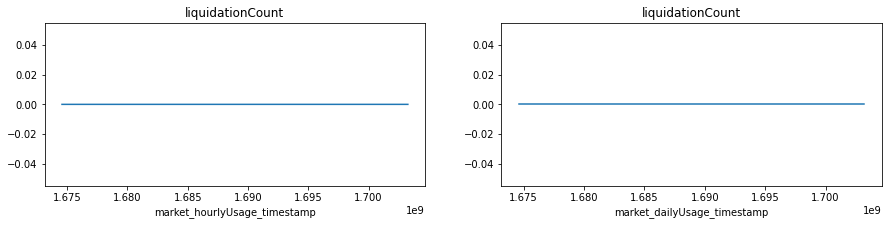

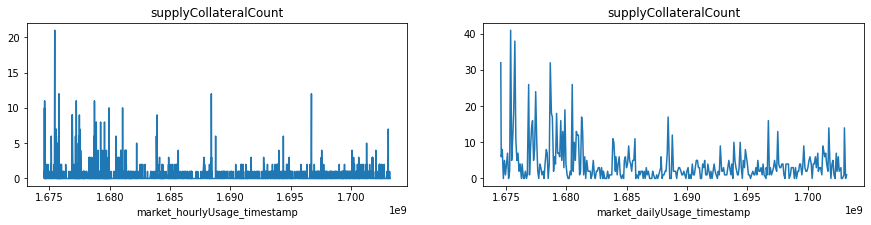

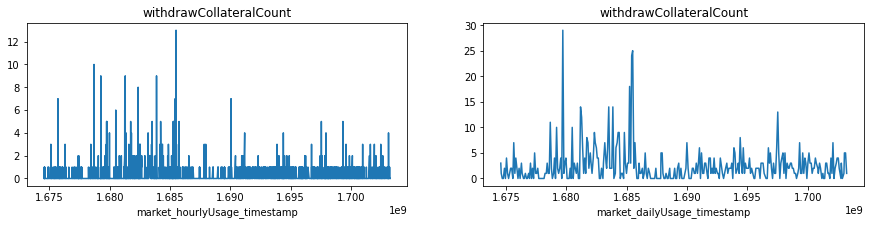

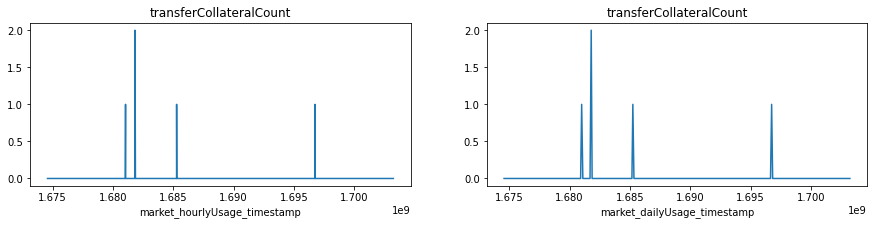

Compound USDC - Market Usage (hourly, daily)


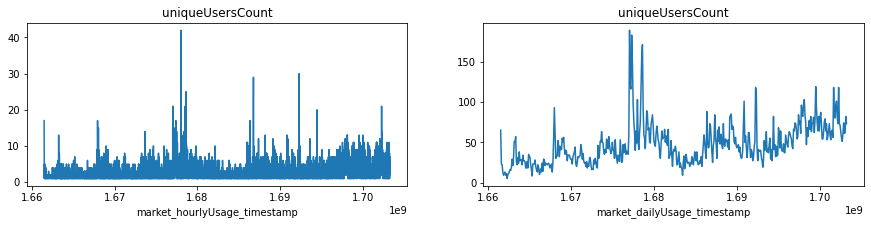

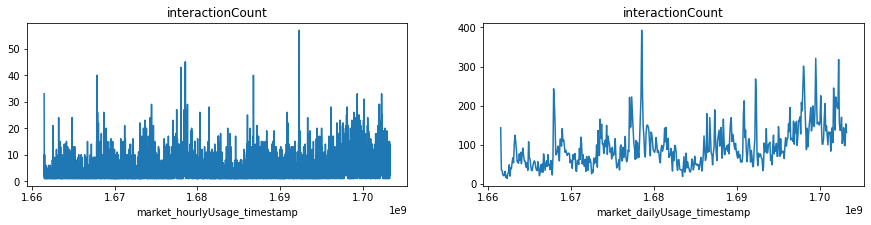

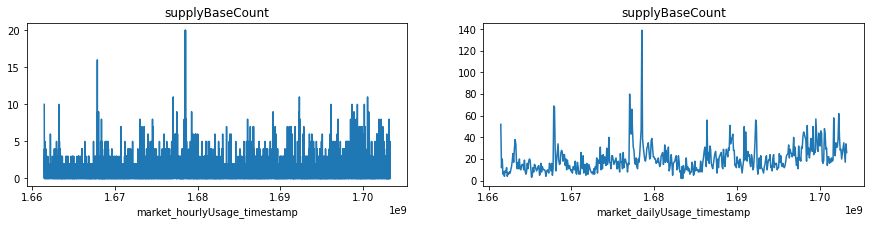

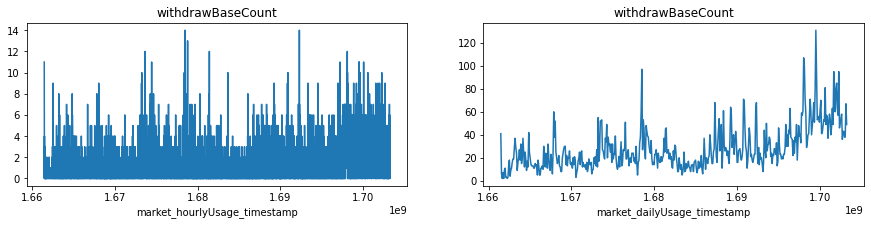

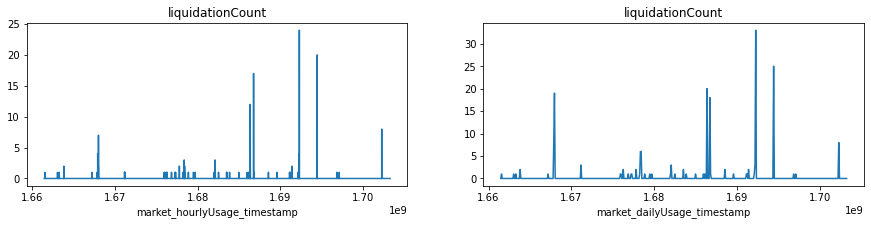

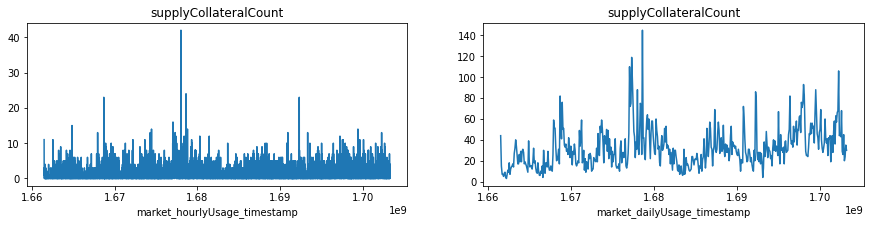

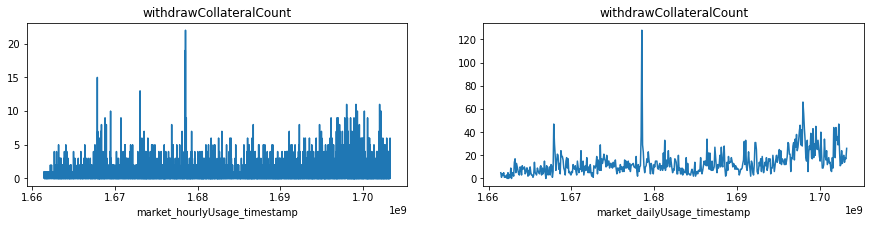

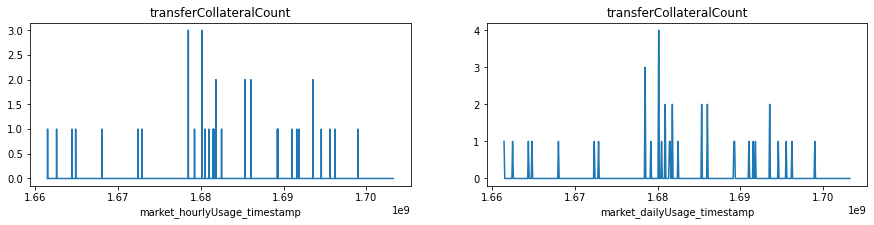

In [81]:
# Market Historical Usage

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyUsage(orderBy="timestamp", first=100000000)
    daily = market.dailyUsage(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

    # display(hourly_df)

    plot_all([hourly_df, daily_df], ["market_hourlyUsage_timestamp", "market_dailyUsage_timestamp"], f"{market_name} - Market Usage (hourly, daily)")


position_positionAccountingSnapshots_timestamp  \
0                                      1674602939   
1                                      1674603359   
2                                      1676034623   
3                                      1677029159   
4                                      1688312639   

                                               position_positionAccountingSnapshots_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035dd476fb005e01   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035df776fb000f01   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d2846fd003801   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d1087fe005102   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d77aa0c01f900   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                                                16479956   
1                                                                16479991   
2                                                                16598568   
3                                                                16680720   
4                                                                17607287   

                          position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d88638be3c26f3a47d861b8b5641508501035d   

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                                                             0   
1                                       -2699152246434178339105   
2                                                             0   
3                                                             0   
4                                       29767562379533695489604   

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                                                           0   
1                                     -2699998106643255971550   
2                                                           0   
3                                                           0   
4                                     29999928024283075857734   

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                                                  0   
1                                                                  0   
2                                                     34872010497335   
3                                                     34872010497335   
4                                                    192401479542966   

   position_positionAccountingSnapshots_accounting_baseTrackingAccrued  \
0                                                                    0   
1                                                                    0   
2                                                                    0   
3                                                                    0   
4                                                                    0   

   position_positionAccountingSnapshots_accounting_baseBalanceUsd  \
0                                                    0.000000e+00   
1                                                   -4.198082e+06   
2                                                    0.000000e+00   
3                                                    0.000000e+00   
4                                                    5.753476e

0x10d88638be3c26f3a47d861b8b5641508501035d - Position Accounting


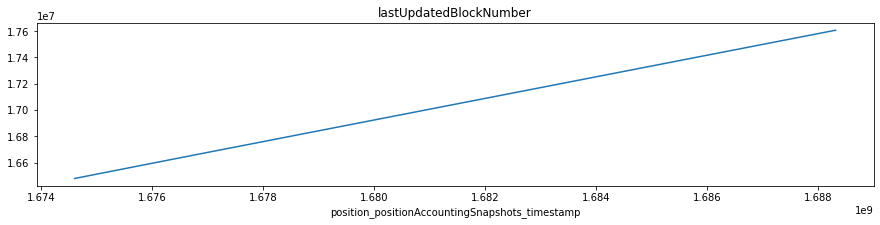

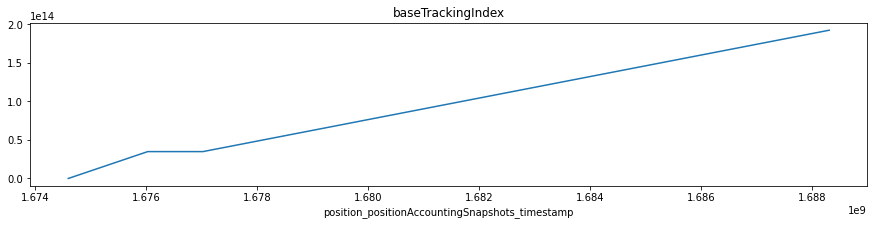

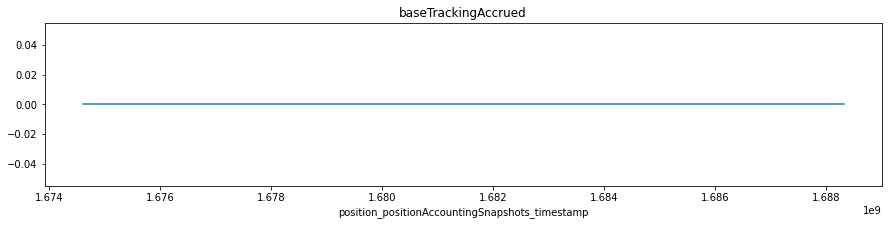

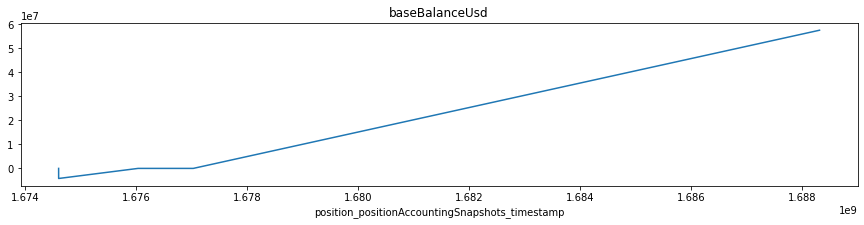

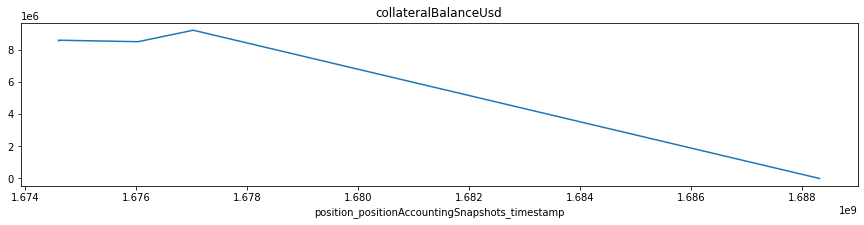

position_positionAccountingSnapshots_timestamp  \
0                                      1700160131   
1                                      1700160431   
2                                      1700664023   

                                               position_positionAccountingSnapshots_accounting_id  \
0    0xa17581a9e3356d9a858b789d68b4d866e593ae944f2083f5fbede34c2714affb3105539775f7fe64c59a1b0131   
1    0xa17581a9e3356d9a858b789d68b4d866e593ae944f2083f5fbede34c2714affb3105539775f7fe64de9a1b0162   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae944f2083f5fbede34c2714affb3105539775f7fe64593d1c01a200   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                                                18586309   
1                                                                18586334   
2                                                                18627929   

                          position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae944f2083f5fbede34c2714affb3105539775f7fe64   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae944f2083f5fbede34c2714affb3105539775f7fe64   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae944f2083f5fbede34c2714affb3105539775f7fe64   

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                                          98666034303876177352   
1                                        3058646678278386995811   
2                                        4978365282146697812259   

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                                        99999675450074592525   
1                                      3099999609651105145324   
2                                      5046506750530805168098   

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                                    384539116689911   
1                                                    384545360917621   
2                                                    394174360022720   

   position_positionAccountingSnapshots_accounting_baseTrackingAccrued  \
0                                                                    0   
1                                                                  616   
2                                                             29452322   

   position_positionAccountingSnapshots_accounting_baseBalanceUsd  \
0                                                    1.986794e+05   
1                                                    6.159079e+06   
2                                                    1.026475e+07   

   position_positionAccountingSnapshots_accounting_collateralBalanceUsd  
0                                                                   0.0  
1                                                                   0.0  
2                                                                   0.0

0x4f2083f5fbede34c2714affb3105539775f7fe64 - Position Accounting


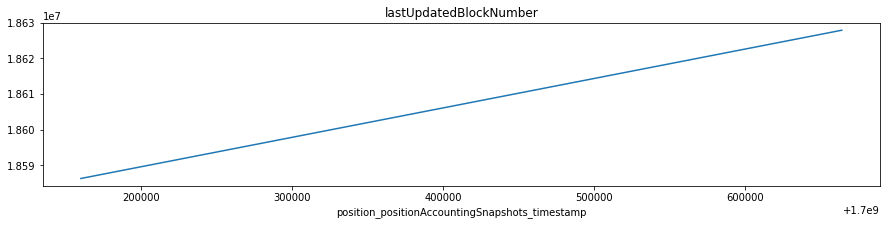

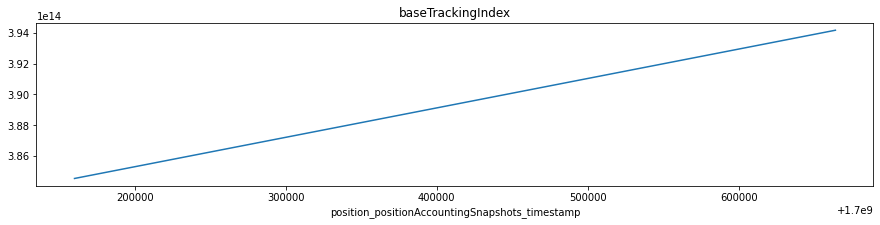

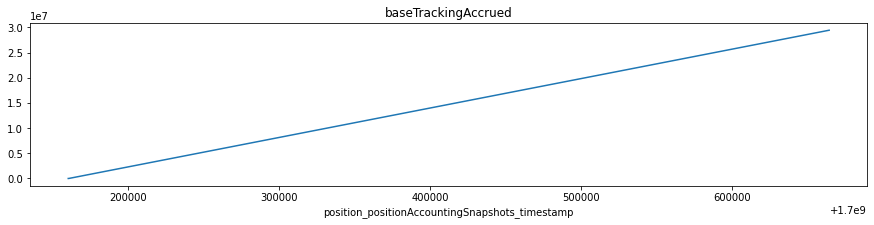

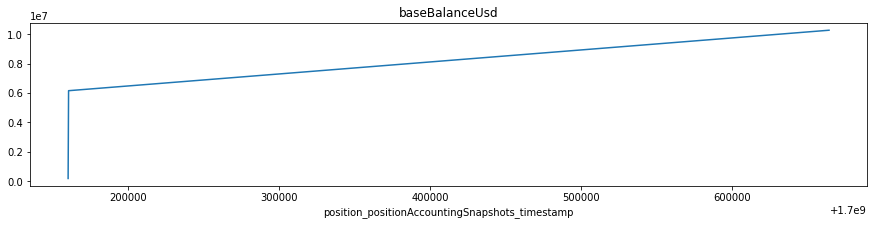

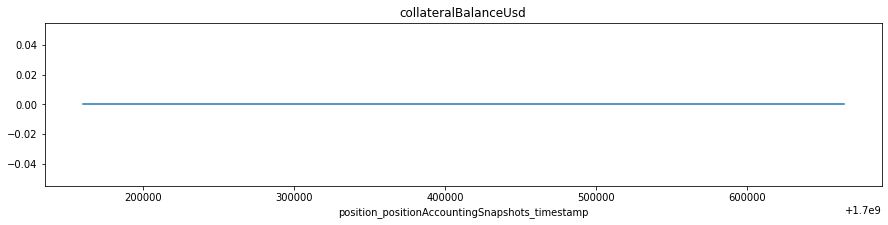

position_positionAccountingSnapshots_timestamp  \
0                                      1679002895   
1                                      1679100707   
2                                      1679360075   
3                                      1679442551   
4                                      1679885543   
5                                      1682127167   
6                                      1684661087   
7                                      1685230535   

                                               position_positionAccountingSnapshots_accounting_id  \
0    0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111830101011e   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace11101210101a400   
2    0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace1118674010168   
3    0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace1110e8f01015e   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111a31d02019a00   
5    0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace1118ae704015c   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111d81408015e01   
7  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111e1cb0801ce00   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                                                16843139   
1                                                                16851201   
2                                                                16872582   
3                                                                16879374   
4                                                                16915875   
5                                                                17098634   
6                                                                17306840   
7                                                                17353697   

                          position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   
7  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb0162bc8d5eec2fb1532923c4f8997bace111   

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                                        1495611660639103045586   
1                                        2492619296932021036835   
2                                        2991031405264710325736   
3                                        3190383911296082389104   
4                                        3489316150252825313068   
5                                        3986932876790128048818   
6                                        4483952340191455567254   
7                                        4980811694321167274634   

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                                      1499990178355031585977   
1                                      2500088549794042714902   
2                                      3000552292453074893445   
3                                      3200711974448191151470   
4                                      3501766242833111436321   
5                                      4005965943630807550749   
6                                      451082064471745588259

0x53fb0162bc8d5eec2fb1532923c4f8997bace111 - Position Accounting


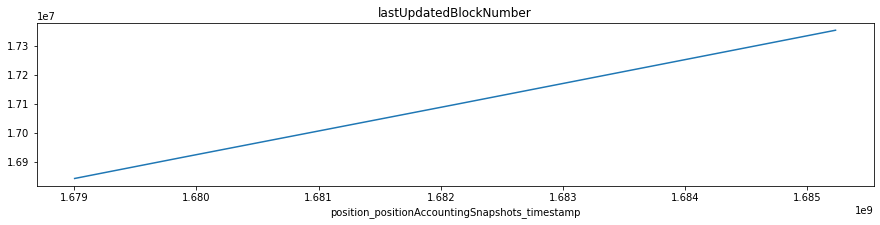

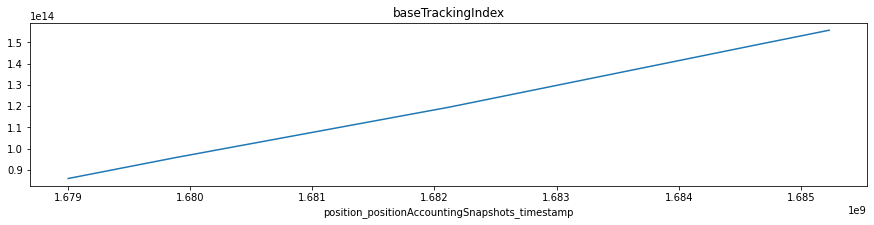

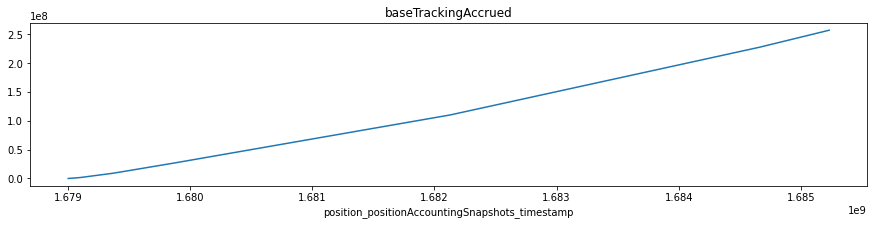

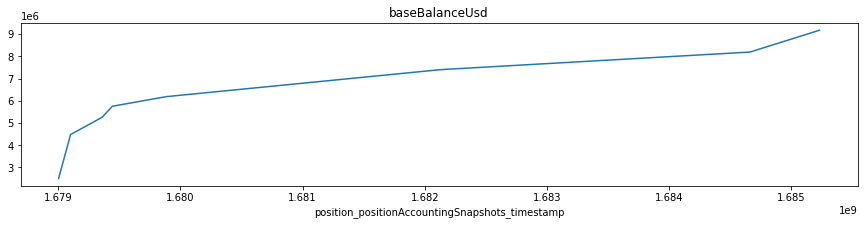

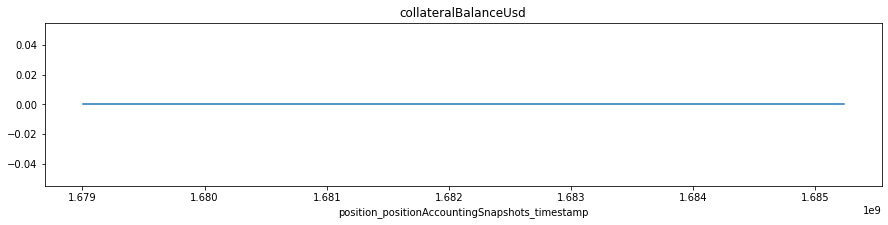

In [82]:
# Position Accounting 

positions = comp_v3.Query.positions(first=3, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
positions_df = sg.query_df([positions.id, positions.account.address])

# display(positions_df)

for index, row in positions_df.iterrows():
    position_address = row["positions_account_address"]
    position_id = row["positions_id"]

    snapshots = comp_v3.Query.position(id=position_id).positionAccountingSnapshots(orderBy="timestamp", first=10000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.accounting], concat=True)

    display(snapshots_df)

    plot_all([snapshots_df], ["position_positionAccountingSnapshots_timestamp"], f"{position_address} - Position Accounting") 
